# IMDb Movies Dataset - Exploratory Data Analysis (EDA)

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import textwrap
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import holoviews as hv
import plotly.express as px
import plotly.graph_objects as go
pn.extension('plotly')

In [2]:
objective_markdown = pn.pane.Markdown("""
    ## Objective
    Welcome to this exploratory data analysis (EDA). In this report we will dive into the world of cinema by analyzing a dataset on the top 1000 movies on the <a href="https://www.imdb.com/" target="_blank">IMDb website</a>. The objective of this EDA is twofold:
    - to give a high level overview of the dataset itself,
    - to uncover possible patterns, trends and outliers in the data.

    Hopefully this might lead to useful insights and, possibly be a starting point for further exploration. To do so, various charts, plots and heatmaps have been employed to visualize key elements of the dataset, such as possible correlation within the dataset, distributions, outliers, etc.
    """)

objective_markdown

Markdown(str)

In [3]:
structure_markdown = pn.pane.Markdown("""
    ## Structure of the report
    We start off by getting a general outline of the dataset in the *Understanding the Data* slide. Based on this, we continue on with cleaning the data, of which you will find a description on the identically titled slide. Seeing as the so-called IMDb rating is perhaps the most important metric of the entire dataset, we take a closer look at it from a bird's eye view on the *Distribution of IMDb Ratings* slide, where we will see how these ratings have been distributed in our dataset. On the next slide, called *IMDb Ratings over Time*, we take the IMDb rating metric and put it against a timeline, to see if there are any insights to be found. On the next slide, aptly named *Correlation*, we inspect the relationships between the columns in our dataset. The dive into the data is then continued on the *Breakdown per Genre* slide, where we group the data by movie genre and take a look at the most at the most and least common movie genre pairings. Finally, on the *Highest Rated Movies* and *Movies per director/star* slides we zoom in on the top 10 highest rated movies, as well as the directors and movie stars with the most top 1000 movies under their respective belts.
""")

structure_markdown

Markdown(str)

In [4]:
dataset_markdown = pn.pane.Markdown("""
    ## Dataset
    The dataset contains data on the best rated movies on the IMDb website, which is an online database on, among other things, movies and TV series. (IMDb stands for ‘Internet Movie Database’.) For many people, the IMDb website is their go-to resource to look up information on movies and casts. One of the central pillars of the popularity of IMDb is their IMDb rating system: a 10-star scale reflecting the collective opinion of the voters on movies and TV-shows. Every user is able to cast votes on movies on the IMDb website (one vote per movie), which are then aggregated and summarized as an IMDb rating. This dataset contains the top 1000 movies, mainly based on their respective IMDb rating.

    Link to original Dataset: <a href="https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows" target="_blank">Kaggle.com</a>
""")

dataset_markdown

Markdown(str)

In [5]:
other_markdown = pn.pane.Markdown("""
    ## Framework
    The framework for this interactive report has been developed and generously made available to others by Sunny Solanki through an <a href="https://opensource.org/license/mit" target="_blank">MIT license</a>. What makes this framework particularly interesting is the fact that it has been entirely written in Python. The obvious benefit is that this EDA is not reliant on software like Tableau, Power BI or Looker Studio.

    Link to original framework: <a href="https://github.com/sunny2309/multipage_panel_dashboard" target="_blank">Github</a>
""")

other_markdown

Markdown(str)

### Reading the data

In [6]:
df = pd.read_csv('imdb_top_1000.csv')

## Understanding the Data

In [7]:
# Used in 'Understanding the Data' slide
understanding_data_intro = pn.pane.Markdown("""
    Before we take a deeper dive into our dataset on the top 1000 movies on IMDb, we have to take a bird's eye view of the data first. Although it might not be the most thrilling part of the analysis, it is absolutely crucial. Doing so lets us identify the structure and scope of the data, which in turn will guide our exploration. It also enables us to detect potential issues early on, such as missing values or inconsistencies within the data, which could impact our findings if left unchecked. Paired with the slide on data cleaning, which we will see after the current slide, it will lay a solid foundation for our analysis and lets us move forward with confidence.
"""
, width = 1080)

understanding_data_intro



Markdown(str, width=1080)

In [8]:
# Used in 'Understanding the Data' slide
# Markdown for the 'Rows and Columns' paragraph
# Is also referenced by the first markdown below it

# Checking for duplicate rows
duplicated_rows = df.duplicated().sum()

# Checking for duplicate movie names
duplicate_movie_titles = df.copy()
duplicate_movie_titles['series_count'] = duplicate_movie_titles.groupby('Series_Title')['Series_Title'].transform('count')
duplicate_movie_titles = duplicate_movie_titles[duplicate_movie_titles['series_count'] > 1]
duplicate_movie_titles_count = duplicate_movie_titles.shape[0]
duplicate_movie_titles_title = duplicate_movie_titles.iloc[0, 1]

# Counting rows and columns
df_rows = df.shape[0]
df_columns = df.shape[1]

df_columns_table = pd.DataFrame({
    'Description': ['Link of the poster that is imdb using', 
                    'Name of the movie', 
                    'Year at which that movie is released', 
                    'Certificate earned by that movie', 
                    'Total runtime of the movie', 
                    'Genre of the movie', 
                    'Rating of the movie at IMDB site', 
                    'Mini story/ summary', 
                    'Score earned by the movie', 
                    'Name of the director', 
                    'Name of the movie star',
                    'Name of the movie star',
                    'Name of the movie star',
                    'Name of the movie star',
                    'Total number of votes', 
                    'Money earned by that movie']}, 
    index = ['Poster_Link', 
            'Series_Title', 
            'Released_Year', 
            'Certificate', 
            'Runtime', 
            'Genre', 
            'IMDB_Rating', 
            'Overview', 
            'Meta_score', 
            'Director', 
            'Star1',
            'Star2', 
            'Star3', 
            'Star4', 
            'No_of_votes', 
            'Gross'])
df_columns_table.index.name = 'Column'


df_shape_markdown = pn.pane.Markdown("""
    ## Rows and Columns
    When we zoom out and look at the dataset, we see the following: 
    - This dataset contains {} rows and {} columns. 
    - Each row of this dataset represents one movie and each column contains either a value related to said movie or a missing value, which is represented by the value 'NaN', which is short for 'Not a Number'.
    - There are {} duplicated rows in this dataset. However, one has to be careful with counting movie titles, as there are {} movies with the same movie title: *{}*, one of which is a remake of the other.
    
    The dataset contains the following columns:
    """
     .format(df_rows, 
             df_columns,
             duplicated_rows,
             duplicate_movie_titles_count,
             duplicate_movie_titles_title
            ),
     width = 1080
    )

df_shape_markdown

Markdown(str, width=1080)

In [9]:
# Used in the 'Understanding the Data' slide
# Creating a preview of the dataset

df_head = df.head(5).copy()
df_head = df_head.drop(['Poster_Link'], axis = 1)
df_head

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [10]:
# Used in the 'Understanding the Data' slide
# Markdown for the 'Rows and Columns' paragraph

# Checking for null values
df_null_values = pd.DataFrame(df.isna().sum())
df_null_values = df_null_values[df_null_values[0] != 0].rename(columns = {0:'count'})

# Getting an overview of the Gross null values
df_nulls = df.sort_values(by = ['IMDB_Rating', 'No_of_Votes'], ascending = [False, False])
df_nulls['ranking_imdb'] = 1
df_nulls['ranking_imdb'] = df_nulls['ranking_imdb'].cumsum()

# Checking if any of the top 20 movies (based on IMDb rating) have a null value in their Meta_score column
df_nulls_meta_score_top20 = df_nulls[(df_nulls['ranking_imdb'] <= 20) & (df_nulls['Meta_score'].isna())]
df_nulls_meta_score_top20 = df_nulls_meta_score_top20.agg({'Series_Title':'count'})[0]

# Checking if any of the top 20 movies (based on IMDb rating) have a null value in their Gross column
df_nulls_gross = df_nulls[(df_nulls['ranking_imdb'] <= 20) & (df_nulls['Gross'].isna())]
df_nulls_gross = df_nulls_gross.agg({'Series_Title':'count'})[0]

# Retrieving various values used in the markdown below
df_null_values_count = df_null_values.shape[0]
df_null_values_certificate_column = df_null_values.index[0]
df_null_values_meta_score_column = df_null_values.index[1]
df_null_values_gross_column = df_null_values.index[2]
df_null_values_certificate_column_count = df_null_values.iloc[0, 0]
df_null_values_meta_score_column_count = df_null_values.iloc[1, 0]
df_null_values_gross_column_count = df_null_values.iloc[2, 0]


df_shape_markdown_cont = pn.pane.Markdown("""
    ## Null Values
    Missing data is a problem in many datasets; it is almost to be expected. Unsurprisingly, some data is missing in our dataset as well. Out of all {} columns, values are missing in {} three of them: in the columns *{}*, *{}* and *{}*. The exact reason for these missing values is unknown. The missing values in the {} column could be explained by the lack of a certification for that particular movie. However, the missing values in the {} and {} columns seem completely at random. Regardless of the particular reasons for these missing values, they have been dealt with in the following manner:
    
    - The *{}* column contains {} missing values. Given the fact that there is no direct use for this column, the missing values in it won't pose any problems.
    - The *{}* column contains {} missing values. The {} column is used as a source for several slides in this EDA. When this is the case, the rows containing these missing values will be omitted. However, rather than doing so during the dedicated data cleaning step of the EDA, this is done at the specific visualization level. This approach enables us to use a complete dataset for the general analysis, while creating specific subsets of the data where the absence of these missing values is crucial. This will also allow for flexibility as data cleaning won't always be necessary. 
        - For example, later on we will take a look at a top 10 of movies based on their IMDb rating, along with their respective Metascores. However, {} of these movies contain a missing value in the {} column, therefore, excluding the rows containing the missing values will be unnecessary. 
        - Exclusion, of course, will be mentioned explicitly per analysis section. 
    - The *{}* column contains {} missing values. The same rule regarding data cleaning on the visualization level applies here.
        """
     .format(df_columns,
             df_null_values_count, 
             df_null_values_certificate_column,
             df_null_values_meta_score_column, 
             df_null_values_gross_column,
             df_null_values_certificate_column,
             df_null_values_meta_score_column, 
             df_null_values_gross_column,             
             
             df_null_values_certificate_column,
             df_null_values_certificate_column_count,
             
             df_null_values_meta_score_column,
             df_null_values_meta_score_column_count,
             df_null_values_meta_score_column,
             df_nulls_meta_score_top20,
             df_null_values_meta_score_column,
             
             df_null_values_gross_column,
             df_null_values_gross_column_count
            ),
     width = 1080
    )


df_shape_markdown_cont

Markdown(str, width=1080)

In [11]:
# Used in the 'Understanding the Data' slide

# Retrieving various values to be used in the markdown below
df_head_first_column = df.head().copy()
df_head_first_column_name = df_head_first_column.columns[0]
df_head_first_column_value = df_head_first_column.iloc[0, 0]

dataset_preview = pn.pane.Markdown("""
    ## Dataset Preview
    Perhaps the best way to get an idea of what the dataset looks like is to actually see it. Below you will see the first five rows of the dataset. Please note that the first column, which is named *{}*, has been left out of this preview. The column contains the URLs to the poster of the movie, but since these URLs are very long and make the table harder to read, they have been left out for your convenience.
    """ 
    .format(df_head_first_column_name), 
    width = 1080
    )

dataset_preview

Markdown(str, width=1080)

## Cleaning the data

In [12]:
data_cleaning_intro = pn.pane.Markdown("""
    The quality of your insights is generally only as good as the quality of your data. It comes as no surprise that data cleaning is an essential step in a EDA. In this slide, we will explore the data cleaning process the top 1000 IMDb movies dataset has undergone. Despite the dataset’s relatively good initial condition, there were still adjustments necessary to ensure its integrity and usability. Below, you will see the schema of the dataset before the cleaning process on the left side and the schema after the cleaning on the right side. You will also see a short summary of the most important steps taken in the data cleaning process, which laid the foundation for the insights in the rest of this exploratory data analysis.
    """)

data_cleaning_intro

Markdown(str)

In [13]:
# Used in the 'Cleaning the Data' slide
# Creating a table with the data types of the original data set

data_types = pd.DataFrame(df.dtypes).rename(columns = {0:'Data Type'})
data_types.index.name = 'Column'
data_types

,Data Type
Column,
Poster_Link,object
Series_Title,object
Released_Year,object
Certificate,object
Runtime,object
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64


In [14]:
# Used in the 'Cleaning the Data' slide
# The 'cleaned_df' DataFrame in this cell is referenced throughout the whole notebook

cleaned_df = df.copy()

# Cleaning the 'Gross' column + creating a column containing gross revenue in millions called 'Gross_in_MM'
def remove_commas(cleaned_df):
    cleaned_df['Gross'] = cleaned_df['Gross'].astype(str).str.replace(',', '')
    cleaned_df['Gross'] = cleaned_df['Gross'].astype('float32')
    cleaned_df['Gross'] = cleaned_df['Gross'].replace(np.nan, 0)
    cleaned_df['Gross'] = cleaned_df['Gross'].astype('int32')
    cleaned_df['Gross_in_MM'] = (cleaned_df['Gross'] / 1000000)
    return cleaned_df

cleaned_df = remove_commas(cleaned_df)

# Adding a column for number of votes in millions
cleaned_df['No_of_Votes_in_MM'] = cleaned_df['No_of_Votes'] / 1000000


# Cleaning the 'Runtime' column and converting it to an integer
def clean_runtime(cleaned_df):
    cleaned_df['Runtime'] = cleaned_df['Runtime'].astype(str).str.replace(' min', '')
    cleaned_df['Runtime'] = cleaned_df['Runtime'].astype(int)
    return cleaned_df

cleaned_df = clean_runtime(cleaned_df)
cleaned_df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_in_MM,No_of_Votes_in_MM
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341468,28.341468,2.343110
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966416,134.966416,1.620367
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858432,534.858432,2.303232
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,57.300000,1.129952
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,4.360000,0.689845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0,0.000000,0.166544
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0,0.000000,0.034075
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,30.500000,0.043374
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0,0.000000,0.026471


In [15]:
# Used in the 'Cleaning the Data' slide
# Creating a table with the Data types of the cleaned data set

data_types_cleaned_df = pd.DataFrame(cleaned_df.dtypes).rename(columns = {0:'Data Type'})
data_types_cleaned_df.index.name = 'Column'
data_types_cleaned_df

,Data Type
Column,
Poster_Link,object
Series_Title,object
Released_Year,object
Certificate,object
Runtime,int32
Genre,object
IMDB_Rating,float64
Overview,object
Meta_score,float64


In [16]:
# Used as a reference for the 'data_cleaning1_markdown' markdown below

# Cleaning the 'Released_Year' column
# A quick search shows that the release year with the highest average gross revenue has the value 'PG' in it.
cleaned_df_line_chart = cleaned_df.groupby('Released_Year')['Gross'].mean().reset_index().sort_values(by = 'Gross', ascending = False)

# Cleaning the 'Released_Year' column
# Filtering the values in this column which aren't four numbers in a row show us that this is the only instance.
cleaned_df_line_chart = cleaned_df[~cleaned_df['Released_Year'].str.match(r'^\d{4}$')]

# Cleaning the 'Released_Year' column
# A quick search on Google shows that the release year of the movie 'Apollo 13' in North America is 1995
# Inserting the new value into the 'Released_Year' column
col_index_released_year = cleaned_df.columns.get_loc('Released_Year')
row_index_released_year = cleaned_df_line_chart.index[0]
cleaned_df.iloc[row_index_released_year, col_index_released_year] = 1995
cleaned_df['Released_Year'] = cleaned_df['Released_Year'].astype(str)

In [17]:
# Used in the 'Cleaning the Data' slide

# Retrieving various values used in the markdown below
released_year_label = df.columns[2]

runtime_label = df.columns[4]
runtime_label_object = data_types.iloc[4, 0]
runtime_label_cleaned = data_types_cleaned_df.iloc[4, 0]

gross_revenue_label = df.columns[15]
gross_revenue_object = data_types.iloc[15, 0]
gross_revenue_cleaned = data_types_cleaned_df.iloc[15, 0]

gross_revenue_example = df.iloc[0, 15]
gross_revenue_example_cleaned = cleaned_df.iloc[0, 15]
gross_revenue_label_cleaned = cleaned_df.columns[16]
gross_revenue_float_cleaned = data_types_cleaned_df.iloc[16, 0]

votes_label = df.columns[14]
votes_label_cleaned = cleaned_df.columns[17]

genre_label = df.columns[5]
genre_value_example = df.iloc[2, 5]

star1_label = df.columns[10]
star2_label = df.columns[11]
star3_label = df.columns[12]
star4_label = df.columns[13]

# Creating a markdown for the 'Cleaning the Data' slide
data_cleaning1_markdown = pn.pane.Markdown("""
## What cleaning has been done?
- The *{}* column contained a non-numeric value, which needed to be replaced with the correct year of release.
- The *{}* column was of datatype '{}' and needed to be converted into an integer ({}) first.
- The *{}* column was of datatype '{}' as well, and needed to be converted into an integer ({}).
    - The values in this column were formatted like this: '{}'. However, they were were treated like text (a.k.a. strings) rather than numbers. In order to convert them to numbers, the commas had to be removed so as to look like this: '{}'. Only after could these values be converted into numbers.
- Seeing as the *{}* column contains relatively large numbers, for the sake of readability I have added a column to the dataset called *{}*, in which I have divided the values by a million so as to get the values in millions. This makes labels on charts and plots far easier to read. 
    - Due to the division, the datatype of this new column automatically changed to a floating-point number ({}).
- The same was done for the *{}* column, for which I have created a new column called *{}*.
- As has been mentioned in the previous slide (with regard to missing values), the rest of the data transformations have been done separately for the specific charts and plots themselves. 
    - For example, the column *{}* contains the specific genre(s) the movie belongs to. However, many values in this column were formatted like this: '{}'. (As a single value, rather than separate values.) When doing a count of the movies per genre, it made more sense to create a new table for it rather than altering the original dataset.
    - For example, the columns *{}*, *{}*, *{}*, *{}* all contain a name of a movie star. Similarly to doing a movie count per genre, creating a new table to count the amount of movies per movie star made more sense than altering the original dataset.
"""
.format(released_year_label,
        runtime_label, 
        runtime_label_object, 
        runtime_label_cleaned, 
        gross_revenue_label, 
        gross_revenue_object, 
        gross_revenue_cleaned,
        gross_revenue_example, 
        gross_revenue_example_cleaned,
        votes_label,
        votes_label_cleaned,
        gross_revenue_float_cleaned,
        gross_revenue_label,
        gross_revenue_label_cleaned,
        genre_label,
        genre_value_example,
        star1_label,
        star2_label,
        star3_label,
        star4_label
))

data_cleaning1_markdown

Markdown(str)

## Distribution of IMDb Ratings

In [18]:
# Used in the 'Distribution of IMDb Ratings' slide

# Creating a markdown for the 'Cleaning the Data' slide
distribution_markdown_intro = pn.pane.Markdown("""
The most important metric in the entire dataset and on the IMDb website alike is the so called *IMDb rating*. The IMDb rating is a number ranging from 1 to 10, reflecting how much people like that particular movie, with 1 being worst and 10 being best. The IMDb rating is a weighted average per movie, primarily composed of user ratings. Given the importance of the IMDb ratings, we will take a look at how spread out they are in the dataset. This will give us an insight in what people tend to value in movies, while simultaneously looking at possible outliers.

Below you will see a boxplot; a chart that captures the essence of distribution with simplicity and precision. This boxplot is interactive, so make sure to hover over the plot to reveal the exact values. For those who are unfamiliar with reading boxplots: below the plot you will find an explanation, along with the most important takeaway as bulletpoints underneath. Finally, we will zoom in on the outliers the boxplot has revealed, among which you will most likely recognize at least a few movies.

""")
distribution_markdown_intro

Markdown(str)

In [19]:
# Used in the 'Distribution of IMDb Ratings' slide

# Creating a Boxplot in Plotly on the distribution of IMDb votes
def boxplot_plotly(cleaned_df):
    plotly_distribution = cleaned_df.copy()
    plotly_distribution['IMDB Rating'] = plotly_distribution['IMDB_Rating']
    fig = px.box(plotly_distribution, x = 'IMDB Rating')
    fig.update_layout(plot_bgcolor = 'white')
    fig.update_traces(marker_color = '#00008b',
                      line_color = '#00008b',
                      fillcolor = '#759adc',
                      line = dict(width = 1.5))
    fig.update_layout(xaxis = dict(linecolor = 'black', linewidth = 1),
                      yaxis = dict(linecolor = 'black', linewidth = 1))
    fig.update_traces(hoverlabel = dict(bgcolor = '#b3d4f2',
                                        bordercolor = '#00008b'))
    return fig
    
boxplot_int = pn.pane.Plotly(boxplot_plotly(cleaned_df), width = 1080)
boxplot_int

Plotly(Figure, width=1080)

In [20]:
# Used in the 'Distribution of IMDb Ratings' slide

# Creating a markdown for the 'Distribution of IMDb Ratings' slide
boxplot_markdown = pn.pane.Markdown("""
## How are the IMDb ratings distributed in our dataset?

In the boxplot (a.k.a. a box and whisker plot) below we see the distribution of the IMDb ratings in this dataset. Since reading boxplots might not be intuitive for everyone, below the boxplot you will find advice on how to read the one above.
""")

boxplot_markdown

Markdown(str)

In [21]:
# Used in the 'Distribution of IMDb Ratings' slide
# Used in the summary markdown at the end

# Retrieving the median
boxplot_median = cleaned_df['IMDB_Rating'].median()

# Creating a table with quartiles
def quartiles(cleaned_df):
    df_quartiles = cleaned_df['IMDB_Rating'].agg(
        Q1 = lambda x: x.quantile(0.25), 
        Q2 = lambda x: x.quantile(0.5), 
        Q3 = lambda x: x.quantile(0.75), 
        Q4 = lambda x: x.quantile(1.0)
    ).reset_index().rename(columns = {'IMDB_Rating':'quartile'})
    return df_quartiles

df_quartiles = quartiles(cleaned_df)


# Retrieving various values used in the markdown below
ratings_Q1 = df_quartiles.iloc[0, 1]
ratings_Q2 = df_quartiles.iloc[1, 1]
ratings_Q3 = df_quartiles.iloc[2, 1]
ratings_Q4 = df_quartiles.iloc[3, 1]
ratings_IRQ = ratings_Q3 - ratings_Q1

ratings_left_whisker = round(ratings_Q1 - (1.5 * (ratings_Q3 - ratings_Q1)), 1)
ratings_left_whisker_actual = cleaned_df['IMDB_Rating'].min()

outlier_count = cleaned_df.copy()
outlier_count_upper_whisker = ratings_Q3 + 1.5 * ratings_IRQ
outlier_count_table = outlier_count[outlier_count['IMDB_Rating'] > outlier_count_upper_whisker]
outlier_count_distinct = outlier_count_table[['IMDB_Rating']].drop_duplicates()
outlier_count_distinct = outlier_count_distinct.shape[0]
outlier_count_shape = outlier_count_table.shape[0]
outlier_count_mean = outlier_count['IMDB_Rating'].mean().round(2)


# Creating a markdown for the 'Distribution of IMDb Ratings' slide
boxplot_markdown2 = pn.pane.Markdown("""
The line in the middle of the box represents the *median*. This shouldn't be confused with the *mean*, better known as the average, which is basically all IMDb scores added up and divided by the total amount of movies (which in our case results in {}). The mean, on the other hand, is the middle value of a data set when it’s ordered from smallest to largest. In practice, this means that half of the movies have a rating below or equal to the mean, and half of the movies have a rating above or equal to it.
- In our boxplot, the median is {}, which will become visible when you hover over the boxplot. This means that half of the IMDb ratings is equal to or below it (everything to the left of the median), and half of it is equal to it or above it (everything to the right of the median). The first observation we can make is that the ratings below the median are cramped in a much smaller space than the ratings above it. This implies that the distribution of the ratings equal to or below the mean are much more concentrated than the ones equal to or above it. 
- We can also see that the distribution around the median is symmetrical, because the median is in the middle of the box, equidistant from the left (Q1) and right (Q3) side of the box. This symmetry implies that the IMDb ratings are uniformly distributed across this part of the data, and suggests that the IMDb rating system is reliable and stable.

The blue box represents the so called *interquartile range* (IQR), which is the central 50% of the data. In other words: 50% of all the IMDb ratings fall within the bounds of this box. The left side of the box marks the first quartile (Q1), the median marks the second quartile (Q2) and the right side of the box marks the third quartile (Q3). This means that 25% of the movies have an IMDb rating at or below the left side of the box, 50% of the movies have an IMDb rating at or below the middle of the box, and 75% of the movies have an IMDb rating at or below the right side of the box.
- In our case, the left side of the box starts at an IMDb rating of {}, the median sits at an IMDb rating of {}, and the right side of the box ends at {}. 
- This means that 25% of the movies have an IMDb rating of {} or below, 50% of the movies have a rating of {} or below, and 75% of the movies have a rating of {} or below. 
- This also means that 50% of the movies in our dataset have an IMDb rating between {} and {}. Even by looking at the box itself, we can see that it's not very wide relative to the rest of the plot. This suggests that there is tight clustering around the median, which means that a lot of movies have an IMDb rating close to {}.

The lines extending from either side of the box are the so called whiskers, which represent the *range* of the data. These whiskers give us an idea of how spread out the data is outside of the box (IQR). This doesn't mean, however, that no values in our dataset fall outside of this range. (The values that fall outside of this range are called 'outliers'.) The whisker to the left extends to the lowest value within 1.5 * IQR of Q1, and the whisker to the right extends to the highest value within 1.5 * IQR of Q3. These whiskers also help us see how symmetrical the data is, based on how long they are relative to each other.
- In our boxplot, the left whisker doesn't extend all the way to 1.5 * IQR of Q1. It should extend all the way to {} - (1.5 * ({} - {})) = {}, but instead it stops at {}. The reason for this is that the lowest value in our dataset is {}, so the left whisker cannot extend past it.
- This makes sense, because our dataset contains data on the top 1000 movies on IMDb, which means that there's a cutoff with the lower IMDb ratings not being part of the dataset.
- Seeing as the whisker to the left is shorter than the one on the right, it suggests that the data is skewed towards higher IMDb ratings. This means that the IMDb ratings of the right whisker (the higher IMDb ratings) are more spread out compared to those of the left whisker (the lower IMDb ratings), which are more concentrated or clustered together.

The dots on the right side of the plot represent *outliers*. Outliers are data points which differ significantly from the rest, so much so that they fall outside the aforementioned range. In our dataset they are the IMDb ratings which are much lower or higher relative to the other IMDb ratings in the dataset. Outliers can either be negative or positive, with negative outliers being positioned to the left of the left whisker, and positive outliers to the right of the right whisker.
- All of the outliers are positioned on the right side of the plot, and none of them on the left side. This implies that all of the outliers have an exceptionally higher IMDb rating compared to the rest of the ratings. This makes sense, as outliers positioned on the left side of the plot would have to have exceptionally lower IMDb ratings, which in turn would have excluded them from the dataset altogether.
- Although only {} outliers are visible on the boxplot above, it doesn't mean that there are only {} movies with these IMDb ratings. Every dot represents a distinct IMDb rating rather than a single movie. In actuality, there are {} movies spread out over these {} dots, which are shown below:
"""
.format(outlier_count_mean,
        boxplot_median,

        ratings_Q1,
        boxplot_median,
        ratings_Q3,
        ratings_Q1,
        boxplot_median,
        ratings_Q3,
        ratings_Q1,
        ratings_Q3,
        boxplot_median,

        ratings_Q1,
        ratings_Q3,
        ratings_Q1,
        ratings_left_whisker,
        ratings_left_whisker_actual,
        ratings_left_whisker_actual,

        outlier_count_distinct,
        outlier_count_distinct,
        outlier_count_shape,
        outlier_count_distinct
       ))

boxplot_markdown2

Markdown(str)

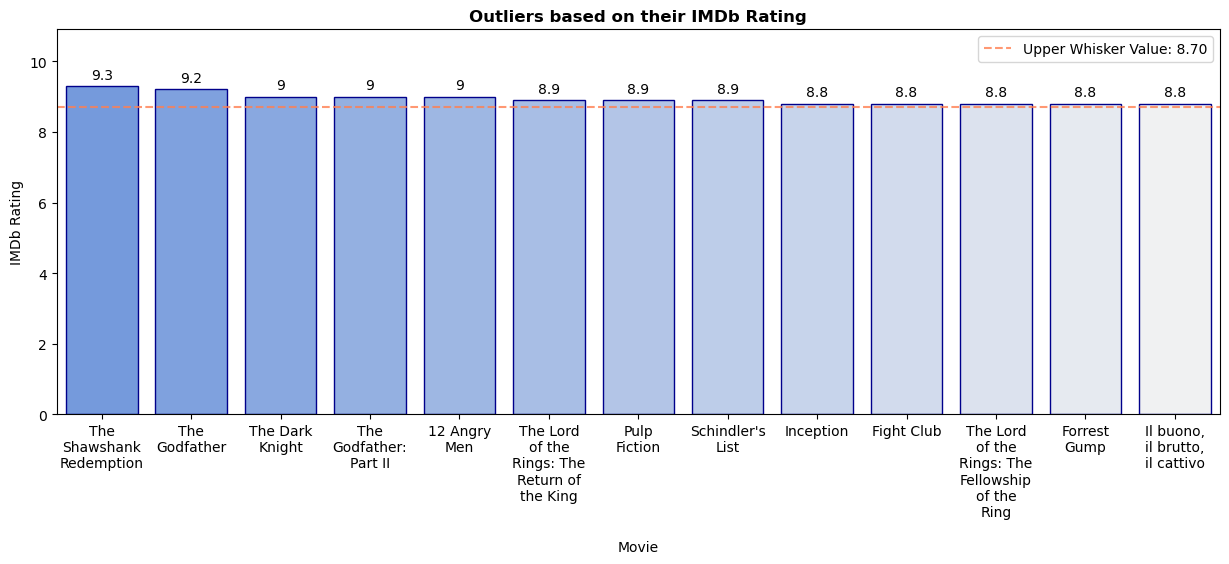

In [22]:
# Used in the 'Distribution of IMDb Ratings' slide

# Creating a bar chart on outliers based on IMDb Rating
def imdb_rating_outliers(outlier_count_table, outlier_count_upper_whisker):
    #cleaned_df_time_avg = cleaned_df['IMDB_Rating'].mean()
    outlier_count_table_size = outlier_count_table.shape[0]
    outlier_count_table = outlier_count_table.rename(columns = {'Series_Title':'Movie', 'IMDB_Rating':'IMDb Rating'})
    
    plt.figure(figsize = (15, 5))
    
    g = sns.barplot(
        x = outlier_count_table['Movie'],
        y = outlier_count_table['IMDb Rating'],
        color = 'cornflowerblue',
        palette = sns.light_palette('cornflowerblue', n_colors = outlier_count_table_size, reverse = True),
        data = outlier_count_table['IMDb Rating'],
        edgecolor = 'darkblue'
    )
    
    plt.axhline(y = outlier_count_upper_whisker, 
                color = 'coral', 
                linestyle='--', 
                alpha = 0.8, 
                label = f'Upper Whisker Value: {outlier_count_upper_whisker:.2f}')
    
    g.set_ylim(0, 10.9)
    g.set_title('Outliers based on their IMDb Rating', weight = 'bold')
    g.set_xlabel('Movie', labelpad = 15)
    
    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)
    
    wrap_labels(g, 10)
    
    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
        
    plt.legend()

    fig = plt.gcf()
    return fig   

imdb_rating_bar_chart_outliers = pn.pane.Matplotlib(imdb_rating_outliers(outlier_count_table, outlier_count_upper_whisker), 
                                                dpi = 144, 
                                                width = 1280, 
                                                align = 'center'
                                               )

In [23]:
# Used in the 'Distribution of IMDb Ratings' slide

# Retrieving various values used in the markdown below
outlier_count_table_shawshank = outlier_count_table.iloc[0, 1]
outlier_count_table_godfather = outlier_count_table.iloc[1, 1]

# Creating markdown for the bar chart above
outlier_bar_chart_movies = pn.pane.Markdown("""
All of the movies on the bar chart above are outliers based on their respective IMDb ratings. On the boxplot we saw earlier, two whiskers were visible, depicting the range of the data. Everything exceeding this range was considered an outlier. Looking at the bar chart above, we also see a horizontal dashed line. This line represents the right whisker, so it lets us see by what margin the movies above have exceeded the range. 
- When we look at the movie titles, most of us will recognize at least a couple of them. These movies being outliers can be explained by the fact that they are some of the most iconic movies in movie history. 
- Most outliers seem to have barely exceeded the dashed line. However, the first two movies, *{}* and *{}*, have done so ba relatively large margin. These movies embody such an impressive combination of artistic merit, viewer popularity and enduring legacy as influential works of cinema art, they have been rewarded with exceptionally high IMDb ratings.
 
"""
.format(
    outlier_count_table_shawshank,
    outlier_count_table_godfather
       ))

outlier_bar_chart_movies


Markdown(str)

# IMDb Ratings over Time

In [24]:
# Used in the 'IMDb Ratings over Time' slide

# Creating markdown for the bar chart above
ratings_over_time_intro = pn.pane.Markdown("""
To uncover more insights on IMDb ratings, we will now segment them by release year. Firstly, we will take a look at a time series (the chart below) to gain perspective on how the average IMDb ratings of the movies in our dataset have changed over time. Then, we will zoom in on the outliers which were uncovered by the time series and visualize them using a boxplot, table and several bar charts.
"""
.format(
       ))

ratings_over_time_intro

Markdown(str)

In [25]:
# Used in the 'IMDb Ratings over Time' slide

# Creating a (Hvplot) line chart for AVG Gross Revenue over time
def line_chart_imdb(cleaned_df):
    cleaned_df_imdb = cleaned_df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
    cleaned_df_imdb['Released_Year'] = cleaned_df_imdb['Released_Year'].astype(int)
    cleaned_df_imdb = cleaned_df_imdb.rename(columns = {'Released_Year':'Release Year', 'IMDB_Rating':'AVG IMDb Rating'})
    
    line_chart = cleaned_df_imdb.hvplot.line(x = 'Release Year',
                                             y = 'AVG IMDb Rating',
                                             ylim = (0, 10),
                                             color = '#759adc'
                                             ).opts(xrotation = 45,
                                                    xticks = 10)
    plt.tight_layout()
    return line_chart

line_chart_imdb_int = line_chart_imdb(cleaned_df)
line_chart_imdb_int

:Curve   [Release Year]   (AVG IMDb Rating)

<Figure size 640x480 with 0 Axes>

In [26]:
# Used in the 'IMDb Ratings over Time' slide
# Positioned above the markdown below because the values in it are referenced
# Referenced by the two markdowns below

# Creating an outliers table to accompany the boxplot above
def outliers_imdb_rating(cleaned_df):
    avg_imdb_rating_overall = cleaned_df['IMDB_Rating'].mean()
    cleaned_df['avg_imdb_rating'] = cleaned_df.groupby('Released_Year')['IMDB_Rating'].transform('mean') #Rounding causes 1941 to be counted as outlier
    
    q1 = cleaned_df['avg_imdb_rating'].quantile(0.25)
    q3 = cleaned_df['avg_imdb_rating'].quantile(0.75)
    iqr = q3 - q1
    
    outliers = cleaned_df[(cleaned_df['avg_imdb_rating'] < (q1 - 1.5 * iqr)) | 
                          (cleaned_df['avg_imdb_rating'] > (q3 + 1.5 * iqr))]
    outliers = outliers.groupby(['Released_Year', 'avg_imdb_rating'])['Series_Title'].count().rename('movie_count').reset_index()
    outliers['Outlier'] = np.where(outliers['avg_imdb_rating'] > avg_imdb_rating_overall, 'positive', 'negative')
    outliers['avg_imdb_rating'] = outliers['avg_imdb_rating'].round(2)
    outliers = outliers.rename(columns = {'Released_Year':'Release Year',
                                          'avg_imdb_rating':'AVG IMDb Rating',
                                          'movie_count':'Movie Count'}
                              )
    outliers = outliers.sort_values(by = 'AVG IMDb Rating', ascending = False).reset_index(drop = True)
    outliers.index = outliers.index + 1
    return outliers

outliers_imdb_rating_table = outliers_imdb_rating(cleaned_df)
outliers_imdb_rating_table

,Release Year,AVG IMDb Rating,Movie Count,Outlier
1,1936,8.50,1,positive
2,1921,8.30,1,positive
3,1957,8.28,9,positive
4,1994,8.24,13,positive
5,1942,8.23,3,positive
6,1924,8.20,1,positive
7,1927,8.20,2,positive
8,1931,8.20,3,positive
9,1954,8.17,6,positive


In [27]:
# Used in the 'IMDb Ratings over Time' slide
# Referenced by the 'ratings_year_markdown2' markdown bwlow
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values used in the markdown below
df_ratings_year_markdown = cleaned_df.copy()
df_ratings_year_mean = df_ratings_year_markdown.groupby('Released_Year')['IMDB_Rating'].mean()
df_ratings_year_mean = round(df_ratings_year_mean.mean(), 2)
df_ratings_year_max = round(df_ratings_year_markdown.groupby('Released_Year')['IMDB_Rating'].mean().max(), 2)
df_ratings_year_min = round(df_ratings_year_markdown.groupby('Released_Year')['IMDB_Rating'].mean().min(), 2)


# Creating a markdown for the line chart above and the boxplot + table below
ratings_year_markdown = pn.pane.Markdown("""
On first glance, looking at the average IMDb rating per year on the time series above, we can see that the line doesn't seem to have any major peaks or drops. It looks relatively steady, with an overall yearly average IMDb rating of {}, and lows and highs of respectively {} and {}. However, if we zoom in a bit (the time series above is interactive), we can certainly see a few peaks. If the values of these peaks are high enough, they will be considered *outliers*. In other words: a year is considered an outlier if it has an exceptionally higher (or lower) average IMDb score compared to the rest of the release years. 

To get a clearer view of the outliers, let's look at the boxplot and accompanying table below. The boxplot shows us how the average IMDb ratings per release year are distributed. The dots on the right side of the boxplot are the outliers. Since none of the dots are positioned on the left side, it means that all of the outliers are positive. In other words: all of them had an exceptionally higher score relative to the rest of the release years. This makes sense, because movies with exceptionally low IMDb scores wouldn't be included in this dataset in the first place.
"""
.format(df_ratings_year_mean, 
        df_ratings_year_min,
        df_ratings_year_max,
))

ratings_year_markdown

Markdown(str)

In [28]:
# Used in the 'IMDb Ratings over Time' slide
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values used in the markdown below
imdb_outliers_count = outliers_imdb_rating_table.count()[0]
imdb_outliers_highest_year = outliers_imdb_rating_table.iloc[0, 0]
imdb_outliers_highest_value = outliers_imdb_rating_table.iloc[0, 1]
imdb_outliers_highest_count = outliers_imdb_rating_table.iloc[0, 2]
imdb_outliers_1954 = outliers_imdb_rating_table.iloc[8, 0]
imdb_outliers_1957 = outliers_imdb_rating_table.iloc[2, 0]
imdb_outliers_1994 = outliers_imdb_rating_table.iloc[3, 0]
imdb_outliers_1954_count = outliers_imdb_rating_table.iloc[8, 2]
imdb_outliers_1957_count = outliers_imdb_rating_table.iloc[2, 2]
imdb_outliers_1994_count = outliers_imdb_rating_table.iloc[3, 2]
movie_count_column = outliers_imdb_rating_table.columns[2]


# Creating a markdown for the line chart above and the boxplot + table below
ratings_year_markdown2 = pn.pane.Markdown("""
- Although it can't clearly be seen in the boxplot due to multiple years having the same average IMDb rating, there are {} outliers in total. When we look at the table to the right of the boxplot above, we see a list of all the outliers, sorted from the highest average IMDb rating (top) to the lowest (bottom). 
- Out of all the outliers, the year {} has the highest average IMDb rating: an {}. This is especially visible on the boxplot, as it is the dot all the way to the right. 
- Although this average seems exceptionally high, when we look at the *{}* column in the table, we see that this can be explained by the fact that only {} movie released in {} has made it into the dataset. 
- When we glance at the other rows in this column, most of the outlier years seem to be based on a relatively low amount of movies as well, which can explain their outlier status. 
- Out of all of the outlier years, only these years stand out based on their movie count: {}, {} and {}. To see what makes these years outliers, we have to take a closer look.
"""
.format(imdb_outliers_count,
        imdb_outliers_highest_year, 
        imdb_outliers_highest_value,
        movie_count_column,
        imdb_outliers_highest_count, 
        imdb_outliers_highest_year,

        imdb_outliers_1954, 
        imdb_outliers_1957, 
        imdb_outliers_1994
))

ratings_year_markdown2

Markdown(str)

In [29]:
# Used in the 'IMDb Ratings over Time' slide

# Creating a markdown as an intro for the bar charts of the outliers below
ratings_deepdive_markdown = pn.pane.Markdown("""
## What makes the years {}, {} and {} outliers?
Above, we have seen that the years {}, {} and {} stand out as outliers because they are based on more movie releases than the rest of the outlier years:  {}, {} and {} movies, respectively. Below, we will take a look at what movies each separate outlier year is comprised of.

"""
.format(imdb_outliers_1954, 
        imdb_outliers_1957, 
        imdb_outliers_1994,
        imdb_outliers_1954, 
        imdb_outliers_1957, 
        imdb_outliers_1994,
        imdb_outliers_1954_count, 
        imdb_outliers_1957_count, 
        imdb_outliers_1994_count,
))

ratings_deepdive_markdown

Markdown(str)

In [30]:
# Used in the 'IMDb Ratings over Time' slide

# Creating a (Plotly) Boxplot on the IMDb distributions
def boxplot_imdb_rating_plotly(cleaned_df):
    cleaned_df['AVG IMDb Rating'] = cleaned_df.groupby('Released_Year')['IMDB_Rating'].transform('mean') #Rounding causes 1941 to be counted as outlier
    cleaned_df['Release Year'] = cleaned_df['Released_Year']
    
    fig = px.box(cleaned_df, x = 'AVG IMDb Rating', hover_data = 'Release Year')
    fig.update_layout(plot_bgcolor = 'white')
    fig.update_traces(marker_color = '#00008b',
                      line_color = '#00008b',
                      fillcolor = '#759adc',
                      line = dict(width = 1.5))
    fig.update_layout(xaxis = dict(linecolor = 'black', linewidth = 1),
                      yaxis = dict(linecolor = 'black', linewidth = 1))#,
                      #title = 'AVG IMDb Rating per Release Year')
    fig.update_traces(hoverlabel = dict(bgcolor = '#b3d4f2',
                                       bordercolor = '#00008b'))
    return fig
    
boxplot_imdb_int = boxplot_imdb_rating_plotly(cleaned_df)
boxplot_imdb_int = pn.pane.Plotly(boxplot_imdb_int, height = 400, width = 800, align = 'start')
boxplot_imdb_int

Plotly(Figure, height=400, sizing_mode='fixed', width=800)

In [31]:
# Used as a reference value in multiple bar charts on the 'IMDb Ratings over Time' slide

imdb_rating_outliers = cleaned_df.copy()
imdb_rating_outliers_avg = imdb_rating_outliers['IMDB_Rating'].mean()
imdb_rating_outliers['avg_imdb_rating'] = imdb_rating_outliers.groupby('Released_Year')['IMDB_Rating'].transform('mean') #Rounding causes 1941 to be counted as outlier

imdb_rating_outliers_q1 = imdb_rating_outliers['avg_imdb_rating'].quantile(0.25)
imdb_rating_outliers_q3 = imdb_rating_outliers['avg_imdb_rating'].quantile(0.75)
imdb_rating_outliers_iqr = imdb_rating_outliers_q3 - imdb_rating_outliers_q1

imdb_rating_outliers_upper_whisker = imdb_rating_outliers_q3 + 1.5 * imdb_rating_outliers_iqr
imdb_rating_outliers_upper_whisker

8.15250386996904

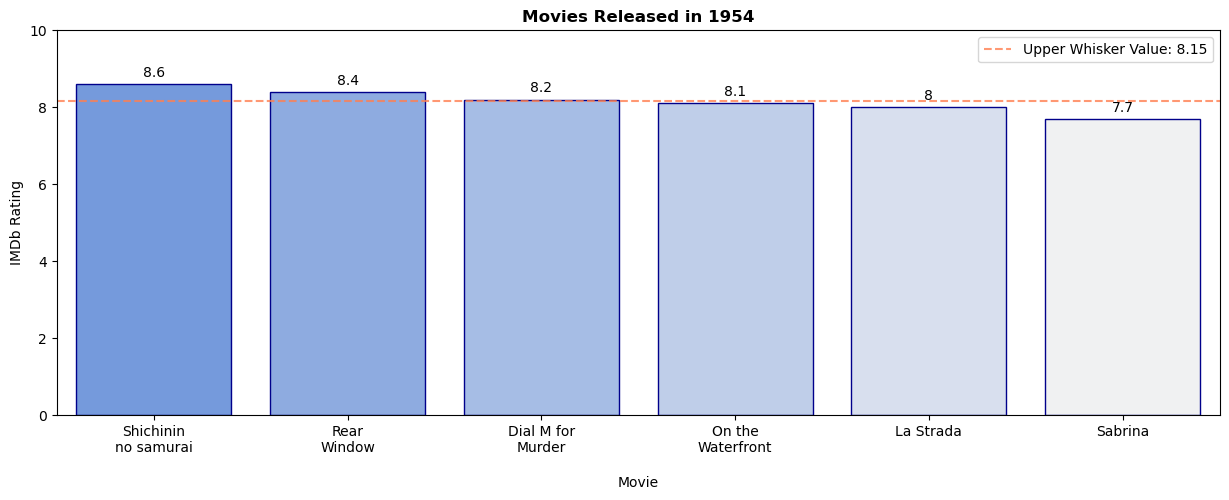

In [32]:
# Used in the 'IMDb Ratings over Time' slide

# Creating a bar chart on the movies released in outlier year 1954
def imdb_rating_1954(cleaned_df, imdb_rating_outliers_upper_whisker):
    cleaned_df_time_avg = cleaned_df['IMDB_Rating'].mean()
    cleaned_df_time_1954 = cleaned_df[cleaned_df['Released_Year'] == '1954']
    cleaned_df_time_1954_size = cleaned_df_time_1954.shape[0]
    cleaned_df_time_1954 = cleaned_df_time_1954.rename(columns = {'Series_Title':'Movie', 'IMDB_Rating':'IMDb Rating'})
    
    plt.figure(figsize = (15, 5))
    
    g = sns.barplot(
        x = cleaned_df_time_1954['Movie'],
        y = cleaned_df_time_1954['IMDb Rating'],
        color = 'cornflowerblue',
        palette = sns.light_palette('cornflowerblue', n_colors = cleaned_df_time_1954_size, reverse = True),
        data = cleaned_df_time_1954['IMDb Rating'],
        edgecolor = 'darkblue'
    )
    
    plt.axhline(y = imdb_rating_outliers_upper_whisker, color = 'coral', linestyle='--', alpha = 0.8, label = f'Upper Whisker Value: {imdb_rating_outliers_upper_whisker:.2f}')
    
    g.set_ylim(0, 10)
    g.set_title('Movies Released in 1954', weight = 'bold')
    g.set_xlabel('Movie', labelpad = 15)
    
    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)
    
    wrap_labels(g, 10)
    
    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
    
    plt.legend()

    fig = plt.gcf()
    return fig   

imdb_rating_bar_chart_1954 = pn.pane.Matplotlib(imdb_rating_1954(cleaned_df, imdb_rating_outliers_upper_whisker), 
                                                dpi = 144, 
                                                width = 1280, 
                                                align = 'center'
                                               )

In [33]:
# Used in the 'IMDb Ratings over Time' slide

# Retrieving various values used in the markdown below
imdb_rating_outliers_filter = cleaned_df.copy()
imdb_rating_outliers_filter = imdb_rating_outliers_filter[imdb_rating_outliers_filter['Released_Year'].isin(['1954', '1957', '1994'])]
imdb_rating_outliers_filter_1954 = imdb_rating_outliers_filter[imdb_rating_outliers_filter['Released_Year'] == '1954']
imdb_rating_outliers_filter_1954_avg = imdb_rating_outliers_filter_1954['IMDB_Rating'].mean().round(2)
imdb_rating_outliers_filter_1954_first = imdb_rating_outliers_filter_1954.iloc[0, 1]
imdb_rating_outliers_filter_1954_second = imdb_rating_outliers_filter_1954.iloc[1, 1]
imdb_rating_outliers_filter_1954_first_rating = imdb_rating_outliers_filter_1954.iloc[0, 6]
imdb_rating_outliers_filter_1954_second_rating = imdb_rating_outliers_filter_1954.iloc[1, 6]
imdb_rating_outliers_filter_1954_last = imdb_rating_outliers_filter_1954.iloc[5, 1]
imdb_rating_outliers_filter_1954_last_rating = imdb_rating_outliers_filter_1954.iloc[5, 6]


# Creating a markdown for the bar chart above
ratings_year_markdown_1954 = pn.pane.Markdown("""
All of the movies released in the outlier year {} are shown in the bar chart above, with each bar being a separate movie. The height of the bars represents their respective IMDb ratings, with the highest rated movie positioned to the left and the lowest rated movie to the right. Similarly to the bar chart we saw before, we also have a dashed horizontal line. The value of this line, which in this case is {}, represents the value of the right whisker on the boxplot we saw earlier. This value marks the threshold of a value being an outlier. Since we are looking at outlier years, it means that the average IMDb rating of all the movies released in the particular year needs to exceed the value of the dashed line in order to be considered an outlier.

- Looking at the bar chart above, we see that half of the movies released in {} have an IMDb rating above the dashed line, and half of the movies have an IMDb rating lower than it. 
- However, the two leftmost movies (*{}* and *{}*) are well above the dashed line, with ratings of {} and {} respectively, yet only one of the lower rated movies to the right (*{}*) is well below the threshold, with an IMDb rating of {}. 
- It seems that the IMDb ratings of the two leftmost movies are high enough to compensate for the movie on the right, which pulls the average IMDb rating for the year {} up to {}. Since this average exceeds the upper whisker value of {}, it makes the year {} an outlier.

"""
.format(imdb_outliers_1954,
        imdb_rating_outliers_upper_whisker.round(2),
        imdb_outliers_1954,
        imdb_rating_outliers_filter_1954_first,
        imdb_rating_outliers_filter_1954_second,
        imdb_rating_outliers_filter_1954_first_rating,
        imdb_rating_outliers_filter_1954_second_rating,
        imdb_rating_outliers_filter_1954_last,
        imdb_rating_outliers_filter_1954_last_rating,
        imdb_outliers_1954,
        imdb_rating_outliers_filter_1954_avg,
        imdb_rating_outliers_upper_whisker.round(2),
        imdb_outliers_1954
       )
)

ratings_year_markdown_1954

Markdown(str)

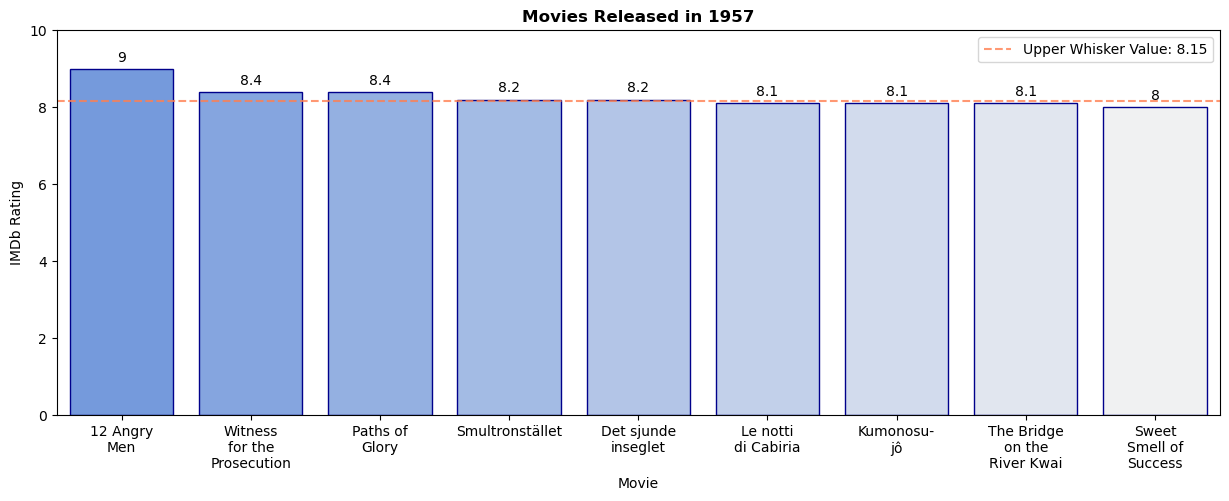

In [34]:
# Used in the 'IMDb Ratings over Time' slide

# Creating a bar chart on the movies released in outlier year 1957
def imdb_rating_1957(cleaned_df, imdb_rating_outliers_upper_whisker):
    cleaned_df_time_avg = cleaned_df['IMDB_Rating'].mean()
    cleaned_df_time_1957 = cleaned_df[cleaned_df['Released_Year'] == '1957']
    cleaned_df_time_1957_size = cleaned_df_time_1957.shape[0]
    cleaned_df_time_1957 = cleaned_df_time_1957.rename(columns = {'Series_Title':'Movie', 'IMDB_Rating':'IMDb Rating'})
    
    plt.figure(figsize = (15, 5))
    
    g = sns.barplot(
        x = cleaned_df_time_1957['Movie'],
        y = cleaned_df_time_1957['IMDb Rating'],
        color = 'cornflowerblue',
        palette = sns.light_palette('cornflowerblue', n_colors = cleaned_df_time_1957_size, reverse = True),
        data = cleaned_df_time_1957['IMDb Rating'],
        edgecolor = 'darkblue'
    )
    
    plt.axhline(y = imdb_rating_outliers_upper_whisker, 
                color = 'coral', 
                linestyle='--', 
                alpha = 0.8, 
                label = f'Upper Whisker Value: {imdb_rating_outliers_upper_whisker:.2f}')
    
    g.set_ylim(0, 10)
    g.set_title('Movies Released in 1957', weight = 'bold')
    g.set_xlabel('Movie')
    
    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)
    
    wrap_labels(g, 10)
    
    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
        
    plt.legend()
    
    fig = plt.gcf()
    return fig   

imdb_rating_bar_chart_1957 = pn.pane.Matplotlib(imdb_rating_1957(cleaned_df, imdb_rating_outliers_upper_whisker), 
                                                dpi = 144, 
                                                width = 1280, 
                                                align = 'center'
                                               )

In [35]:
# Used in the 'IMDb Ratings over Time' slide

# Retrieving various values used in the markdown below
imdb_rating_outliers_filter_1957 = imdb_rating_outliers_filter[imdb_rating_outliers_filter['Released_Year'] == '1957']
imdb_rating_outliers_filter_1957_avg = imdb_rating_outliers_filter_1957['IMDB_Rating'].mean().round(2)
imdb_rating_outliers_filter_1957_first = imdb_rating_outliers_filter_1957.iloc[0, 1]
imdb_rating_outliers_filter_1957_second = imdb_rating_outliers_filter_1957.iloc[1, 1]
imdb_rating_outliers_filter_1957_first_rating = imdb_rating_outliers_filter_1957.iloc[0, 6]


# Creating a markdown for the bar chart above
ratings_year_markdown_1957 = pn.pane.Markdown("""
The bar chart above shows us all of the movies released in the year {}, along with their respective IMDb ratings. The bar chart is sorted by IMDb rating, from the highest on the left to the lowest on the right. Similarly to the {} bar chart we saw earlier, we have a dashed, horizontal line denoting the value of the upper whisker ({}), marking the threshold of a value being an outlier.

- Similar to the {} bar chart we saw before, the {} bar chart above shows that a little more than half of the movies have an IMDb rating exceeding the dashed line, while the other half falls below it.
- This time, however, the lower half dips below the dashed line only slightly, yet the upper half exceeds it with quite a margin. Especially the first movie, *{}*, with an IMDb rating of {}, rises above the dashed line quite a bit, pulling the total average IMDb rating for the year {} well above the upper whisker value to {}. 

"""
.format(imdb_outliers_1957,
        imdb_outliers_1954,
        imdb_rating_outliers_upper_whisker.round(2),
        imdb_outliers_1954,
        imdb_outliers_1957,
        imdb_rating_outliers_filter_1957_first,
        imdb_rating_outliers_filter_1957_first_rating,
        imdb_outliers_1957,
        imdb_rating_outliers_filter_1957_avg
       )
)

ratings_year_markdown_1957

Markdown(str)

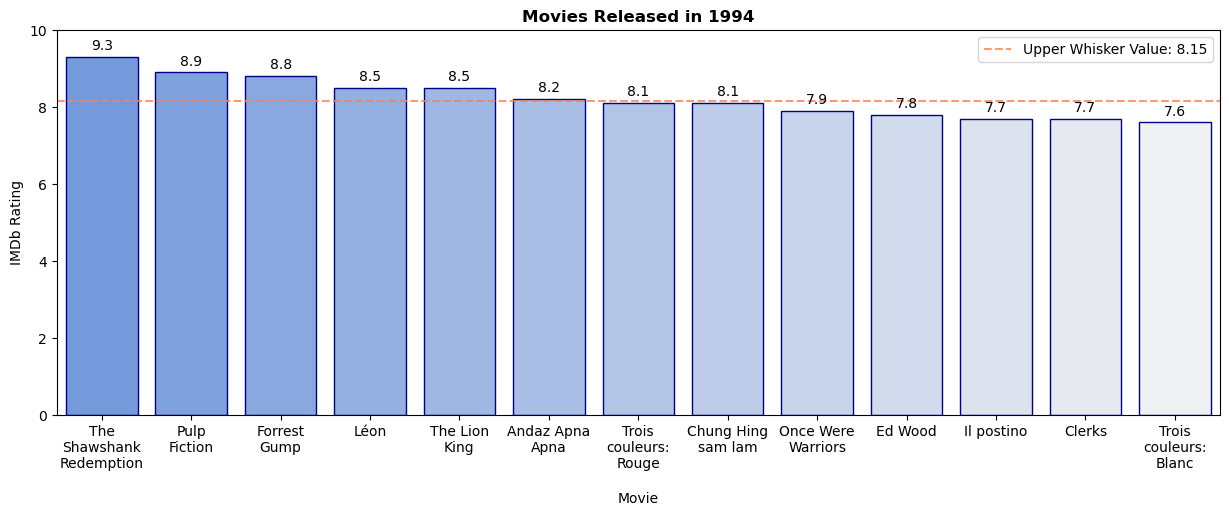

In [36]:
# Used in the 'IMDb Ratings over Time' slide

# Creating a bar chart on the movies released in outlier year 1994
def imdb_rating_1994(cleaned_df, imdb_rating_outliers_upper_whisker):
    cleaned_df_time_avg = cleaned_df['IMDB_Rating'].mean()
    cleaned_df_time_1994 = cleaned_df[cleaned_df['Released_Year'] == '1994']
    cleaned_df_time_1994_size = cleaned_df_time_1994.shape[0]
    cleaned_df_time_1994 = cleaned_df_time_1994.rename(columns = {'Series_Title':'Movie', 'IMDB_Rating':'IMDb Rating'})
    
    plt.figure(figsize = (15, 5))
    
    g = sns.barplot(
        x = cleaned_df_time_1994['Movie'],
        y = cleaned_df_time_1994['IMDb Rating'],
        color = 'cornflowerblue',
        palette = sns.light_palette('cornflowerblue', n_colors = cleaned_df_time_1994_size, reverse = True),
        data = cleaned_df_time_1994['IMDb Rating'],
        edgecolor = 'darkblue'
    )
    
    plt.axhline(y = imdb_rating_outliers_upper_whisker, 
                color = 'coral', 
                linestyle='--', 
                alpha = 0.8, 
                label = f'Upper Whisker Value: {imdb_rating_outliers_upper_whisker:.2f}')
    
    g.set_ylim(0, 10)
    g.set_title('Movies Released in 1994', weight = 'bold')
    g.set_xlabel('Movie', labelpad = 15)
    
    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)
    
    wrap_labels(g, 10)
    
    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
        
    plt.legend()
    
    fig = plt.gcf()
    return fig   

imdb_rating_bar_chart_1994 = pn.pane.Matplotlib(imdb_rating_1994(cleaned_df, imdb_rating_outliers_upper_whisker), 
                                                dpi = 144, 
                                                width = 1280, 
                                                align = 'center'
                                               )

In [37]:
# Used in the 'IMDb Ratings over Time' slide

# Retrieving various values used in the markdown below
imdb_rating_outliers_filter_1994 = imdb_rating_outliers_filter[imdb_rating_outliers_filter['Released_Year'] == '1994']
imdb_rating_outliers_filter_1994_rank1 = imdb_rating_outliers_filter_1994.index[0] + 1
imdb_rating_outliers_filter_1994_count = imdb_rating_outliers_filter_1994.shape[0]
imdb_rating_outliers_filter_1994_median = imdb_rating_outliers_filter_1994['IMDB_Rating'].median()
imdb_rating_outliers_filter_1994_above = imdb_rating_outliers_filter_1994[imdb_rating_outliers_filter_1994['IMDB_Rating'] > imdb_rating_outliers_upper_whisker]
imdb_rating_outliers_filter_1994_above_count = imdb_rating_outliers_filter_1994_above.shape[0]
imdb_rating_outliers_filter_1994_above_avg = imdb_rating_outliers_filter_1994_above['IMDB_Rating'].mean().round(2)
imdb_rating_outliers_filter_1994_below = imdb_rating_outliers_filter_1994[imdb_rating_outliers_filter_1994['IMDB_Rating'] < imdb_rating_outliers_upper_whisker]
imdb_rating_outliers_filter_1994_below_count = imdb_rating_outliers_filter_1994_below.shape[0]
imdb_rating_outliers_filter_1994_below_avg = imdb_rating_outliers_filter_1994_below['IMDB_Rating'].mean().round(2)
imdb_rating_outliers_filter_1994_avg = imdb_rating_outliers_filter_1994['IMDB_Rating'].mean().round(2)

imdb_rating_outliers_filter_1994_first = imdb_rating_outliers_filter_1994.iloc[0, 1]
imdb_rating_outliers_filter_1994_second = imdb_rating_outliers_filter_1994.iloc[1, 1]
imdb_rating_outliers_filter_1994_third = imdb_rating_outliers_filter_1994.iloc[2, 1]
imdb_rating_outliers_filter_1994_first_rating = imdb_rating_outliers_filter_1994.iloc[0, 6]
imdb_rating_outliers_filter_1994_second_rating = imdb_rating_outliers_filter_1994.iloc[1, 6]
imdb_rating_outliers_filter_1994_third_rating = imdb_rating_outliers_filter_1994.iloc[2, 6]


# Creating a markdown for the bar chart above
ratings_year_markdown_1994 = pn.pane.Markdown("""
Out of all the outlier years {} tops the list when it comes to movie count, with a total of {} movies released during this year. Out of these {} movies, {} of them exceed the upper whisker value of {} (represented by the dashed line), and a little more than half of the movies fall below this threshold. 

- It might be a bit hard to see on the bar chart above, but the movies which exceed the dashed line do so with a bigger margin compared to the negative margins of the movies which fall below it. 
- To illustrate this in numbers: 
    - The median of the IMDb ratings for the year {} is {}, which means that half of the movies released in this year have IMDb ratings above it, and half of them score below it. Not a weak median value by any means, but it is still below the value of the dashed line. 
    - When we look at the average IMDb rating of all the movies above the dashed line, we get a value of {}. The movies below the dashed line have an average IMDb rating of {}. This suggests that the collective IMDb ratings of the upper half easily compensates for the collective IMDb ratings of the lower half of the movies. 
- Looking at the bar chart, we can see that especially the first three movies, *{}* (the number {} ranking movie in the entire dataset), *{}* and *{}*, with respective IMDb ratings of {}, {} and {}, pull the total average IMDb rating for {} up to {}, making it a relatively strong outlier.

"""
.format(imdb_outliers_1994,
        imdb_rating_outliers_filter_1994_count,
        imdb_rating_outliers_filter_1994_count,
        imdb_rating_outliers_filter_1994_above_count,
        imdb_rating_outliers_upper_whisker.round(2),
        imdb_outliers_1994,
        imdb_rating_outliers_filter_1994_median,
        imdb_rating_outliers_filter_1994_above_avg,
        imdb_rating_outliers_filter_1994_below_avg,
        imdb_rating_outliers_filter_1994_first,
        imdb_rating_outliers_filter_1994_rank1,
        imdb_rating_outliers_filter_1994_second,
        imdb_rating_outliers_filter_1994_third,
        imdb_rating_outliers_filter_1994_first_rating,
        imdb_rating_outliers_filter_1994_second_rating,
        imdb_rating_outliers_filter_1994_third_rating,
        imdb_outliers_1994,
        imdb_rating_outliers_filter_1994_avg,
        imdb_outliers_1994
       )
)

ratings_year_markdown_1994

Markdown(str)

In [38]:
# Not yet used on a slide

# Creating a (Hvplot) line chart on movies released per year
def movies_released_per_year(cleaned_df):
    avg_releases = cleaned_df.shape[0] / cleaned_df['Released_Year'].nunique()
    cleaned_df = cleaned_df.groupby('Released_Year')['Series_Title'].count().reset_index()
    cleaned_df['Released_Year'] = cleaned_df['Released_Year'].astype(int)
    cleaned_df = cleaned_df.rename(columns = {'Released_Year':'Release Year', 'Series_Title':'Movie Count'})
    
    line_chart = cleaned_df.hvplot.line(x = 'Release Year',
                                        y = 'Movie Count',
                                        ylim = (0, cleaned_df['Movie Count'].max() + 10),
                                        color = '#759adc'
                                       ).opts(xrotation = 45, xticks = 10)
    
    avg_movie_count_line = hv.HLine(avg_releases).opts(color = 'coral',
                                                       line_width = 2,
                                                       line_dash = 'dashed',
                                                       alpha = 0.8)
    combined_chart = line_chart * avg_movie_count_line
    return combined_chart

movies_released_int = movies_released_per_year(cleaned_df)
movies_released_int

:Overlay
   .Curve.I :Curve   [Release Year]   (Movie Count)
   .HLine.I :HLine   [x,y]

In [39]:
# Not yet used on a slide

# Creating a (Hvplot) line chart on average runtime (in mins) per year
def line_chart_runtime(cleaned_df):
    cleaned_df_runtime_avg = cleaned_df['Runtime'].mean()
    cleaned_df_runtime = cleaned_df.groupby('Released_Year')['Runtime'].mean().reset_index()
    cleaned_df_runtime['Released_Year'] = cleaned_df_runtime['Released_Year'].astype(int)
    cleaned_df_runtime = cleaned_df_runtime.rename(columns = {'Released_Year':'Release Year', 'Runtime':'AVG Runtime in Minutes'})
    
    line_chart = cleaned_df_runtime.hvplot.line(x = 'Release Year',
                                                y = 'AVG Runtime in Minutes',
                                                ylim = (0, cleaned_df_runtime['AVG Runtime in Minutes'].max() + 50),
                                                color = '#759adc'
                                               ).opts(xrotation = 45,
                                                      xticks = 10)
    
    avg_runtime_line = hv.HLine(cleaned_df_runtime_avg).opts(color = 'coral', 
                                                             line_width = 2, 
                                                             line_dash = 'dashed', 
                                                             alpha = 0.8)
    
    combined_chart = line_chart * avg_runtime_line
    return combined_chart

line_chart_runtime_int = line_chart_runtime(cleaned_df)
line_chart_runtime_int

:Overlay
   .Curve.I :Curve   [Release Year]   (AVG Runtime in Minutes)
   .HLine.I :HLine   [x,y]

In [40]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Correlation between IMDb rating, meta score, number of votes and gross earnings (USD)

In [41]:
# Used as source for the heapmap below + as a reference for both markdowns below

# Creating a matrix of correlation values
def correlation_table_columns(cleaned_df):
    corr_table = (cleaned_df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Released_Year', 'Runtime']]
                  .rename(columns = {'IMDB_Rating':'IMDB Rating',
                                     'Meta_score':'Meta Score',
                                     'No_of_Votes':'No of Votes',
                                     'Gross_in_MM':'Gross in MM',
                                     'Released_Year':'Release Year'})
             )
    corr_table = corr_table[(corr_table['Gross'] != 0) & (corr_table['Meta Score'].notna())]
    corr_table = corr_table.corr()
    np.fill_diagonal(corr_table.values, np.nan)
    return corr_table

corr_table = correlation_table_columns(cleaned_df)
corr_table

,IMDB Rating,Meta Score,No of Votes,Gross,Release Year,Runtime
IMDB Rating,NaN,0.282690,0.614111,0.127845,-0.178899,0.255907
Meta Score,0.282690,NaN,0.010308,-0.030587,-0.306420,-0.012211
No of Votes,0.614111,0.010308,NaN,0.555461,0.203311,0.217212
Gross,0.127845,-0.030587,0.555461,NaN,0.235827,0.172840
Release Year,-0.178899,-0.306420,0.203311,0.235827,NaN,0.012969
Runtime,0.255907,-0.012211,0.217212,0.172840,0.012969,NaN


In [42]:
# Used in the 'Correlation' slide
# Placed under the matrix above, because it uses it as a reference
# Various values used in the correlation_markdown cell

# Retrieving various values used in the markdown below
gross_column_name = corr_table.columns[3]
votes_column_name = corr_table.index[2]
gross_votes_value = corr_table.iloc[3, 2].round(2)
meta_score_name = corr_table.index[1]


correlation_markdown_intro = pn.pane.Markdown("""
In this part of this exploratory data analysis, we take a look at the relationships between certain columns. In order to understand the data better, we have to look at how different factors may influence a movie's IMDb rating. This is done by using *correlation*. Correlation is a statistical concept which helps us understand how two variables are related to each other. For example, if the values in one column go up, what tends to happen with the values in other columns? Do they go up, down or stay the same? By understanding such relationships, it helps us get a better understanding of the data and, in turn, can help us make better datadriven decisions. However, it is always important to keep in mind that correlation does not imply causation. In other words: just because two things are correlated doesn't mean that one causes the other.

We will first take a look at the heatmap below to check the correlation between the numeric columns in the dataset. Since not everybody might be familiar with reading a heatmap, here is a short instruction of the heatmap below:

- On first glance, we see various colors and numbers, as well as an x and y-axis with identical labels. 
- These labels represent the columns in our dataset we want to match to investigate their relationship. Since the axes form a matrix, with identical labels on the x and y-axis, it lets us match the different columns with one another. 
- Let's say we want to know more about the pairing of two specific columns. We just have to select a particular column on the x-axis (the horizontal axis) and draw an imaginary line from this column upward. On the y-axis we select the column we want to match it with and draw another line from this column horizontally to the right. Then we look at the value where these lines meet. 
    - For instance, if we want to know more about the column pairing *{} - {}*, we draw these invisible lines and check to see where they meet, which is the value {}. 

This value is the *correlation coefficient* (sometimes expressed as the letter *r*) of those particular columns, which shows us how the two columns are related. The correlation coefficient has a standard minimum value of -1 and a maximum value of 1. The closer this value is to -1 or 1, the stronger the (negative or positive) correlation will be. In our heatmap, we're really only interested in values if they're either -0.30 or lower or 0.30 or higher, otherwise the correlation is too weak to be of interest.
- If the correlation coefficient is negative, it means that the values in these columns tend to move in opposite directions. I.e., when the values in one column go up, they tend to go down in the other column.
- Conversely, if the correlation coefficient is positive, it means that the values in both columns tend to move in the same direction. I.e., if the values in one column go up, they tend to go up in the other column as well.
- However, keep in mind that this is a tendency; it might not always be the case.
- Since the correlation coefficient ranges from -1 to 1, we have a center value of 0. The value 0 means there's no linear correlation. So, if we would have a correlation coefficient of 0.5, the values in one column tend to move in the same direction as the value in the other column, moreso than by chance (value of 0).
- To make things easier to spot, the relationship between columns is also expressed as a color. The scale next to the heatmap shows us that the lower the value is below 0, the bluer its color will be; the higher the value is above 0, the redder its color will be.

**Note:** the heatmap and the scatterplots on this slide have been corrected for missing values in the *{}* and *{}* columns.
"""
.format(gross_column_name,
        votes_column_name,
        gross_votes_value,
        gross_column_name,
        meta_score_name)

)

correlation_markdown_intro

Markdown(str)

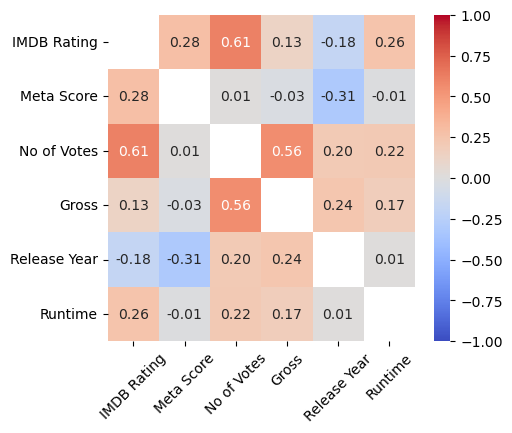

In [43]:
# Used in the 'Correlation' slide

# Creating a heatmap on the correlation of certain columns based on the matrix above
def correlation_table_columns(corr_table):
    sns.heatmap(corr_table, 
                annot = True, 
                fmt = '.2f', 
                cmap = 'coolwarm', 
                vmin = -1, 
                vmax = 1)
    plt.subplots_adjust(bottom = 0.2)
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    plt.subplots_adjust(left = 0.3)
    fig = plt.gcf()
    return fig
    
corr_table_heatmap = pn.pane.Matplotlib(correlation_table_columns(corr_table), width = 600)

In [44]:
# Used in the 'Correlation' slide
# The values below are referenced by three markdown cells below

# Retrieving various values used in the markdown below
corr_year_meta = corr_table.iloc[4, 1].round(2)
imdb_column_name = corr_table.index[0]
imdb_votes_value = corr_table.iloc[0, 2].round(2)


# Creating a markdown for both the matrix above and both scatterplots below
correlation_markdown_1 = pn.pane.Markdown("""
## Correlation between columns in our dataset

On the heatmap above, three values have crossed the 0.30 or -0.30 thresholds: *{}*, *{}* and *{}*. Below, we will first talk about the two positive values, after which we will shortly discuss the negative value. We will do so through the help of scatterplots. Scatterplots are visualizations which help us understand and interpret the relationship between variables. They enable us to do several things, like identify trends, determine correlation, spot outliers, visualize distribution, etc.
"""
.format(imdb_votes_value,
        gross_votes_value,
        corr_year_meta)
)

correlation_markdown_1

Markdown(str)

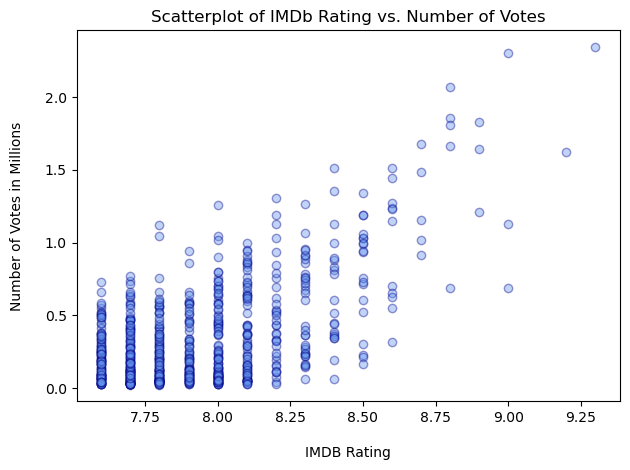

In [45]:
# Used in the 'Correlation between IMDb rating, meta score, number of votes and gross earnings (USD)' slide

# Creating a scatterplot on IMDb ratings vs number of votes
def rating_vs_votes(cleaned_df):
    cleaned_df = cleaned_df[(cleaned_df['Gross'] != 0) & (cleaned_df['Meta_score'].notna())]
    x = cleaned_df['IMDB_Rating']
    y = cleaned_df['No_of_Votes_in_MM']
    plt.scatter(x, y, alpha = 0.4, color ='CornflowerBlue', edgecolor = 'darkblue')
    
    plt.xlabel('IMDB Rating', labelpad = 15)
    plt.ylabel('Number of Votes in Millions', labelpad = 15)
    plt.title('Scatterplot of IMDb Rating vs. Number of Votes')
    
    # Prevents x-axis label from being cut off
    plt.tight_layout()
    fig = plt.gcf()
    return fig

rating_vs_votes_plot = pn.pane.Matplotlib(rating_vs_votes(cleaned_df), dpi = 144, width = 625)

In [46]:
# Used in the 'Correlation' slide
# Also referring to the correlation_markdown cell
# Referenced by the 'Introduction' slide markdown at the end

# Creating a markdown for both the matrix above and both scatterplots below
correlation_markdown_2 = pn.pane.Markdown("""
The first value, {}, is the correlation coefficient of the *{}* column and the *{}* column. Seeing as this value is higher than 0.30, it tells us there is a moderate positive correlation between the number of votes and the IMDb ratings. This suggests that movies with larger number of votes tend to have relatively higher IMDb ratings. 

Looking at the scatterplot above, we see that it is a visualization of the same *{}* and *{}* columns, with {} on the x-axis and {} on the y-axis. Since every dot on this scatterplot is one movie rating, we can say that the higher its IMDb rating is, the farther the dot will be placed towards the right, and the more votes it has, the farther the dot will be placed towards the top of the plot. When we look at the scatterplot as a whole, the following is visible:
- Looking at how the dots are distributed on the plot, we can see the dots fan out from the bottom left corner towards the top right corner. This, paired with a correlation coefficient of {}, suggests that movies with higher IMDb ratings tend to have more votes. 
- The colors of the scatterplot (which is unrelated to the color scale of the heatmap) show a darker blue in the bottom left corner of the plot, which is caused a by a large cluster of dots.
- A possible reason for this cluster could be the presence of indie-films or lesser-known movies in our dataset, which might not attract the same number of votes compared Hollywood blockbuster movies.
"""
.format(imdb_votes_value,
        
        imdb_column_name,
        votes_column_name,

        imdb_column_name,
        votes_column_name,
        imdb_column_name,
        votes_column_name,
        imdb_votes_value)
)

correlation_markdown_2

Markdown(str)

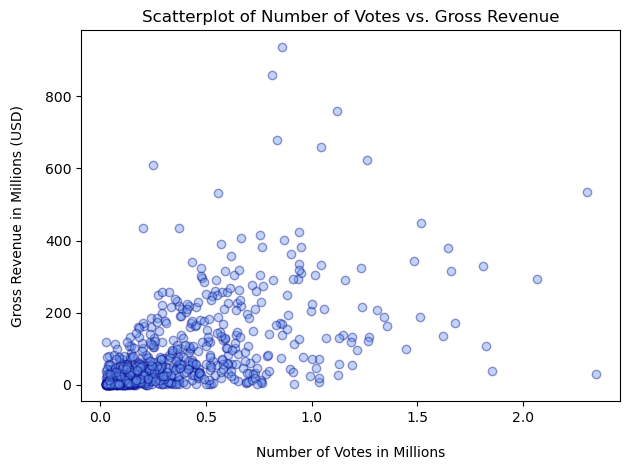

In [47]:
# Used in the 'Correlation between IMDb rating, meta score, number of votes and gross earnings (USD)' slide

# Creating a scatterplot on number of votes vs. Gross Revenue
def votes_vs_gross(cleaned_df):
    cleaned_df = cleaned_df[(cleaned_df['Gross'] != 0) & (cleaned_df['Meta_score'].notna())]
    x = cleaned_df['No_of_Votes_in_MM']
    y = cleaned_df['Gross_in_MM']
    plt.scatter(x, y, alpha = 0.4, color = 'CornflowerBlue', edgecolor = 'darkblue')
    
    plt.xlabel('Number of Votes in Millions', labelpad = 15)
    plt.ylabel('Gross Revenue in Millions (USD)', labelpad = 15)
    plt.title('Scatterplot of Number of Votes vs. Gross Revenue')
    
    plt.tight_layout()
    fig = plt.gcf()
    return fig

votes_vs_gross_plot = pn.pane.Matplotlib(votes_vs_gross(cleaned_df), dpi = 144,  width = 625)

In [48]:
# Used in the 'Correlation' slide
# Referenced by the 'Introduction' slide markdown at the end

# Creating a markdown for both the matrix above and both scatterplots below
correlation_markdown_3 = pn.pane.Markdown("""
The second value which stood out from the rest was *{}*, which is the correlation coefficient of the *{}* column and the *{}* column. Looking at the scatterplot above, we see the {} column on the x-axis and the {} column on the y-axis. Looking at the scatterplot as a whole, we can say the following: 
- Similar to the scatterplot to the first scatterplot, we see a cluster of dots in the bottom left corner, fanning out toward the top right. Paired with a correlation coefficient of {}, this suggests a moderate positive correlation between the {} column and the {} column. In other words: the gross revenue of movies tends to increase when the number of votes increases.
- This makes sense, as a relatively high gross revenue suggests a larger viewership. More people having seen the particular movie, in turn, could explain the higher number of votes.
- The high concentration of dots in the bottom left corner suggests that large amount of movies in our dataset tend to have relatively low amount of votes as well as a relatively low amount of revenue.

"""
.format(gross_votes_value,
        gross_column_name,
        votes_column_name,
        votes_column_name,
        gross_column_name,

        gross_votes_value,
        votes_column_name,
        gross_column_name,)
)

correlation_markdown_3

Markdown(str)

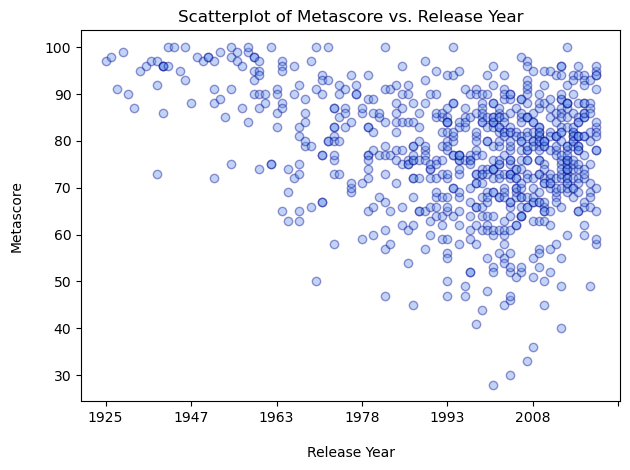

In [49]:
# Used in the 'Correlation between IMDb rating, meta score, number of votes and gross earnings (USD)' slide

# Creating a scatterplot on number of votes vs. Gross Revenue
def metascore_vs_release_year(cleaned_df):
    cleaned_df = cleaned_df[(cleaned_df['Gross'] != 0) & (cleaned_df['Meta_score'].notna())]
    cleaned_df = cleaned_df.sort_values(by = 'Released_Year')
    x = cleaned_df['Released_Year']
    y = cleaned_df['Meta_score']
    plt.scatter(x, y, alpha = 0.4, color = 'CornflowerBlue', edgecolor = 'darkblue')
    
    plt.xlabel('Release Year', labelpad = 15)
    plt.ylabel('Metascore', labelpad = 15)
    plt.title('Scatterplot of Metascore vs. Release Year')
    
    plt.gca().xaxis.set_major_locator(MultipleLocator(15))
    
    plt.tight_layout()
    fig = plt.gcf()
    return fig

metascore_vs_release_year_plot = pn.pane.Matplotlib(metascore_vs_release_year(cleaned_df), dpi = 144,  width = 625)

In [50]:
# Used in the 'Correlation' slide
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values used in the markdown below
release_year_column_name = corr_table.index[4]
meta_score_column_name = corr_table.columns[1]

# Creating a markdown for both the matrix above and both scatterplots below
correlation_markdown_4 = pn.pane.Markdown("""
The final value which stood out from the rest is *{}*, which is the correlation coefficient of the *{}* and *{}* columns. This is the only negative correlation coefficient in our heatmap which crossed the -0.30 threshold. Since it only barely did so, the negative correlation isn't very strong. In essence, a negative correlation between two columns means that when the values in one column go up, the values in the other column tend to go down. Looking at the scatterplot above, we see the {} column on the x-axis and the {} column on the y-axis. As a whole, the scatterplot shows us the following:

- There is a large cluster of dots in the upper right corner. Since every single dot is one movie, this indicates that a large amount of movies have a release year of 1990-2020 and a Metascore of 60-95.
- When we move from left to right along the x-axis, we move on a timeline, from the past towards the present. When we look at how the dots are distributed on the scatterplot, we can see a downward trend, meaning that as we get closer to the present the Metascore seems to decrease. 
- Obviously, there could be several explanations for it. E.g., perhaps critics have become more stringent over time, or maybe the criteria for a score have evolved. It might even be possible that critics tend to rate older movies more favorably due to their historical value or comparative quality.
"""
.format(corr_year_meta,
        meta_score_column_name,
        release_year_column_name,
        release_year_column_name,
        meta_score_column_name,

       )
)

correlation_markdown_4

Markdown(str)

## Breakdown per Genre

In [51]:
# Used in the 'Breakdown per Genre' slide

# Creating a markdown for both the matrix above and both scatterplots below
genre_markdown_intro = pn.pane.Markdown("""

Although IMDb ratings is perhaps the most important metric in the entire dataset, it's crucial to also segment the dataset in other ways. In this slide we will break the dataset down by movie genre. Looking at the dataset through the lens of movie genres is a great way to uncover insights and identify patterns, as they reflect collective tastes and preferences of viewers. We will do this through the table below, where several other metrics are shown as well. For your convencience, a slider has been added on top to filter on a minimum amount of movies. 

Given the fact that movies can be categorized as multiple categories at once, we will also take a look at which movie genres tend to be paired up and which pairs are unlikely.
"""
)

genre_markdown_intro

Markdown(str)

In [52]:
# Used in the 'Breakdown per genre' slide

# Creating a table with a breakdown per genre
def genre_breakdown_table(cleaned_df):
    df_genre = cleaned_df
    df_genre['genre_single'] = df_genre['Genre'].str.split(',').tolist()
    df_genre = cleaned_df.explode('genre_single')
    df_genre['Genre'] = df_genre['genre_single'].str.lstrip()
    df_genre = (df_genre.groupby('Genre')
                    .agg({'Genre':'count',
                          'IMDB_Rating':'mean', 
                          'No_of_Votes':'mean',
                          'Runtime':'mean'
                         }
                        )
                    .rename(columns = {'Genre':'Movie Count', 
                                        'IMDB_Rating':'AVG IMDB Rating', 
                                        'No_of_Votes':'AVG No of Votes',
                                       'Runtime':'AVG Runtime in Mins'
                                      }
                           )
                    .sort_values(by = 'Movie Count', ascending = False)
               )
    df_genre['AVG IMDB Rating'] = df_genre['AVG IMDB Rating'].round(1)
    df_genre['AVG No of Votes'] = df_genre['AVG No of Votes'].astype(int)
    df_genre['AVG Runtime in Mins'] = df_genre['AVG Runtime in Mins'].astype(int)
    df_genre = df_genre[['Movie Count', 'AVG IMDB Rating', 'AVG No of Votes', 'AVG Runtime in Mins']]
    return df_genre

df_genre = genre_breakdown_table(cleaned_df)

# Making the table interactive
df_genre_int = df_genre.interactive()

# Creating a (Panel) slider for minimum amount of movies
df_genre_count_slider = pn.widgets.FloatSlider(name = 'Minimum Amount of Movies',
                                               start = df_genre['Movie Count'].min(),
                                               end = df_genre['Movie Count'].max(),
                                               step = 1,
                                               value = df_genre['Movie Count'].min()
                                              )

# Creating a pipeline
df_genre_int = df_genre_int[df_genre_int['Movie Count'] >= df_genre_count_slider]
df_genre_int

In [53]:
# Used as a reference for the markdown 'genre_print2' in the 'Breakdown per genre' slide

# Creating a table with a breakdown per genre corrected by 
def genre_breakdown_table_corrected(cleaned_df):
    df_genre = cleaned_df
    df_genre['genre_single'] = df_genre['Genre'].str.split(',').tolist()
    df_genre = cleaned_df.explode('genre_single')
    df_genre['Genre'] = df_genre['genre_single'].str.lstrip()
    df_genre = df_genre[df_genre['Gross'] != 0]
    df_genre = (df_genre.groupby('Genre')
                    .agg({'Genre':'count',
                          'IMDB_Rating':'mean', 
                          'No_of_Votes':'mean',
                          'Runtime':'mean',
                          'Gross':'mean'
                         }
                        )
                    .rename(columns = {'Genre':'Movie Count', 
                                        'IMDB_Rating':'AVG IMDB Rating', 
                                        'No_of_Votes':'AVG No of Votes',
                                       'Runtime':'AVG Runtime in Mins',
                                       'Gross':'AVG Gross Revenue'
                                      }
                           )
                    .sort_values(by = 'Movie Count', ascending = False)
               )
    df_genre['AVG IMDB Rating'] = df_genre['AVG IMDB Rating'].round(1)
    df_genre['AVG No of Votes'] = df_genre['AVG No of Votes'].astype(int)
    df_genre['AVG Runtime in Mins'] = df_genre['AVG Runtime in Mins'].astype(int)
    df_genre['AVG Gross Revenue'] = df_genre['AVG Gross Revenue'].astype(int)
    df_genre['gross_ranking'] = df_genre['AVG Gross Revenue'].rank(method = 'dense', ascending = False).astype(int)
    df_genre = df_genre[['Movie Count', 'AVG IMDB Rating', 'AVG No of Votes', 'AVG Runtime in Mins', 'AVG Gross Revenue', 'gross_ranking']]
    return df_genre

genre_breakdown_table_corrected = genre_breakdown_table_corrected(cleaned_df)
genre_breakdown_table_corrected

,Movie Count,AVG IMDB Rating,AVG No of Votes,AVG Runtime in Mins,AVG Gross Revenue,gross_ranking
Genre,,,,,,
Drama,597,8.0,276562,128,46059669,13
Comedy,191,7.9,260878,110,64125296,7
Crime,171,8.0,329253,124,40680139,15
Adventure,170,8.0,479453,126,165731278,1
Action,156,7.9,476499,126,141239283,3
Thriller,110,7.9,360034,120,58676626,8
Romance,107,7.9,223521,120,40358847,16
Biography,96,7.9,273541,137,55256018,10
Mystery,84,8.0,334111,123,41274382,14


In [54]:
# Is referenced by several markdowns below

# Counting unique genres in our dataset.
def genre_breakdown(cleaned_df):
    genre = (pd.DataFrame(cleaned_df['Genre'].str.split(', ').tolist())
             .stack()
             .to_frame('genre')
             .reset_index(drop = True)
            )
    genre_count = genre.nunique().iloc[0]
    return genre_count

genre_count = genre_breakdown(cleaned_df)
genre_count

21

In [55]:
# Is referenced by several markdowns below

# Creating a synopsis per genre 
def drama_genre(cleaned_df):
    drama_total = (df_genre.iloc[0][0]).astype(int)    
    drama_solo = df[df['Genre'] == 'Drama']
    drama_solo = drama_solo['Series_Title'].count()
    drama_shared = drama_total - drama_solo
    return drama_solo, drama_total, drama_shared

drama_solo, drama_total, drama_shared = drama_genre(cleaned_df)
drama_solo, drama_total, drama_shared

(85, 724, 639)

In [56]:
# Used in the 'Breakdown per genre' slide
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values used in the markdown below
df_genre_table = cleaned_df.copy()
df_genre_table = df_genre_table[~df_genre_table['Genre'].str.contains(',')]
df_genre_table = df_genre_table.groupby('Genre')['Genre'].count().to_frame('Genre Count').sort_values(by = 'Genre Count', ascending = False)
df_genre_table_drama = df_genre_table.index[0]
df_genre_table_drama_count = df_genre_table.iloc[0, 0]
df_genre_table_comedy = df_genre_table.index[1]
df_genre_table_comedy_count = df_genre_table.iloc[1, 0]
df_genre_table_western = df_genre_table.index[2]
df_genre_table_western_count = df_genre_table.iloc[2, 0]
df_genre_table_horror = df_genre_table.index[3]
df_genre_table_horror_count = df_genre_table.iloc[3, 0]
df_genre_table_thriller = df_genre_table.index[4]
df_genre_table_thriller_count = df_genre_table.iloc[4, 0]
corrected_genre_drama_ranking = genre_breakdown_table_corrected.iloc[0, 5]
corrected_genre_drama_gross = (genre_breakdown_table_corrected.iloc[0, 4] / 1000000).round(2)


# Creating a markdown for the table on the breakdown per genre
genre_print2 = pn.pane.Markdown("""
In our IMDb movies dataset, movies are categorized by genre(s). In total, the dataset contains {} movies, belonging to {} different genres. In the table to the left, you will see the dataset segmented by genre, with a count of the movies next to it, alongside certain other metrics. 

With a total of {} movies, the genre '{}' has the most movies ascribed to it by a relatively large margin. Interestingly, the average gross revenue for {} isn't the highest by any means. When corrected for missing values in the *Gross* column, with an average of USD {} million per movie, the genre {} ranks only {}th (out of {}) for highest average gross revenue. This begs the question: if the category {} is far from being the genre with the highest average gross revenue, why is it the category with the most movies ascribed to it in this dataset?

A possible (partial) explanation for this can be found in the fact that every single movie can be categorized as multiple genres at the same time. For instance, the movie 'The Dark Knight' is categorized as 'Action', 'Crime' and 'Drama'. It turns out that out of {} movies belonging to the genre {}, only {} movies belong to this genre without simultaneously belonging to one or more other genres. This means that {} movies are categorized as one or more other genres aside from being categorized as {}. This could, in part, explain the relatively large amount of movies belonging to the genre {}, but a deeper dive into the data is needed. Other genres containing movies ascribed to only that particular category are:
- *{}* with {} movies, 
- *{}* with {} movies, 
- *{}* with {} movies, 
- *{}* with {} movie.

Seeing as most movies are categorized as more than one genre, this raises the question about which movie genres tend to appear together, and which genres don't. To answer this question we will dive into genre pairings below. 


"""
      .format(cleaned_df['Series_Title'].count(), 
              genre_count,
              
              drama_total,
              df_genre_table_drama,
              df_genre_table_drama,
              corrected_genre_drama_gross,
              df_genre_table_drama,
              corrected_genre_drama_ranking,
              genre_count,

              df_genre_table_drama,

              drama_total,
              df_genre_table_drama,
              drama_solo,
              drama_shared,
              df_genre_table_drama,
              df_genre_table_drama,
              df_genre_table_comedy,
              df_genre_table_comedy_count,
              df_genre_table_western,
              df_genre_table_western_count,
              df_genre_table_horror,
              df_genre_table_horror_count,
              df_genre_table_thriller,
              df_genre_table_thriller_count,
             ), width = 550
)

genre_print2


Markdown(str, width=550)

In [57]:
# Used in the 'Breakdown per genre' slide

# Creating a markdown for the heatmap below
genre_print3 = pn.pane.Markdown("""
## Which movie genre pairings are most and least likely?
Determining which movie genres tend to occur together in our dataset and which don't is best done through a matrix. Below you will find a heatmap in which all movie genres have been included in a matrix. Since we now have some experience in reading such a heatmap after having read the one on the 'Correlation' slide, reading this heatmap shouldn't be a problem.
"""
)

genre_print3

Markdown(str)

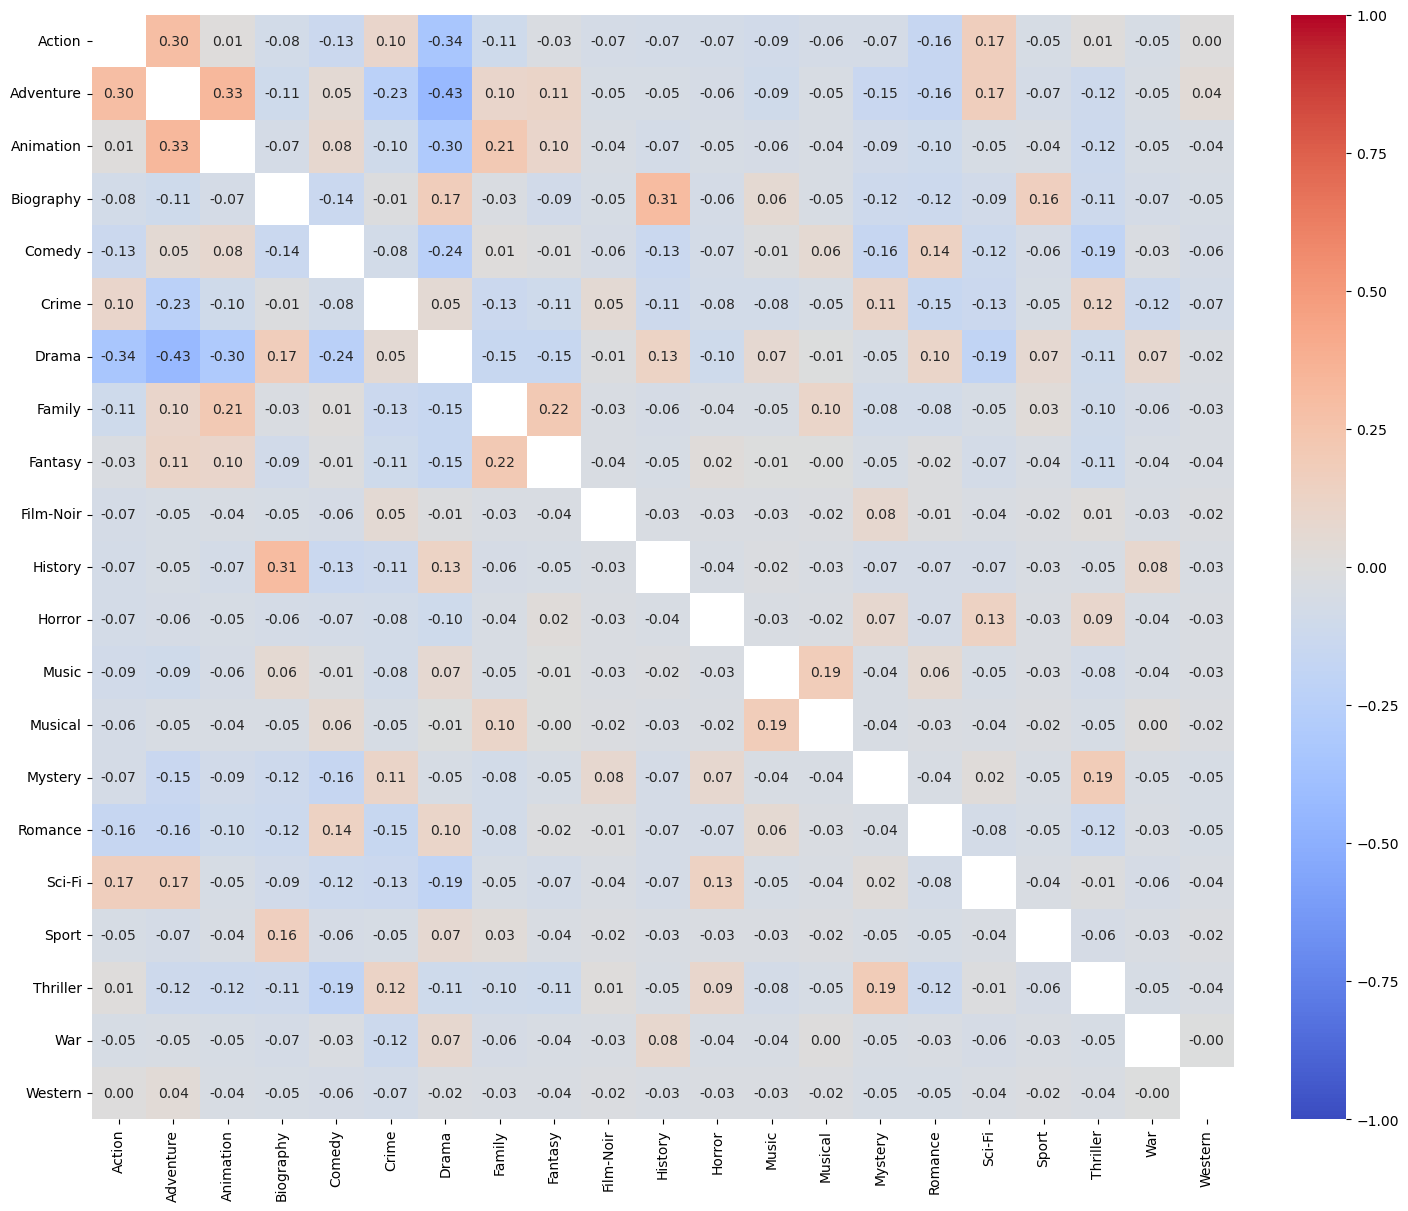

In [58]:
# Used in the 'Breakdown per genre' slide

# Creating a heatmap on the most (un)common movie genre pairings
def genre_matrix(cleaned_df):
    genre_matrix = cleaned_df['Genre'].str.get_dummies(sep = ', ')
    genre_correlation = genre_matrix.corr()
    plt.figure(figsize = (14, 12), constrained_layout = True)
    np.fill_diagonal(genre_correlation.values, np.nan)
    sns.heatmap(genre_correlation, 
                annot = True, 
                fmt = '.2f', 
                cmap = 'coolwarm', 
                vmin = -1, 
                vmax = 1)
    #plt.title('Genre Correlation Heatmap')
    fig = plt.gcf()
    return fig
    
genre_matrix_corr = pn.pane.Matplotlib(genre_matrix(cleaned_df), width = 1080, align = 'start')

In [59]:
# Used in the 'Breakdown per genre' slide

# Creating a markdown for the compact heatmap below
genre_print4 = pn.pane.Markdown("""
On the heatmap above, how likely a genre pairing is can be seen by both its numeric value (correlation coefficient, a.k.a. 'r'), as well as by its color. Like we saw on the previous slide, a strong positive correlation (r closer to 1) between two genres suggests they are likely to appear together, while a strong negative correlation (r closer to -1) suggests the opposite. Also similar to the previous slide, we will consider a pairing of genres to be somewhat likely starting from a value of 0.30 (and higher), and less likely starting from a value of -0.30 (and lower). Based on this value, every pairing is also given a color, to make it more easily recognizable whether a pairing is likely or not. As we can see on the scale to the right of the heatmap, the more likely a genre pairing is, the more its color moves towards the red end of the scale, with the opposite being true towards the blue end of the scale. 

- On first glance, there don't seem many highly correlated movie genre pairs on our heatmap above. 
- We see a couple of bluish and reddish movie genre pairs pop up, mainly in the top left corner. 
- To make things more clear, below you will see a more compact heatmap containing only the (rounded) values equal to or above 0.30, and equal to or below -0.30. 
- Below it, you will find a table sorted by how likely a genre pairing is, with the highest likelihood on top and the lowest on the bottom.

"""
)

genre_print4

Markdown(str)

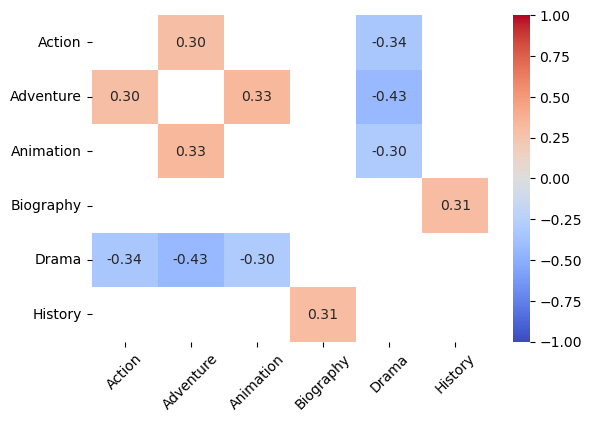

In [60]:
# Used in the 'Breakdown per genre' slide

# Creating a matrix on the most (un)common movie genre pairings
# This matrix is also referenced by the markdown and table below when looking at outliers
def genre_matrix_table(cleaned_df):
    genre_matrix = cleaned_df['Genre'].str.get_dummies(sep = ', ')
    genre_correlation_matrix = genre_matrix.corr()
    np.fill_diagonal(genre_correlation_matrix.values, np.nan)
    genre_correlation_matrix = genre_correlation_matrix[(genre_correlation_matrix.round(2) >= 0.3) | (genre_correlation_matrix.round(2) <= -0.3)]
    genre_correlation_matrix = genre_correlation_matrix.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'all')
    return genre_correlation_matrix

genre_matrix_output = genre_matrix_table(cleaned_df)


# Creating a heatmap based on the output of the previous function
def genre_matrix_heatmap(genre_matrix_output):
    sns.heatmap(genre_matrix_output, 
                annot = True, 
                fmt = '.2f', 
                cmap = 'coolwarm', 
                vmin = -1, 
                vmax = 1)
    plt.subplots_adjust(bottom = 0.2)
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    fig = plt.gcf()
    return fig

genre_matrix_table_cleaned = pn.pane.Matplotlib(genre_matrix_heatmap(genre_matrix_output), width = 600)

In [61]:
# Used in the 'Breakdown per genre' slide
# Referenced by the 'Introduction' slide markdown at the end

# Creating an aggregated table of genre pairings; used the join below
def genre_breakdown_outliers_original(cleaned_df, genre_matrix_output):
    genre_melt = pd.melt(genre_matrix_output.reset_index(), id_vars = ['index'], value_vars = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'History']).dropna()
    genre_melt['genre_list'] = genre_melt.apply(lambda x: [x['index'], x['variable']], axis = 1).tolist()
    genre_melt['genre_list'] = genre_melt['genre_list'].apply(lambda x: sorted(x))
    genre_melt['join_key'] = 1
    
    df_genre_outliers = cleaned_df.copy()
    df_genre_outliers['genre_list'] = df_genre_outliers['Genre'].str.split(', ').tolist() #Creating a list out of the Genre column
    
    df_genre_outliers2 = df_genre_outliers['genre_list'].apply(pd.Series)
    df_genre_outliers2.rename(columns = {0:'genre_1', 1:'genre_2', 2:'genre_3'}, inplace = True)
    df_genre_outliers = pd.concat([df_genre_outliers, df_genre_outliers2], axis = 1)
    
    df_genre_outliers['join_key'] = 1
    df_genre_outliers = df_genre_outliers.merge(genre_melt, on = 'join_key', suffixes = ['', '_melt'], how = 'outer')
    df_genre_outliers = (df_genre_outliers[(((df_genre_outliers['index'] == df_genre_outliers['genre_1']) |
                                          (df_genre_outliers['index'] == df_genre_outliers['genre_2']) | 
                                          (df_genre_outliers['index'] == df_genre_outliers['genre_3'])
                                          ) &
                                          ((df_genre_outliers['variable'] == df_genre_outliers['genre_1']) |
                                          (df_genre_outliers['variable'] == df_genre_outliers['genre_2']) | 
                                          (df_genre_outliers['variable'] == df_genre_outliers['genre_3'])
                                          ))]
                        )

    df_genre_outliers['genre_list_melt'] = df_genre_outliers['genre_list_melt'].astype(str) # Turning the 'genre_list_melt' column into a string to be able to use it with a .groupby()
    df_genre_outliers = df_genre_outliers[['Series_Title', 'Genre', 'IMDB_Rating', 'Overview', 'No_of_Votes', 'Gross_in_MM', 'genre_list_melt']].drop_duplicates() # Remove duplicates caused by the join
    df_genre_outliers_columns = (df_genre_outliers.groupby('genre_list_melt')
                                                            .agg({'IMDB_Rating':'mean',
                                                                  'No_of_Votes':'mean',
                                                                  'Series_Title':'nunique'})
                                                           .rename(columns = {
                                                               'IMDB_Rating':'AVG IMDb Rating',
                                                               'No_of_Votes':'AVG No of Votes',
                                                               'Series_Title':'Movie Count'})
                               ).reset_index()
    
    df_genre_outliers_columns['genre_list_melt'] = df_genre_outliers_columns['genre_list_melt'].str.replace(r"[\[\]'']", '', regex = True) # Removing the brackets and single quotes
    df_genre_outliers_columns['genre_list_melt'] = df_genre_outliers_columns['genre_list_melt'].str.split(', ').tolist() # Turning the values of the 'genre_list_melt' column back into a list
    
    df_genre_outliers_columns2 = df_genre_outliers_columns['genre_list_melt'].apply(pd.Series) # Turning the values of the 'genre_list_melt' list into separate columns
    df_genre_outliers_columns2.rename(columns = {0:'genre_1', 1:'genre_2'}, inplace = True) # Renaming the newly created columns
    df_genre_outliers_columns = pd.concat([df_genre_outliers_columns, df_genre_outliers_columns2], axis = 1).drop(['genre_list_melt'], axis = 1) # Concatenating the table with the columns based on their index number
    
    return df_genre_outliers_columns

genre_breakdown_outliers_original_pre = genre_breakdown_outliers_original(cleaned_df, genre_matrix_output)



# Creating an aggregated table of genre pairings; used the join below
def genre_matrix_list_original(genre_matrix_output):
    genre_melt = pd.melt(genre_matrix_output.reset_index(), id_vars = ['index'], value_vars = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'History'])
    genre_melt['genre_list'] = genre_melt.apply(lambda x: [x['index'], x['variable']], axis = 1).tolist()
    genre_melt = genre_melt.dropna()
    genre_melt['genre_list'] = genre_melt['genre_list'].apply(lambda x: sorted(x))
    genre_melt = genre_melt[['value', 'genre_list']]
    genre_melt_columns = genre_melt['genre_list'].apply(pd.Series)
    genre_melt_columns.rename(columns = {0:'genre_1', 1:'genre_2'}, inplace = True)
    genre_melt_combined = pd.concat([genre_melt['value'], genre_melt_columns], axis = 1)
    return genre_melt_combined

genre_matrix_list_original_pre = genre_matrix_list_original(genre_matrix_output)
genre_matrix_list_original_pre



# Creating a table (through a join) on the outliers in the smaller heatmap
def merge_genre_outliers_original(genre_breakdown_outliers_original_pre, genre_matrix_list_original_pre):
    df = genre_breakdown_outliers_original_pre.merge(genre_matrix_list_original_pre, left_on = ['genre_1', 'genre_2'], right_on = ['genre_1', 'genre_2'], how = 'left')
    df = df.drop_duplicates().dropna()
    df['Genre Pairing'] = df['genre_1'] + ' - ' + df['genre_2']
    df['AVG IMDb Rating'] = df['AVG IMDb Rating'].round(1)
    df['AVG No of Votes'] = df['AVG No of Votes'].astype(int)
    df['value'] = df['value'].round(2)
    df = df.rename(columns = {'value':'Correlation'})
    df = df[['Genre Pairing', 'Correlation', 'Movie Count', 'AVG IMDb Rating', 'AVG No of Votes']]
    df = df.sort_values(by = 'Correlation', ascending = False).reset_index(drop = True)
    df.index = df.index + 1
    return df

merge_genre_outliers_table_original = merge_genre_outliers_original(genre_breakdown_outliers_original_pre, genre_matrix_list_original_pre)
merge_genre_outliers_table_original


,Genre Pairing,Correlation,Movie Count,AVG IMDb Rating,AVG No of Votes
1,Adventure - Animation,0.33,52,7.9,346771
2,Biography - History,0.31,28,8.0,243191
3,Action - Adventure,0.30,83,8.0,558311
4,Animation - Drama,-0.30,22,8.0,125985
5,Action - Drama,-0.34,77,8.0,336382
6,Adventure - Drama,-0.43,65,8.0,345658


In [62]:
# Used in the 'Breakdown per genre' slide
# Referenced by the 'Introduction' slide markdown at the end


# Retrieving various values used in the markdown below
adventure_animation_original = merge_genre_outliers_table_original.iloc[0, 0]
biography_history_original = merge_genre_outliers_table_original.iloc[1, 0]
action_adventure_original = merge_genre_outliers_table_original.iloc[2, 0]
adventure_drama_original = merge_genre_outliers_table_original.iloc[3, 0]
drama_action_original = merge_genre_outliers_table_original.iloc[4, 0]
drama_animation_original = merge_genre_outliers_table_original.iloc[5, 0]


# Creating a markdown for the compact heatmap above
genre_print5 = pn.pane.Markdown("""
As we can see on the small heatmap above, the most likely genre pairings intuitively make sense.
- *{}*: animated movies are commonly adventurous. Since they aren't constrained by the bounds of reality, they allow creators to create new worlds full of adventure.
- *{}*: biographies tend to be done on important historical figures; people who have had historical impact, shaping the course of history and society.
- *{}*: adventurous movies are often action-packed, as it makes the adventure exciting. Adventure typically involves danger, and action-packed scenes highlights the bravery of the adventurer.

Conversely, the least likely paired genres also intuitively make sense, as they have an almost contrasting feel to them.
- *{}*: adventure movies tend to have a more 'lighthearted' feel to it, while the genre drama seems more 'serious' in nature.
- *{}*: drama movies, which tend to have a more 'slow' feel to them, seem to form somewhat of a contrast to high-energy action movies.
- *{}*: drama also seems to conflict with animation as a genre, as the latter is generally used more often to portray something less serious.

What could contribute to the likelihood of certain genre pairings over others? Although it might not be a direct cause for a high correlation, an obvious thought would be money. Financial success can be a great indicator for market appeal. Although our dataset contains very limited financial data, it's still worth incorporating it in our visualizations. To do so, however, we will have to correct the data for missing values in the 'Gross' column. Below you will find a similar heatmap to the one above, but this time corrected for missing values. In the table below it, you will see additional data laid out in a table, including the average gross revenue per genre pairing.
"""
.format(
    adventure_animation_original,
    biography_history_original,
    action_adventure_original,
    adventure_drama_original,
    drama_action_original,
    drama_animation_original,)
)

genre_print5

Markdown(str)

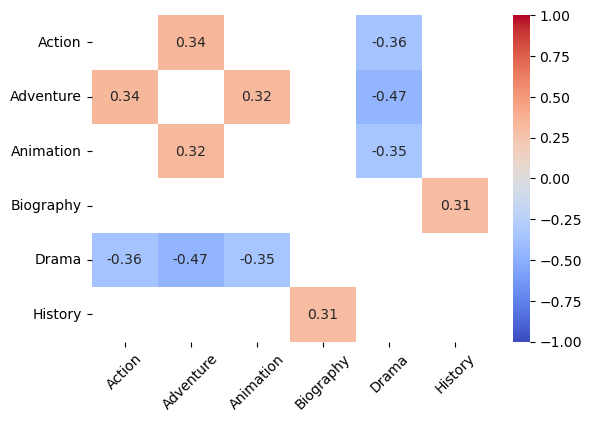

In [63]:
# Used in the 'Breakdown per genre' slide

# This matrix is also referenced by the markdown and table below when looking at outliers
def genre_matrix_table_corrected(cleaned_df):
    cleaned_df = cleaned_df[cleaned_df['Gross'] != 0]
    genre_matrix = cleaned_df['Genre'].str.get_dummies(sep = ', ')
    genre_correlation_matrix = genre_matrix.corr()
    np.fill_diagonal(genre_correlation_matrix.values, np.nan)
    genre_correlation_matrix = genre_correlation_matrix[(genre_correlation_matrix.round(2) >= 0.3) | (genre_correlation_matrix.round(2) <= -0.3)]
    genre_correlation_matrix = genre_correlation_matrix.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'all')
    return genre_correlation_matrix

genre_matrix_output_corrected = genre_matrix_table_corrected(cleaned_df)
genre_matrix_output_corrected

# Creating a heatmap based on the output of the previous function
# It is the same heatmap as the one above, but it's corrected for nulls in the Gross column
def genre_matrix_heatmap_corrected(genre_matrix_output_corrected):
    sns.heatmap(genre_matrix_output_corrected, 
                annot = True, 
                fmt = '.2f', 
                cmap = 'coolwarm', 
                vmin = -1, 
                vmax = 1)
    plt.subplots_adjust(bottom = 0.2)
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 0)
    fig = plt.gcf()
    return fig

genre_matrix_table_cleaned_corrected = pn.pane.Matplotlib(genre_matrix_heatmap_corrected(genre_matrix_output_corrected), width = 600)

In [64]:
# Used in the 'Breakdown per genre' slide
# This table is referenced by the markdown below

# Creating an aggregated table of genre pairings; used the join below
def genre_breakdown_outliers(cleaned_df, genre_matrix_output_corrected):
    genre_melt = pd.melt(genre_matrix_output_corrected.reset_index(), id_vars = ['index'], value_vars = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'History']).dropna()
    genre_melt['genre_list'] = genre_melt.apply(lambda x: [x['index'], x['variable']], axis = 1).tolist()
    genre_melt['genre_list'] = genre_melt['genre_list'].apply(lambda x: sorted(x))
    genre_melt['join_key'] = 1
    
    df_genre_outliers = cleaned_df.copy()
    df_genre_outliers = df_genre_outliers[df_genre_outliers['Gross'] != 0]
    df_genre_outliers['genre_list'] = df_genre_outliers['Genre'].str.split(', ').tolist() #Creating a list out of the Genre column
    
    df_genre_outliers2 = df_genre_outliers['genre_list'].apply(pd.Series)
    df_genre_outliers2.rename(columns = {0:'genre_1', 1:'genre_2', 2:'genre_3'}, inplace = True)
    df_genre_outliers = pd.concat([df_genre_outliers, df_genre_outliers2], axis = 1)
    
    df_genre_outliers['join_key'] = 1
    df_genre_outliers = df_genre_outliers.merge(genre_melt, on = 'join_key', suffixes = ['', '_melt'], how = 'outer')
    df_genre_outliers = (df_genre_outliers[(((df_genre_outliers['index'] == df_genre_outliers['genre_1']) |
                                          (df_genre_outliers['index'] == df_genre_outliers['genre_2']) | 
                                          (df_genre_outliers['index'] == df_genre_outliers['genre_3'])
                                          ) &
                                          ((df_genre_outliers['variable'] == df_genre_outliers['genre_1']) |
                                          (df_genre_outliers['variable'] == df_genre_outliers['genre_2']) | 
                                          (df_genre_outliers['variable'] == df_genre_outliers['genre_3'])
                                          ))]
                        )

    df_genre_outliers['genre_list_melt'] = df_genre_outliers['genre_list_melt'].astype(str) # Turning the 'genre_list_melt' column into a string to be able to use it with a .groupby()
    df_genre_outliers = df_genre_outliers[['Series_Title', 'Genre', 'IMDB_Rating', 'Overview', 'No_of_Votes', 'Gross_in_MM', 'genre_list_melt']].drop_duplicates() # Remove duplicates caused by the join
    df_genre_outliers_columns = (df_genre_outliers.groupby('genre_list_melt')
                                                            .agg({'IMDB_Rating':'mean',
                                                                  'No_of_Votes':'mean',
                                                                  'Gross_in_MM':'mean',
                                                                  'Series_Title':'nunique'})
                                                           .rename(columns = {
                                                               'IMDB_Rating':'AVG IMDb Rating',
                                                               'No_of_Votes':'AVG No of Votes',
                                                               'Gross_in_MM':'AVG Gross in MM',
                                                               'Series_Title':'Movie Count'})
                               ).reset_index()
    
    df_genre_outliers_columns['genre_list_melt'] = df_genre_outliers_columns['genre_list_melt'].str.replace(r"[\[\]'']", '', regex = True) # Removing the brackets and single quotes
    df_genre_outliers_columns['genre_list_melt'] = df_genre_outliers_columns['genre_list_melt'].str.split(', ').tolist() # Turning the values of the 'genre_list_melt' column back into a list
    
    df_genre_outliers_columns2 = df_genre_outliers_columns['genre_list_melt'].apply(pd.Series) # Turning the values of the 'genre_list_melt' list into separate columns
    df_genre_outliers_columns2.rename(columns = {0:'genre_1', 1:'genre_2'}, inplace = True) # Renaming the newly created columns
    df_genre_outliers_columns = pd.concat([df_genre_outliers_columns, df_genre_outliers_columns2], axis = 1).drop(['genre_list_melt'], axis = 1) # Concatenating the table with the columns based on their index number
    
    return df_genre_outliers_columns

genre_breakdown_outliers_pre = genre_breakdown_outliers(cleaned_df, genre_matrix_output_corrected)


# Creating an aggregated table of genre pairings; used the join below
def genre_matrix_list(genre_matrix_output_corrected):
    genre_melt = pd.melt(genre_matrix_output_corrected.reset_index(), id_vars = ['index'], value_vars = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'History'])
    genre_melt['genre_list'] = genre_melt.apply(lambda x: [x['index'], x['variable']], axis = 1).tolist()
    genre_melt = genre_melt.dropna()
    genre_melt['genre_list'] = genre_melt['genre_list'].apply(lambda x: sorted(x))
    genre_melt = genre_melt[['value', 'genre_list']]
    genre_melt_columns = genre_melt['genre_list'].apply(pd.Series)
    genre_melt_columns.rename(columns = {0:'genre_1', 1:'genre_2'}, inplace = True)
    genre_melt_combined = pd.concat([genre_melt['value'], genre_melt_columns], axis = 1)
    return genre_melt_combined

genre_matrix_list_pre = genre_matrix_list(genre_matrix_output_corrected)



# Creating a table (through a join) on the outliers in the smaller heatmap
def merge_genre_outliers(genre_breakdown_outliers_pre, genre_matrix_list_pre):
    df = genre_breakdown_outliers_pre.merge(genre_matrix_list_pre, left_on = ['genre_1', 'genre_2'], right_on = ['genre_1', 'genre_2'], how = 'left')
    df = df.drop_duplicates().dropna()
    df['Genre Pairing'] = df['genre_1'] + ' - ' + df['genre_2']
    df['AVG IMDb Rating'] = df['AVG IMDb Rating'].round(1)
    df['AVG No of Votes'] = df['AVG No of Votes'].astype(int)
    df['AVG Gross in MM'] = df['AVG Gross in MM'].round(2)
    df['value'] = df['value'].round(2)
    df = df.rename(columns = {'value':'Correlation'})
    df = df[['Genre Pairing', 'Correlation', 'Movie Count', 'AVG IMDb Rating', 'AVG No of Votes', 'AVG Gross in MM']]
    df = df.sort_values(by = 'Correlation', ascending = False).reset_index(drop = True)
    df.index = df.index + 1
    return df

merge_genre_outliers_table = merge_genre_outliers(genre_breakdown_outliers_pre, genre_matrix_list_pre)
merge_genre_outliers_table

,Genre Pairing,Correlation,Movie Count,AVG IMDb Rating,AVG No of Votes,AVG Gross in MM
1,Action - Adventure,0.34,76,8.0,603797,226.84
2,Adventure - Animation,0.32,43,8.0,401406,178.36
3,Biography - History,0.31,23,8.0,286452,55.33
4,Animation - Drama,-0.35,13,7.9,145129,40.65
5,Action - Drama,-0.36,59,8.0,421136,92.00
6,Adventure - Drama,-0.47,52,8.0,413466,104.08


In [65]:
# Used in the 'Breakdown per genre' slide


# Retrieving various values used in the markdown below
adventure_animation_name = merge_genre_outliers_table.iloc[1, 0]
adventure_animation_value = merge_genre_outliers_table.iloc[1, 2]
adventure_animation_corr = merge_genre_outliers_table.iloc[1, 1]

adventure_drama_name = merge_genre_outliers_table.iloc[5, 0]
adventure_drama_value = merge_genre_outliers_table.iloc[5, 2]
adventure_drama_corr = merge_genre_outliers_table.iloc[5, 1]


# Creating a markdown for the compact heatmap and table below
genre_print6 = pn.pane.Markdown("""


Similar to the previous table, the table above is sorted based on how likely a movie genre pairing is, with the most likely pairing on top (highest r) and the least likely pairing on the bottom (lowest r). 
- Looking at the table above, it seems that the least likely genre pairing, *{}*, is not the pairing with the lowest average gross revenue. It actually has a higher average gross revenue than most of the more likely genre pairings above it. 
    - This suggests that financial outcome isn't the only factor to dictate likelihood of a genre pairing. One can image that it is a complex interplay of many factors, like artistic preferences, audience tastes and financial incentives.
- Another interesting observation (in both the first and second table) is that the movie count of the two genre pairings at the bottom is higher than some of the other genre pairings above them. 
    - For example, in the bottom table, when we compare the genre pairings *{}* (2nd place) with *{}* (6th place), the former pairing has a lower movie count ({} vs. {}) but is more likely to happen than the latter pairing (r = {} vs. r = {}). 
    - The reason for this is that the likeliness of two movie genres being paired doesn't equate movie count. It's possible to have a high correlation with a low movie count, and conversely, a low correlation with a high movie count. 
    - In our example, the pairing {} is less common (movie count of {}) compared to the pairing {} (movie count of {}), but when the pairing does happen, it happens more consistently than the {} pairing. 


"""
.format(adventure_drama_name,
adventure_animation_name,
adventure_drama_name,
adventure_animation_value,
adventure_drama_value,
adventure_animation_corr,
adventure_drama_corr,
adventure_animation_name,
adventure_animation_value,
adventure_drama_name,
adventure_drama_value,
adventure_drama_name)
)

genre_print6




Markdown(str)

## What are the highest rated movies?

In [66]:
# Used in the 'What are the highest rated movies?' slide

# Creating a markdown for the intro to the slide
highest_rated_intro_1 = pn.pane.Markdown("""

IMDb has become such a staple in the world of cinema that for many people it has become a trusted source in deciding whether or not watching a certain movie is worth their time. At the moment of writing (May 2024), <a href="https://imdb.com" target="_blank">IMDb.com</a> has been the 44th most visited website on the internet in March 2024, according to <a href="https://www.semrush.com/website/imdb.com/overview/" target="_blank">Semrush</a>. Such popularity comes with great power. A great quote to illustrate this is what the Financial Times had to say about IMDb:

>*"IMDb is one of the world’s most popular websites and functions as Hollywood’s memory. And that means IMDb has great power."* – <a href="https://www.imdb.com/pressroom/press-pull-quotes/" target="_blank">The Financial Times</a>

The importance of <a href="https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV" target="_blank">IMDb ratings</a>, therefore, shouldn't be understated. They not only reflect the opinions of large numbers of users, they might even influence movies' perception and success. This is why it's important to also have a different rating system included in our dataset: <a href="https://www.metacritic.com/about-us" target="_blank">Metascore</a> (a.k.a. Metacritic Score). The main difference between these rating systems is that IMDb ratings is based on individual user votes, while Metascores are, supposedly, the weighted average ratings of movies based on movie critics' scores. IMDb mentions the following about it on their <a href="https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV" target="_blank">website</a>:

>*When available, IMDb title pages also include a Metacritic Score for a title, as well as user reviews and links to professional critic reviews from newspapers, magazines and other publications. We aim to offer a variety of opinions on a title so users can make informed viewing decisions."*

In this part of the EDA, we will be taking a look at the highest ranking movies based on their ratings. We will take a look at the top 10 movies based on their IMDb ratings first, and then we will do the same based on their Metascore ratings. 


""")

highest_rated_intro_1 

Markdown(str)

In [67]:
# Used in the 'What are the highest rated movies?' slide
# Is referenced by several bar charts and markdowns below

# Creating a table of the 10 highest rated movies (IMDb rating).
def highest_rated_table_imdb(cleaned_df):
    df_imdb_rating = cleaned_df
    df_imdb_rating = df_imdb_rating.sort_values(['IMDB_Rating', 'No_of_Votes'], ascending = [False, False])
    df_imdb_rating['IMDB_Rating_rank'] = 1
    df_imdb_rating['IMDB_Rating_rank'] = df_imdb_rating['IMDB_Rating_rank'].cumsum()
    df_imdb_rating = df_imdb_rating[df_imdb_rating['IMDB_Rating_rank'] <= 10][['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Meta_score', 'Gross_in_MM', 'Released_Year']]
    df_imdb_rating['Meta_score'] = df_imdb_rating['Meta_score'].astype(int)
    df_imdb_rating['Gross_in_MM'] = df_imdb_rating['Gross_in_MM'].round(1)
    df_imdb_rating = df_imdb_rating.rename(columns = {'Series_Title': 'Movie',
                                                      'No_of_Votes':'No of Votes',
                                                     'IMDB_Rating':'IMDb Rating',
                                                     'Meta_score':'Metascore',
                                                     'Gross_in_MM':'Gross in MM',
                                                     'Released_Year':'Release Year'})
    df_imdb_index_reset = df_imdb_rating.reset_index(drop=True)
    df_imdb_rating.index = df_imdb_index_reset.index + 1 
    return df_imdb_rating

df_imdb_rating = highest_rated_table_imdb(cleaned_df)

df_imdb_rating

,Movie,IMDb Rating,No of Votes,Metascore,Gross in MM,Release Year
1,The Shawshank Redemption,9.3,2343110,80,28.3,1994
2,The Godfather,9.2,1620367,100,135.0,1972
3,The Dark Knight,9.0,2303232,84,534.9,2008
4,The Godfather: Part II,9.0,1129952,90,57.3,1974
5,12 Angry Men,9.0,689845,96,4.4,1957
6,Pulp Fiction,8.9,1826188,94,107.9,1994
7,The Lord of the Rings: The Return of the King,8.9,1642758,94,377.8,2003
8,Schindler's List,8.9,1213505,94,96.9,1993
9,Inception,8.8,2067042,74,292.6,2010
10,Fight Club,8.8,1854740,66,37.0,1999


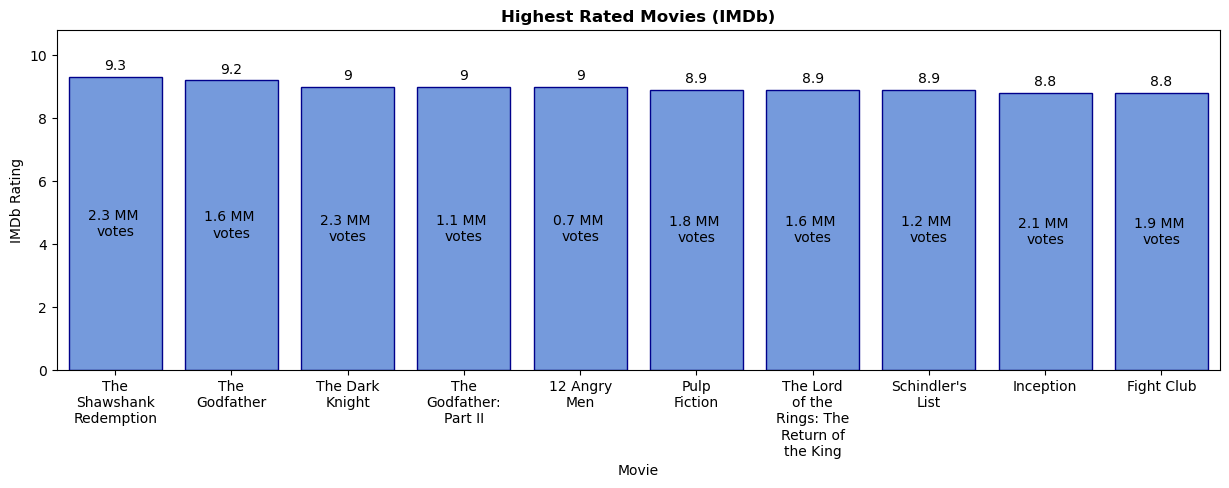

In [68]:
# Used in the 'What are the highest rated movies?' slide

# Creating a bar chart on the highest rated IMDb movies based on the table above
def highest_rated_movies_bar_chart(df_imdb_rating):
    max_imdb_rating = df_imdb_rating['IMDb Rating'].max() + 1.5
    plt.figure(figsize = (15, 5))

    g = sns.barplot(
        x = df_imdb_rating['Movie'],
        y = df_imdb_rating['IMDb Rating'],
        color = 'cornflowerblue',
        edgecolor = 'darkblue'
    )
    
    g.set_ylim(0, max_imdb_rating)
    g.set_title('Highest Rated Movies (IMDb)', weight = 'bold')

    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)

    wrap_labels(g, 10)

    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)

    for bar, votes in zip(g.patches, df_imdb_rating['No of Votes']):
        height = bar.get_height()
        g.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'{round((votes / 1000000), 1)} MM \nvotes',
            ha ='center',
            va ='center'
        )
    plt.subplots_adjust(bottom = 0.2)    
    fig = plt.gcf()
    return fig

highest_rated_movies_bar_chart_pic = pn.pane.Matplotlib(highest_rated_movies_bar_chart(df_imdb_rating), dpi = 144, width = 1280, align = 'center')

In [69]:
# Used in the 'What are the highest rated movies?' slide
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values used in the markdown below
highest_rated_shawshank_name = df_imdb_rating.iloc[0, 0]
highest_rated_shawshank_imdb_rating = df_imdb_rating.iloc[0, 1]
highest_rated_shawshank_metascore = df_imdb_rating.iloc[0, 3]
highest_rated_shawshank_votes = df_imdb_rating.iloc[0, 2]
highest_rated_shawshank_revenue = df_imdb_rating.iloc[0, 4]

highest_rated_godfather1_name = df_imdb_rating.iloc[1, 0]
highest_rated_godfather1_imdb_rating = df_imdb_rating.iloc[1, 2]
highest_rated_godfather1_metascore = df_imdb_rating.iloc[1, 3]

highest_rated_godfather2_name = df_imdb_rating.iloc[3, 0]
highest_rated_godfather2_imdb_rating = df_imdb_rating.iloc[3, 2]

highest_rated_pulp_fiction_name = df_imdb_rating.iloc[5, 0]
highest_rated_pulp_fiction_year = df_imdb_rating.iloc[5, 5]
highest_rated_pulp_fiction_revenue = df_imdb_rating.iloc[5, 4]

highest_rated_dark_knight_name = df_imdb_rating.iloc[2, 0]

highest_rated_LOTR_name = df_imdb_rating.iloc[6, 0]

highest_rated_12_angry_men_name = df_imdb_rating.iloc[4, 0]
highest_rated_12_angry_men_revenue = df_imdb_rating.iloc[4, 4]

highest_rated_inception_name = df_imdb_rating.iloc[8, 0]
highest_rated_inception_revenue = df_imdb_rating.iloc[8, 4]
highest_rated_inception_metascore = df_imdb_rating.iloc[8, 3]

highest_rated_fightclub_imdb_rating = df_imdb_rating.iloc[9, 1]
highest_rated_fightclub_name = df_imdb_rating.iloc[9, 0]


# Creating a markdown for the bar chart above and the one below
highest_rated_top10_imdb_markdown = pn.pane.Markdown("""
The bar chart above gives us the top 10 movies based on the highest IMBb ratings in our dataset, with the movies with the highest rating to the left and the lowest rating to the right. In case of a tie, the (non-rounded) number of votes will be the tie-breaker and determine the order of appearance. For your convenience, the number of votes (rounded per million votes) are shown on the bars. The accompanying table below the bar chart gives us additional information regarding the movies in the top 10.

- When we look at the bar chart, we see that the movie *{}* occupies first place in the top 10 (and therefore the entire dataset). 
- Amazingly, given its IMDb rating of {}, it not only stands out by being the most highly IMDb rated movie, with an accumulated {} votes it also boasts the highest amount of user votes out of all the movies in this top 10. 
- However, with a Metascore of {} out of 100, the movie does seem to lag in Metascore. This indicates that it wasn't as critically acclaimed as one would expect. 
- Seeing as it has earned a gross revenue of USD {} million, it also very much lacks in gross revenue compared to other movies in this top 10, despite some these movies having been released in the same year or earlier.
    - For example, the movie *{}* was also released in {}, yet it has accumulated a gross revenue of USD {} million.

Other interesting observations:
- Both *{}* and *{}* have made it into the top 10, which is a very impressive accomplishment.
- {} is the only movie in this top 10 which has earned a perfect {} out of 100 Metascore.
- {} is not the only sequel in this top 10, as *{}* is also a sequel. It is the second installment in The Dark Knight trilogy. *{}* is a threequel, being the third installment of The Lord of the Rings trilogy.
- Out of all the movies in this top 10, with a gross revenue of USD {} million, the movie *{}* has the lowest gross revenue by far. It being an older movie very likely plays a big part in this.
- *{}* has earned the third highest gross revenue (USD {} million) out of all 10 movies in this list, but with a Metascore of {} it has earned the second-lowest Metascore.

Below, we will take a look at the top 10 highest Metascore ratings in our dataset and see how it differs from our IMDb rating top 10.

"""

.format(highest_rated_shawshank_name,
        highest_rated_shawshank_imdb_rating,
        highest_rated_shawshank_votes,
        highest_rated_shawshank_metascore,
        highest_rated_shawshank_revenue,
        highest_rated_pulp_fiction_name,
        highest_rated_pulp_fiction_year,
        highest_rated_pulp_fiction_revenue,
        
        highest_rated_godfather1_name,
        highest_rated_godfather2_name,
        highest_rated_godfather1_name,
        highest_rated_godfather1_metascore,
        highest_rated_godfather2_name,
        highest_rated_dark_knight_name,
        highest_rated_LOTR_name,
        highest_rated_12_angry_men_revenue,
        highest_rated_12_angry_men_name,
        highest_rated_inception_name,
        highest_rated_inception_revenue,
        highest_rated_inception_metascore,
       )
)

highest_rated_top10_imdb_markdown

Markdown(str)

In [70]:
# Used in the 'What are the highest rated movies?' slide
# Is referenced by the bar chart below

# Creating a table of the 10 highest rated movies (IMDb rating).
def highest_rated_table_metascore(cleaned_df):
    cleaned_df = cleaned_df[cleaned_df['Gross_in_MM'] != 0]
    metascore_rating = cleaned_df.sort_values(['Meta_score', 'IMDB_Rating'], ascending = [False, False])
    metascore_rating['Metascore_rank'] = 1
    metascore_rating['Metascore_rank'] = metascore_rating['Metascore_rank'].cumsum()
    metascore_rating = metascore_rating[metascore_rating['Metascore_rank'] <= 10][['Series_Title', 'Meta_score', 'IMDB_Rating', 'No_of_Votes',  'Gross_in_MM', 'Released_Year']]
    metascore_rating['Gross_in_MM'] = metascore_rating['Gross_in_MM'].round(1)
    metascore_rating['Meta_score'] = metascore_rating['Meta_score'].astype(int)
    metascore_rating = metascore_rating.rename(columns = {'Series_Title': 'Movie',
                                                          'No_of_Votes':'No of Votes',
                                                          'IMDB_Rating':'IMDb Rating',
                                                          'Meta_score':'Metascore',
                                                          'Gross_in_MM':'Gross in MM',
                                                          'Released_Year':'Release Year'})
    metascore_rating_index_reset = metascore_rating.reset_index(drop = True)
    metascore_rating.index = metascore_rating_index_reset.index + 1 
    return metascore_rating

df_metascore_rating = highest_rated_table_metascore(cleaned_df)

df_metascore_rating

,Movie,Metascore,IMDb Rating,No of Votes,Gross in MM,Release Year
1,The Godfather,100,9.2,1620367,135.0,1972
2,Casablanca,100,8.5,522093,1.0,1942
3,Rear Window,100,8.4,444074,36.8,1954
4,Lawrence of Arabia,100,8.3,268085,44.8,1962
5,Vertigo,100,8.3,364368,3.2,1958
6,Citizen Kane,100,8.3,403351,1.6,1941
7,Trois couleurs: Rouge,100,8.1,90729,4.0,1994
8,Fanny och Alexander,100,8.1,57784,5.0,1982
9,Il conformista,100,8.0,27067,0.5,1970
10,Boyhood,100,7.9,335533,25.4,2014


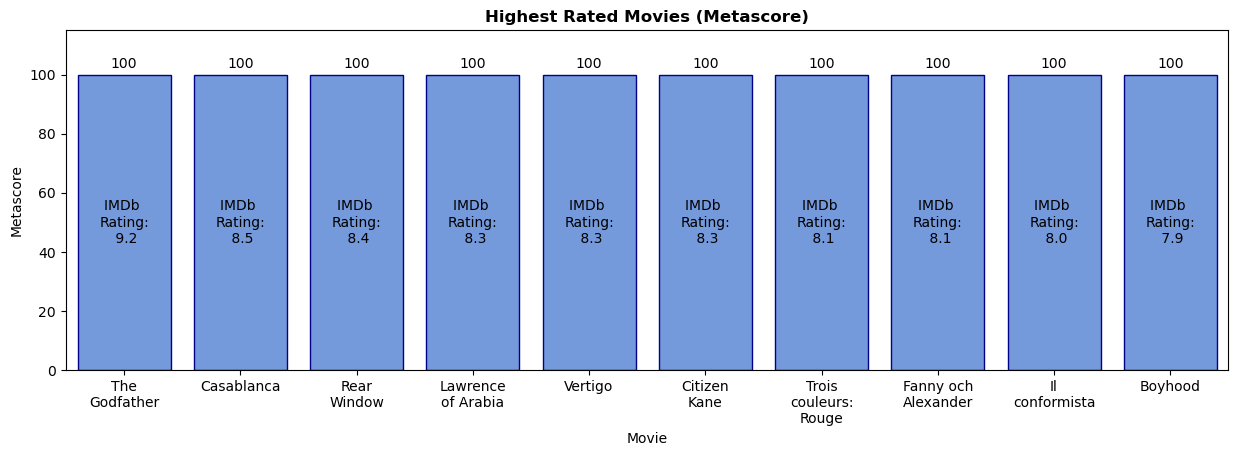

In [71]:
# Used in the 'What are the highest rated movies?' slide

# Creating a bar chart on the movies with the highest Metascore based on the table above
def highest_metascore_movies_bar_chart(df_metascore_rating):
    max_metascore_rating = df_metascore_rating['Metascore'].max() + 15
    plt.figure(figsize = (15, 5))

    g = sns.barplot(
        x = df_metascore_rating['Movie'],
        y = df_metascore_rating['Metascore'],
        color = 'cornflowerblue',
        edgecolor = 'darkblue'
    )
    
    g.set_ylim(0, max_metascore_rating)
    g.set_title('Highest Rated Movies (Metascore)', weight = 'bold')

    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)

    wrap_labels(g, 10)

    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)

    for bar, rating in zip(g.patches, df_metascore_rating['IMDb Rating']):
        height = bar.get_height()
        g.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'IMDb \nRating:\n {round(rating, 1)}',
            ha ='center',
            va ='center'
        )
    plt.subplots_adjust(bottom = 0.2)    
    fig = plt.gcf()
    return fig

highest_metascore_movies_bar_chart_pic = pn.pane.Matplotlib(highest_metascore_movies_bar_chart(df_metascore_rating), dpi = 144, width = 1280, align = 'center')

In [72]:
# Is referenced by the bar chart below

# Creating a table of the 10 highest rated movies (IMDb rating).
def highest_rated_table_metascore_uncorr(cleaned_df):
    metascore_rating = cleaned_df.sort_values(['Meta_score', 'IMDB_Rating', 'Series_Title'], ascending = [False, False, True])
    metascore_rating['Metascore_rank'] = 1
    metascore_rating['Metascore_rank'] = metascore_rating['Metascore_rank'].cumsum()
    metascore_rating = metascore_rating[metascore_rating['Metascore_rank'] <= 10][['Series_Title', 'Meta_score', 'IMDB_Rating', 'No_of_Votes',  'Gross_in_MM', 'Released_Year']]
    metascore_rating['Gross_in_MM'] = metascore_rating['Gross_in_MM'].round(1)
    metascore_rating['Meta_score'] = metascore_rating['Meta_score'].astype(int)
    metascore_rating = metascore_rating.rename(columns = {'Series_Title': 'Movie',
                                                          'No_of_Votes':'No of Votes',
                                                          'IMDB_Rating':'IMDb Rating',
                                                          'Meta_score':'Metascore',
                                                          'Gross_in_MM':'Gross in MM',
                                                          'Released_Year':'Release Year'})
    metascore_rating_index_reset = metascore_rating.reset_index(drop = True)
    metascore_rating.index = metascore_rating_index_reset.index + 1 
    return metascore_rating

df_metascore_rating_uncorr = highest_rated_table_metascore_uncorr(cleaned_df)

df_metascore_rating_uncorr

,Movie,Metascore,IMDb Rating,No of Votes,Gross in MM,Release Year
1,The Godfather,100,9.2,1620367,135.0,1972
2,Casablanca,100,8.5,522093,1.0,1942
3,Rear Window,100,8.4,444074,36.8,1954
4,Citizen Kane,100,8.3,403351,1.6,1941
5,Lawrence of Arabia,100,8.3,268085,44.8,1962
6,Vertigo,100,8.3,364368,3.2,1958
7,Fanny och Alexander,100,8.1,57784,5.0,1982
8,Trois couleurs: Rouge,100,8.1,90729,4.0,1994
9,Il conformista,100,8.0,27067,0.5,1970
10,Sweet Smell of Success,100,8.0,28137,0.0,1957


In [73]:
# Is referenced by the markdown below
def highest_rated_metascore_correlation(cleaned_df):
    cleaned_df = cleaned_df[(cleaned_df['Gross'] != 0) & (cleaned_df['Meta_score'].notna())]
    cleaned_df = cleaned_df[['Released_Year', 'Gross', 'No_of_Votes']]
    cleaned_df = cleaned_df.corr()
    return cleaned_df

highest_rated_metascore_correlation_matrix = highest_rated_metascore_correlation(cleaned_df)
highest_rated_metascore_correlation_matrix

,Released_Year,Gross,No_of_Votes
Released_Year,1.000000,0.235827,0.203311
Gross,0.235827,1.000000,0.555461
No_of_Votes,0.203311,0.555461,1.000000


In [74]:
# Used in the 'What are the highest rated movies?' slide
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values used in the markdown below
highest_rated_metascore_max_score = df_metascore_rating['Metascore'].max()

highest_rated_metascore_perfect_score = cleaned_df[cleaned_df['Meta_score'] == 100]
highest_rated_metascore_perfect_score = highest_rated_metascore_perfect_score.shape[0]

highest_rated_metascore_boyhood_name = df_metascore_rating.iloc[9, 0]
highest_rated_metascore_boyhood_imdb = df_metascore_rating.iloc[9, 2]
highest_rated_metascore_boyhood_year = df_metascore_rating.iloc[9, 5]
highest_rated_metascore_ilconformista_name = df_metascore_rating.iloc[8, 0]
highest_rated_metascore_ilconformista_votes = df_metascore_rating.iloc[8, 3]
highest_rated_metascore_ilconformista_gross = df_metascore_rating.iloc[8, 4]

highest_rated_metascore_troiscouleurs_name = df_metascore_rating.iloc[6, 0]
highest_rated_metascore_fanny_name = df_metascore_rating.iloc[7, 0]

highest_rated_metascore_casablanca_name = df_metascore_rating.iloc[1, 0]
highest_rated_metascore_casablanca_gross = df_metascore_rating.iloc[1, 4]
highest_rated_metascore_casablanca_votes = df_metascore_rating.iloc[1, 3]

highest_rated_metascore_godfather_name = df_metascore_rating.iloc[0, 0]
highest_rated_metascore_godfather_votes = df_metascore_rating.iloc[0, 3]
highest_rated_metascore_godfather_imdb = df_metascore_rating.iloc[0, 2]
highest_rated_metascore_godfather_gross = df_metascore_rating.iloc[0, 4]
highest_rated_metascore_gross_avg = df_metascore_rating['Gross in MM'].mean()
highest_rated_imdb_gross_avg = df_imdb_rating['Gross in MM'].mean().round(2)
highest_rated_metascore_release_year_avg = df_metascore_rating['Release Year'].astype(int).mean().round(0).astype(int)

highest_rated_metascore_release_year_mean = df_metascore_rating['Release Year'].astype(int).mean().round(0).astype(int)
highest_rated_metascore_release_year_median = df_metascore_rating.sort_values(by = 'Release Year')
highest_rated_metascore_release_year_median = highest_rated_metascore_release_year_median['Release Year'].median().astype(int)

highest_rated_imdb_release_year_mean = df_imdb_rating['Release Year'].astype(int).mean().astype(int)
highest_rated_imdb_release_year_median = df_imdb_rating.sort_values(by = 'Release Year')
highest_rated_imdb_release_year_median = highest_rated_imdb_release_year_median['Release Year'].median().astype(int)

highest_rated_metascore_votes = df_metascore_rating['No of Votes'].mean().astype(int)
highest_rated_imdb_votes = df_imdb_rating['No of Votes'].mean().astype(int)

highest_rated_corr_year_gross = highest_rated_metascore_correlation_matrix.iloc[1, 0].round(2)
highest_rated_corr_year_votes = highest_rated_metascore_correlation_matrix.iloc[2, 0].round(2)
highest_rated_corr_gross_votes = highest_rated_metascore_correlation_matrix.iloc[2, 1].round(2)

highest_rated_metascore_metascore_column = df_metascore_rating.columns[1]
highest_rated_metascore_imdb_column = df_metascore_rating.columns[2]
highest_rated_metascore_votes_column = df_metascore_rating.columns[3]
highest_rated_metascore_gross_column = df_metascore_rating.columns[4]
highest_rated_metascore_year_column = df_metascore_rating.columns[5]

highest_rated_metascore_sweet_name = df_metascore_rating_uncorr.iloc[9, 0]
highest_rated_metascore_sweet_metascore = df_metascore_rating_uncorr.iloc[9, 1]
highest_rated_metascore_sweet_imdb = df_metascore_rating_uncorr.iloc[9, 2]
highest_rated_metascore_sweet_votes = df_metascore_rating_uncorr.iloc[9, 3]
highest_rated_metascore_sweet_gross = df_metascore_rating_uncorr.iloc[9, 4]
highest_rated_metascore_sweet_year = df_metascore_rating_uncorr.iloc[9, 5]



# Creating a markdown for the bar chart above and the one below
highest_rated_top10_metascore_markdown = pn.pane.Markdown("""
The bar chart and table above show us the top 10 movies based on the their Metascores. A quick glance reveals that all of the movies in this top 10 have a perfect Metascore of {} out of 100. (Out of the 1000 movies in our dataset, {} movies have managed to achieve a Metascore of {}.) Seeing as all of the movies are tied based on their Metascores, their respective IMDb ratings and their movie titles (respectively) will be the tie-breakers to determine the order of appearance.

- All movies in this list have been release before the year 2000, save for one: *{}*, which was released in {}.
- The number of votes vary wildly in this top 10, with {} votes for the movie *{}* being the lowest and {} votes for *{}* being the highest. Their gross revenue are the lowest and highest of the top 10 as well, being USD {} million and USD {} million respectively.
- Three movies in this top 10 have not accumulated more than 100k votes: *{}*, *{}* and the aforementioned {}. 
- {} is the only movie in this top 10 which has accumulated more than a million votes.
- Although *{}* has earned the second lowest gross revenue (USD {} million) of this top 10, it has still earned a respectable {} number of votes on IMDb, which is the third highest of this top 10.

When we compare the top 10 movies based on IMDb rating to the top 10 movies based on Metascore, the following points stand out:

- Out of the top 10 movies with the highest IMDb ratings, only one movie seems to have made it into the top 10 movies with the highest Metascores: *{}*. 
- The gross revenues of the movies in the Metascore top 10 seem to be quite a bit lower compared to those in the IMDb ratings top 10, with the average gross revenue in the Metascore top 10 being USD {} million per movie, compared to USD {} million per movie in the IMDb top 10.
- Overall, the movies in the Metascore top 10 seem to be quite a bit older than those in the IMDb top 10. The average release year of the Metascore top 10 is {}, with a median year of {}. The IMDb top 10, on the other hand, has an average release year of {}, with a median year of {}.
- There also seems to be a substantial difference in the average amount of votes per movie between both top 10s. The Metascore top 10 averages {} votes per movie, while the IMDb top 10 has an average of {} votes per movie.
- Although the average revenue, release year, and number of votes per movie are all lower in the Metascore top 10, aside from the *Gross - No of Votes* column pairing (see the Correlation slide), the correlation coefficients between these columns aren't substantial:
    - *Release Year - Gross*: {}
    - *Release Year - No of Votes*: {}
    - *Gross - No of Votes*: {}

**Note**: the Metascore top 10 bar chart and accompanying table above have been corrected for missing values in the *{}* and *{}* columns. This caused the movie *{}* to be replaced by the movie *{}*. The former movie has a {} of {}, an {} of {}, {} {}, and a {} of {}.

"""

.format(highest_rated_metascore_max_score,
        highest_rated_metascore_perfect_score,
        highest_rated_metascore_max_score,
        
        # Bullet points of the first table
        highest_rated_metascore_boyhood_name,
        highest_rated_metascore_boyhood_year,
        
        highest_rated_metascore_ilconformista_votes,
        highest_rated_metascore_ilconformista_name,
        highest_rated_metascore_godfather_votes,
        highest_rated_metascore_godfather_name,
        
        highest_rated_metascore_ilconformista_gross,
        highest_rated_metascore_godfather_gross,        

        highest_rated_metascore_troiscouleurs_name,
        highest_rated_metascore_fanny_name,
        highest_rated_metascore_ilconformista_name,
        highest_rated_metascore_godfather_name,
        
        highest_rated_metascore_casablanca_name,
        highest_rated_metascore_casablanca_gross,
        highest_rated_metascore_casablanca_votes,
        
        # Comparing the two tables
        highest_rated_metascore_godfather_name,
        highest_rated_metascore_gross_avg,
        highest_rated_imdb_gross_avg,
        highest_rated_metascore_release_year_mean,
        highest_rated_metascore_release_year_median,
        highest_rated_imdb_release_year_mean,
        highest_rated_imdb_release_year_median,
        highest_rated_metascore_votes,
        highest_rated_imdb_votes,
        highest_rated_corr_year_gross,
        highest_rated_corr_year_votes,
        highest_rated_corr_gross_votes,
        highest_rated_metascore_metascore_column,
        highest_rated_metascore_gross_column,
        highest_rated_metascore_sweet_name,
        highest_rated_metascore_boyhood_name,
        highest_rated_metascore_metascore_column,
        highest_rated_metascore_sweet_metascore,
        highest_rated_metascore_imdb_column,
        highest_rated_metascore_sweet_imdb,
        highest_rated_metascore_sweet_votes,
        highest_rated_metascore_votes_column,
        highest_rated_metascore_year_column,
        highest_rated_metascore_sweet_year,
        highest_rated_metascore_boyhood_name
       )
)

highest_rated_top10_metascore_markdown

Markdown(str)

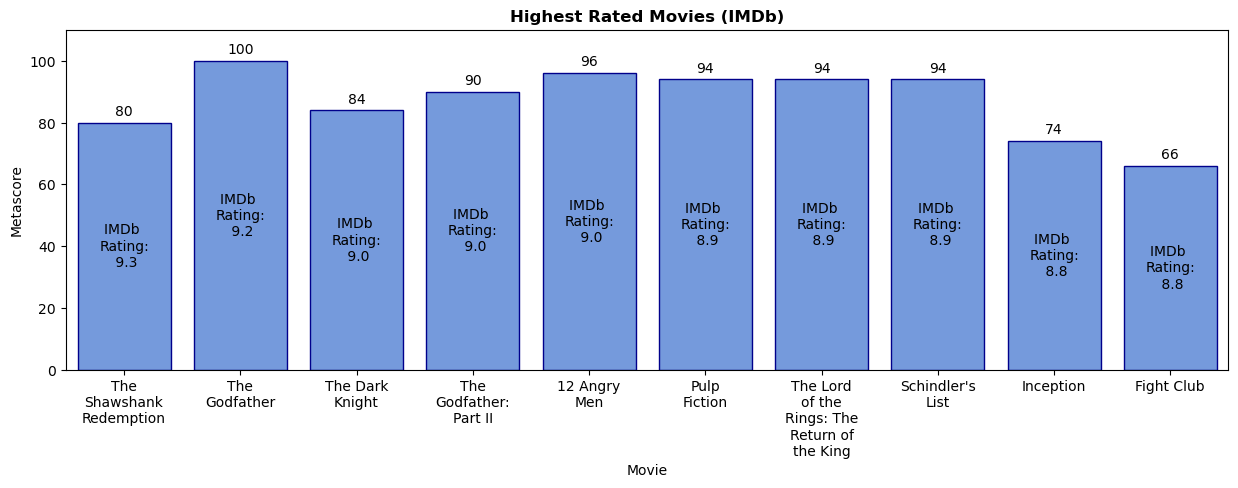

In [75]:
# Used in the 'What are the highest rated movies?' slide

# Creating a bar chart based on the table above
def highest_rated_movies_bar_chart_imdb_meta(df_imdb_rating):
    max_meta_score = df_imdb_rating['Metascore'].max() + 10
    plt.figure(figsize = (15, 5))

    g = sns.barplot(
        x = df_imdb_rating['Movie'],
        y = df_imdb_rating['Metascore'],
        color = 'cornflowerblue',
        edgecolor = 'darkblue'
    )
    
    g.set_ylim(0, max_meta_score)
    g.set_title('Highest Rated Movies (IMDb)', weight = 'bold')

    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)

    wrap_labels(g, 10)

    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
    
    
    for bar, rating in zip(g.patches, df_imdb_rating['IMDb Rating']):
        height = bar.get_height()
        g.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'IMDb \nRating:\n {round(rating, 1)}',
        ha ='center',
        va ='center'
    )
    
    plt.subplots_adjust(bottom = 0.2)
    fig = plt.gcf()
    return fig

highest_rated_movies_imdb_metascore = pn.pane.Matplotlib(highest_rated_movies_bar_chart_imdb_meta(df_imdb_rating), dpi = 144, width = 1280, align = 'center')

In [76]:
# Used in the 'What are the highest rated movies?' slide

def metascore_scorecard(df_imdb_rating):
    df_imdb_rating = df_imdb_rating[['Movie', 'IMDb Rating', 'Metascore']].copy()
    df_imdb_rating['Metascore Breakdown'] = np.where((df_imdb_rating['Metascore'] >= 0) & (df_imdb_rating['Metascore'] <= 19), '0-19 points',
                                                     np.where((df_imdb_rating['Metascore'] >= 20) & (df_imdb_rating['Metascore'] <= 39), '20-39 points',
                                                     np.where((df_imdb_rating['Metascore'] >= 40) & (df_imdb_rating['Metascore'] <= 60), '40-60 points',
                                                     np.where((df_imdb_rating['Metascore'] >= 60) & (df_imdb_rating['Metascore'] <= 80), '60-80 points', 
                                                     np.where((df_imdb_rating['Metascore'] >= 81) & (df_imdb_rating['Metascore'] <= 100), '81-100 points', 'Nothing')))))
    df_imdb_rating['Metascore Meaning'] = np.where((df_imdb_rating['Metascore'] >= 0) & (df_imdb_rating['Metascore'] <= 19), 'Overwhelming Dislike',
                                                     np.where((df_imdb_rating['Metascore'] >= 20) & (df_imdb_rating['Metascore'] <= 39), 'Generally Unfavorable Reviews',
                                                     np.where((df_imdb_rating['Metascore'] >= 40) & (df_imdb_rating['Metascore'] <= 60), 'Mixed or Average Reviews',
                                                     np.where((df_imdb_rating['Metascore'] >= 60) & (df_imdb_rating['Metascore'] <= 80), 'Generally Favorable Reviews', 
                                                     np.where((df_imdb_rating['Metascore'] >= 81) & (df_imdb_rating['Metascore'] <= 100), 'Universal Acclaim', 'Nothing')))))
    return df_imdb_rating

metascore_scorecard_table = metascore_scorecard(df_imdb_rating)
metascore_scorecard_table

,Movie,IMDb Rating,Metascore,Metascore Breakdown,Metascore Meaning
1,The Shawshank Redemption,9.3,80,60-80 points,Generally Favorable Reviews
2,The Godfather,9.2,100,81-100 points,Universal Acclaim
3,The Dark Knight,9.0,84,81-100 points,Universal Acclaim
4,The Godfather: Part II,9.0,90,81-100 points,Universal Acclaim
5,12 Angry Men,9.0,96,81-100 points,Universal Acclaim
6,Pulp Fiction,8.9,94,81-100 points,Universal Acclaim
7,The Lord of the Rings: The Return of the King,8.9,94,81-100 points,Universal Acclaim
8,Schindler's List,8.9,94,81-100 points,Universal Acclaim
9,Inception,8.8,74,60-80 points,Generally Favorable Reviews
10,Fight Club,8.8,66,60-80 points,Generally Favorable Reviews


In [77]:
# Used in the 'What are the highest rated movies?' slide


# Retrieving various values used in the markdown below
metascore_scorecard_metascore_breakdown_name = metascore_scorecard_table.columns[3]
metascore_scorecard_metascore_name = metascore_scorecard_table.columns[2]
metascore_scorecard_dark_knight_name = metascore_scorecard_table.iloc[2, 0]
metascore_scorecard_dark_knight_value = metascore_scorecard_table.iloc[2, 2]
metascore_scorecard_dark_knight_category = metascore_scorecard_table.iloc[2, 3]
metascore_scorecard_dark_knight_index = metascore_scorecard_table.index[2]
metascore_scorecard_metascore_meaning_name = metascore_scorecard_table.columns[4]
metascore_scorecard_dark_knight_metascore_meaning = metascore_scorecard_table.iloc[2, 4]
metascore_scorecard_godfather_name = metascore_scorecard_table.iloc[1, 0]
metascore_scorecard_godfather_value = metascore_scorecard_table.iloc[1, 2]

metascore_scorecard_shawshank_name = metascore_scorecard_table.iloc[0, 0]
metascore_scorecard_shawshank_metascore = metascore_scorecard_table.iloc[0, 2]
metascore_scorecard_inception_name = metascore_scorecard_table.iloc[8, 0]
metascore_scorecard_fightclub_name = metascore_scorecard_table.iloc[9, 0]



# Creating a markdown for the bar chart below
metascore_scorecard_markdown = pn.pane.Markdown("""
Another insightful way to show the differences between the IMDb and Metascores rating systems is through showing the Metascores of the top 10 highest IMDb rated movies. The bar chart above shows us the same top 10 movies based on their IMDb ratings, which are shown on the bars. This time, however, the height of the bars is based on their respective Metascores, which are shown as values above the bars. Although we know Metascore is a weighted average score based on the scores of certain movie critics and uses a 0 to 100 scale, it might still feel a little nebulous. For instance, what is considered a reasonably good Metascore rating? 

To clear up the confusion a bit more, we can categorize Metascores according to the scorecard shown on their <a href="https://metacritichelp.zendesk.com/hc/en-us/articles/15456077802647-What-s-with-these-green-yellow-and-red-colors" target="_blank">help center page</a>. This lets us create the table above. Based on their respective Metascores, each movie falls into a certain category, shown in the column *{}*. For example, the movie *{}* has a {} of *{}*, which puts it in the category *{}*. As we can see in the *{}* column, it means that the movie has earned *{}*. This categorization gives us the following insights:

- As we know, the movie *{}* has received the highest IMDb rating in the entire dataset. Surprisingly, it has 'only' received a Metascore of *{}* out of 100. This has cut it out of the *81-100 points* Metascore category by 1 point, which is the highest Metascore category available. It now shares the same Metascore category as the two lowest Metascore rated movies in this top 10, which are the movies *{}* and *{}*.
- Like we previously saw in the top 10 highest IMDb rated movies, *{}* is the only movie in this top 10 with a perfect *{}* out of 100 Metascore.
- Aside from the highest IMDb rated and the two lowest IMDb rated movies, *{}*, which occupies the {}rd place in this top 10, is the only movie which dips below 90 Metascore wise. All other movies score in the 90s.
"""
.format(metascore_scorecard_metascore_breakdown_name,
        metascore_scorecard_dark_knight_name,
        metascore_scorecard_metascore_name,
        metascore_scorecard_dark_knight_value,
        metascore_scorecard_dark_knight_category,
        metascore_scorecard_metascore_meaning_name,
        metascore_scorecard_dark_knight_metascore_meaning,
        metascore_scorecard_shawshank_name,
        metascore_scorecard_shawshank_metascore,
        metascore_scorecard_inception_name,
        metascore_scorecard_fightclub_name,
        metascore_scorecard_godfather_name,
        metascore_scorecard_godfather_value,
        metascore_scorecard_dark_knight_name,
        metascore_scorecard_dark_knight_index,
       )                                               
                                               
                                               )
metascore_scorecard_markdown





Markdown(str)

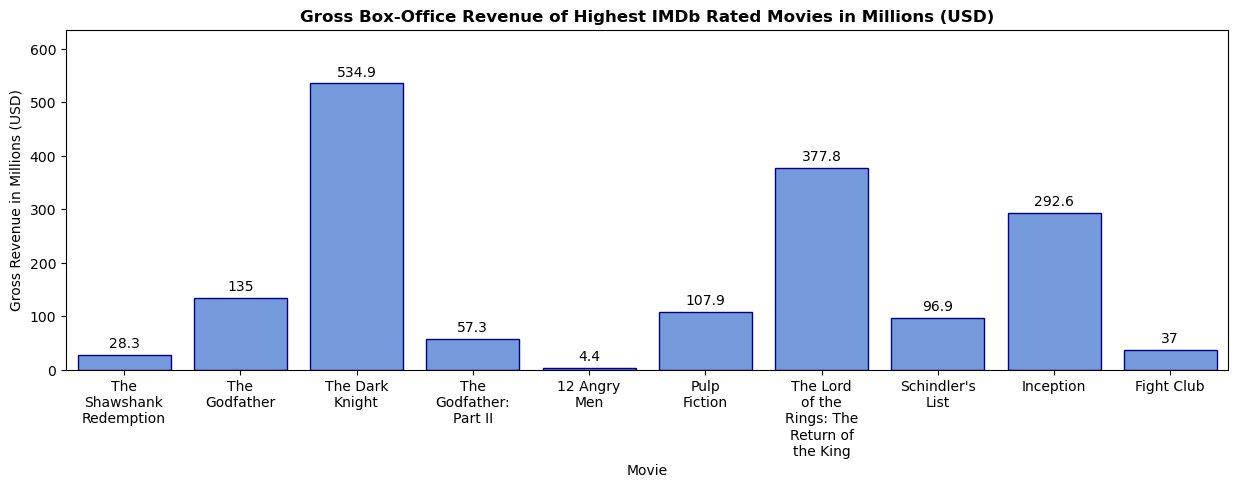

In [78]:
# Not used in any slide

# Creating a bar chart of the gross revenue per highest rated movie (Meta score).
def gross_revenue_imdb_rating(df_imdb_rating):
    max_revenue = df_imdb_rating['Gross in MM'].max() + 100
    plt.figure(figsize = (15, 5))

    g = sns.barplot(
        x = df_imdb_rating['Movie'],
        y = df_imdb_rating['Gross in MM'].round(1).rename('Gross Revenue in Millions (USD)'),
        color = 'cornflowerblue',
        edgecolor = 'darkblue'
    )
    
    g.set_ylim(0, max_revenue)##

    g.set_title('Gross Box-Office Revenue of Highest IMDb Rated Movies in Millions (USD)', weight = 'bold')

    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)

    wrap_labels(g, 10)

    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
    
    plt.subplots_adjust(bottom = 0.2)
    fig = plt.gcf()
    return fig

gross_revenue_imdb_rating_chart = pn.pane.Matplotlib(gross_revenue_imdb_rating(df_imdb_rating), dpi = 144, width = 1280, align = 'center')

In [79]:
# Is referenced by the bar chart below, however the bar chart isn't part of any slide

# Creating a table of the 10 highest grossing movies.
def highest_grossing(cleaned_df):
    df_gross = cleaned_df
    df_gross['ranking'] = df_gross['Gross_in_MM'].rank(method = 'dense', ascending = False)
    df_gross = df_gross[df_gross['ranking'] <= 10].sort_values(by = 'ranking')
    df_gross = df_gross[['Series_Title', 'IMDB_Rating', 'Meta_score', 'Released_Year', 'Gross_in_MM']].reset_index(drop = True)
    df_gross = df_gross.rename(columns = {'Series_Title':'Movie',
                                         'IMDB_Rating':'IMDb Rating',
                                          'Meta_score':'Metascore',
                                         'Released_Year':'Release Year',
                                         'Gross_in_MM':'Gross in MM'})
    df_gross['Gross in MM'] = df_gross['Gross in MM'].round(1)
    df_gross['Metascore'] = df_gross['Metascore'].astype(int)
    df_gross = df_gross.reset_index(drop = True)
    df_gross.index = df_gross.index + 1 
    return df_gross

df_gross = highest_grossing(cleaned_df)

df_gross

,Movie,IMDb Rating,Metascore,Release Year,Gross in MM
1,Star Wars: Episode VII - The Force Awakens,7.9,80,2015,936.7
2,Avengers: Endgame,8.4,78,2019,858.4
3,Avatar,7.8,83,2009,760.5
4,Avengers: Infinity War,8.4,68,2018,678.8
5,Titanic,7.8,75,1997,659.3
6,The Avengers,8.0,69,2012,623.3
7,Incredibles 2,7.6,80,2018,608.6
8,The Dark Knight,9.0,84,2008,534.9
9,Rogue One,7.8,65,2016,532.2
10,The Dark Knight Rises,8.4,78,2012,448.1


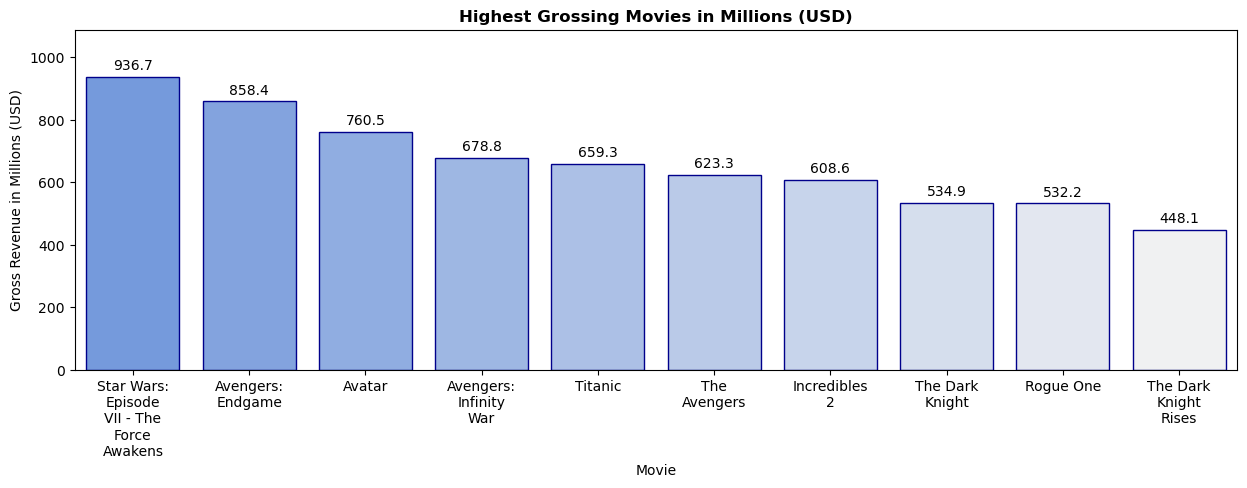

In [80]:
# Not part of any slide

# Creating a bar chart based on the table above
def highest_grossing_bar_chart(df_gross):
    max_revenue = df_gross['Gross in MM'].max() + 150
    plt.figure(figsize = (15, 5))

    g = sns.barplot(
        x = df_gross['Movie'],
        y = df_gross['Gross in MM'].rename('Gross Revenue in Millions (USD)'),
        palette = sns.light_palette('cornflowerblue', n_colors = 10, reverse = True),
        data = df_gross['Gross in MM'],
        edgecolor = 'darkblue'
    )

    g.set_ylim(0, max_revenue)
    g.set_title('Highest Grossing Movies in Millions (USD)', weight = 'bold')

    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)

    wrap_labels(g, 10)

    for i in g.containers:
        g.bar_label(i, label_type='edge', padding = 3)
    
    plt.subplots_adjust(bottom = 0.2)
    fig = plt.gcf()
    return fig

rating_vs_votes_chart  = pn.pane.Matplotlib(highest_grossing_bar_chart(df_gross), dpi = 144, width = 1280, align = 'center')

## Which directors and stars occur most in the dataset?

In [81]:
# Used in the 'What are the highest rated movies?' slide

# Creating a markdown for the bar chart below
directors_actors_intro = pn.pane.Markdown("""
Being part of the top 1000 highest IMDb ranked movies is an incredible accomplishment, as every director in our dataset has influenced cinematic history through their work. Although quantity might not be an accurate way to measure a person's influence on said history because it doesn't paint the whole picture, it is still of value to see which directors and actors have graced our dataset with the most occurrences. Knowing the prominent figures within our dataset and to what extent they have proven to consistently deliver high-quality movies helps us to identify and understand trends. It sets benchmarks for quality and reveals patterns.

Firstly, we will first take a look at the most occurring directors in our dataset. A director is one of the, if not *the* most influential person in the process of creating a movie. Directors are the creative visionaries tasked with translating a screenplay into a movie, all the while making important decisions on the style, tone, pacing and overall artistic vision of the movie. 

From there, we will move on and take a look at the most occurring occuring movie stars in our dataset. Out of all the people involved in creating a movie, movie stars are obviously the most recognizable to us. Even if you are not a movie buff, you will most likely recognize at least one name in this list. It is to no one's surprise that they are absolutely crucial in bringing characters (and stories) to life.
""")

directors_actors_intro

Markdown(str)

In [82]:
# Used in the 'Which directors and stars occur most in the dataset?' slide
# Referenced by directors bar chart below + the movie stars markdown below

# Aggregating the cleaned_df table
def directors(cleaned_df):
    cleaned_df['Released_Year'] = cleaned_df['Released_Year'].astype(int)
    directors_df = (cleaned_df.groupby('Director').agg(Series_Title = ('Series_Title','count'), 
                                                      IMDB_Rating = ('IMDB_Rating','mean'), 
                                                      No_of_Votes = ('No_of_Votes','mean'), 
                                                      min_release_year = ('Released_Year', 'min'), 
                                                      max_release_year = ('Released_Year', 'max'), 
                                                      avg_release_year = ('Released_Year', 'mean'), 
                                                      median_release_year = ('Released_Year', 'median')
                                                     )
                    .rename(columns = {'Series_Title':'No of Movies', 
                                               'IMDB_Rating':'AVG IMDb Rating', 
                                               'No_of_Votes':'AVG No of Votes', 
                                               'min_release_year':'Min Release Year', 
                                               'max_release_year':'Max Release Year',
                                               'avg_release_year':'AVG Release Year', 
                                               'median_release_year':'Median Release Year'}
                           )
                    .reset_index()
                   )
    directors_df['AVG IMDb Rating'] = directors_df['AVG IMDb Rating'].round(1)
    directors_df['AVG No of Votes'] = directors_df['AVG No of Votes'].round(0).astype(int)
    directors_df['Diff. Min/Max Years'] = directors_df['Max Release Year'] - directors_df['Min Release Year']
    directors_df['AVG Release Year'] = directors_df['AVG Release Year'].astype(int).round(0).astype(int)
    directors_df['Median Release Year'] = directors_df['Median Release Year'].round(0).astype(int)
    directors_df = directors_df.sort_values(by = ['No of Movies', 'AVG IMDb Rating', 'AVG No of Votes'], ascending = [False, False, False])
    directors_df = directors_df.head(10)
    directors_df = directors_df.reset_index(drop = True)
    directors_df = directors_df[['Director', 
                                 'No of Movies', 
                                 'AVG IMDb Rating', 
                                 'AVG No of Votes', 
                                 'Min Release Year',
                                 'Max Release Year', 
                                 'Diff. Min/Max Years', 
                                 'AVG Release Year', 
                                 'Median Release Year']]
    directors_df.index = directors_df.index + 1     
    return directors_df

directors_df = directors(cleaned_df)
directors_df

,Director,No of Movies,AVG IMDb Rating,AVG No of Votes,Min Release Year,Max Release Year,Diff. Min/Max Years,AVG Release Year,Median Release Year
1,Alfred Hitchcock,14,8.0,192613,1935,1963,28,1949,1950
2,Steven Spielberg,13,8.0,601320,1975,2015,40,1990,1989
3,Hayao Miyazaki,11,8.0,213520,1979,2013,34,1994,1992
4,Martin Scorsese,10,8.2,651353,1976,2019,43,1995,1992
5,Akira Kurosawa,10,8.2,94160,1950,1985,35,1962,1960
6,Stanley Kubrick,9,8.2,435473,1956,1987,31,1968,1968
7,Billy Wilder,9,8.1,115323,1944,1960,16,1952,1953
8,Woody Allen,9,7.8,135834,1975,2011,36,1987,1985
9,Christopher Nolan,8,8.5,1447293,2000,2017,17,2009,2009
10,Quentin Tarantino,8,8.2,1015401,1992,2019,27,2006,2006


In [83]:
# Used in the 'Which directors and stars occur most in the dataset?' slide
# Referenced by the Movie Star markdown below (for the comparison part)
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values for the markdown below
directors_df_markdown = directors_df.copy()
directors_df_markdown['ranking'] = directors_df_markdown['No of Movies'].rank(method = 'dense', ascending = False)
director_top_occurrences_hitchcock = directors_df.iloc[0, 0]
director_top_occurrences_hitchcock_movies = directors_df.iloc[0, 1]
director_top_occurrences_hitchcock_rating = directors_df.iloc[0, 2].round(2)
director_top_occurrences_hitchcock_min_year = directors_df.iloc[0, 4]
director_top_occurrences_hitchcock_max_year = directors_df.iloc[0, 5]
director_top_occurrences_hitchcock_avg_year = directors_df.iloc[0, 7]
director_top_occurrences_hitchcock_median_year = directors_df.iloc[0, 8]

director_top_occurrences_spielberg = directors_df.iloc[1, 0]
director_top_occurrences_spielberg_movies = directors_df.iloc[1, 1]
director_top_occurrences_spielberg_rating = directors_df.iloc[1, 2].round(2)
director_top_occurrences_spielberg_career = directors_df.iloc[1, 6]
director_top_occurrences_scorsese = directors_df.iloc[3, 0]
director_top_occurrences_scorsese_career = directors_df.iloc[3, 5] - directors_df.iloc[3, 4]

director_top_occurrences_miyazaki = directors_df.iloc[2, 0]
director_top_occurrences_kurosawa = directors_df.iloc[4, 0]
director_top_occurrences_kurosawa_votes = directors_df.iloc[4, 3]
director_top_occurrences_allen = directors_df.iloc[7, 0]
director_top_occurrences_nolan = directors_df.iloc[8, 0]
director_top_occurrences_nolan_rating = directors_df.iloc[8, 2]
director_top_occurrences_nolan_movies = directors_df.iloc[9, 1]
director_top_occurrences_tarantino = directors_df.iloc[9, 0]
director_top_occurrences_tarantino_rating = directors_df.iloc[9, 2]


movies_per_director_markdown = pn.pane.Markdown("""
On the bar chart above we see the top 10 movie directors based on how many of their movies occur in this dataset. The accompanying table below it gives us additional information and context on their careers. Combined, they gives us valuable insights into the great work which has solidified their place in cinematic history. In case directors have an equal amount of movies present in the dataset, we will use the average IMDb rating of their movies and their average number of votes per movie (respectively) as a tie-breakers to determine their position in the top 10. The most important takes are as follows:
- The top spot is taken by *{}* with {} movies in this dataset, with an average IMDb rating of {}.
    - Although many of us have probably heard his name, not everyone has seen one (or more) of his movies. This is most likely due to the time period in which he was active as a director. His earliest release year in this data set is {}, with the average release of his movies being {}, the median release year being {}, and a maximum release year of {}, all of which are the lowest in the entire top 10.
- As the runner-up, *{}* is right on his heels with {} movies present in our dataset, with an average IMDb rating of {}.
    - The name {} will most likely ring a bell, as he is one the most well known directors alive. Based on his earliest and most recent movie releases, his career has spanned {} years (and counting), which is the second longest out of all the directors in this top 10. First place belongs to director *{}* with {} years. Amazingly, at the moment of writing, both of them are still directing movies. 
    - Obviously, the difference between a director's earliest and most recent movie release year doesn't fully equate career span, because not only are some directors still active, it also doesn't include movies which have not made it into this top 1000. But, at the very least it gives us an idea of how long their career has spanned at minimum.
- *{}* makes for an interesting third place, as all of his movies in our dataset (as well as his entire filmography) are animated movies.
- The director *{}* averages {} amount of votes per movie, which is the lowest of the entire top 10 and the only average amount of votes not breaking the 100k boundary.
- *{}* is the only director whose average IMDb rating per movie dips into the 7s; every other director's average IMDb rating is in the 8s.
- Only two directors have an average amount of votes per movie in the millions: *{}* and *{}*. With respective IMDb ratings of {} and {}, they have the highest and (shared) second highest IMDb ratings of all the directors in this top 10.

"""
.format(director_top_occurrences_hitchcock, 
        director_top_occurrences_hitchcock_movies, 
        director_top_occurrences_hitchcock_rating,
        director_top_occurrences_hitchcock_min_year,
        director_top_occurrences_hitchcock_avg_year,
        director_top_occurrences_hitchcock_median_year,
        director_top_occurrences_hitchcock_max_year,
                
        director_top_occurrences_spielberg, 
        director_top_occurrences_spielberg_movies, 
        director_top_occurrences_spielberg_rating,
        director_top_occurrences_spielberg,
        director_top_occurrences_spielberg_career,
        director_top_occurrences_scorsese,
        director_top_occurrences_scorsese_career,
            
        director_top_occurrences_miyazaki,
        director_top_occurrences_kurosawa,
        director_top_occurrences_kurosawa_votes,
        director_top_occurrences_allen,
        director_top_occurrences_nolan,
        director_top_occurrences_tarantino,
        director_top_occurrences_nolan_rating,
        director_top_occurrences_tarantino_rating

       )
)

movies_per_director_markdown

Markdown(str)

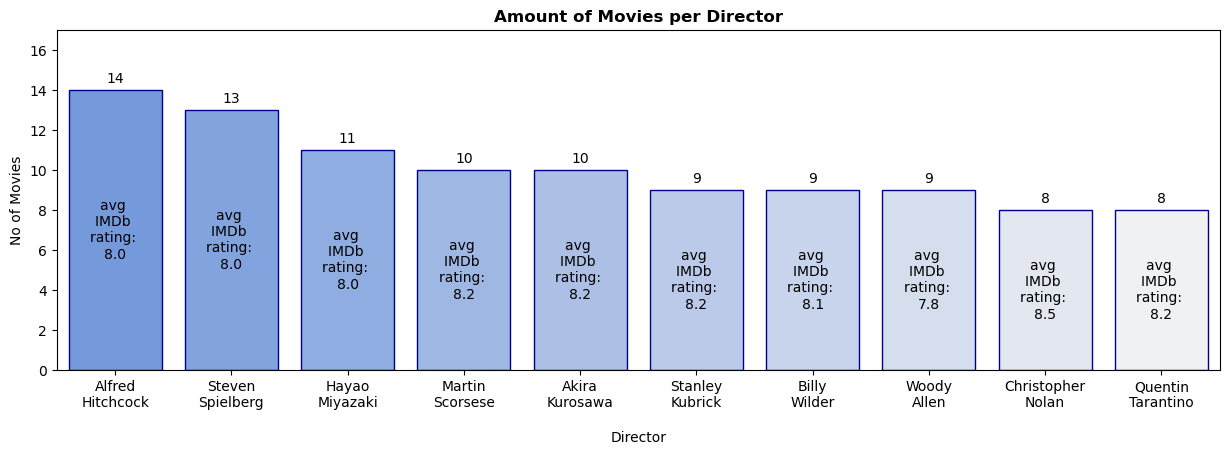

In [84]:
# Used in the 'Which directors and stars occur most in the dataset?' slide
# Creating a bar chart on the amount of movies per director
df_directors = directors(cleaned_df).head(10)

def directors_moviecount_bar_chart(df_directors):
    max_movies = df_directors['No of Movies'].max() + 3
    plt.figure(figsize = (15, 5))
    
    g = sns.barplot(
        x = df_directors['Director'],
        y = df_directors['No of Movies'],
        color = 'cornflowerblue',
        palette = sns.light_palette('cornflowerblue', n_colors = 10, reverse = True),
        data = df_directors['No of Movies'],
        edgecolor = 'darkblue'
    )
    
    g.set_ylim(0, max_movies)
    g.set_title('Amount of Movies per Director', weight = 'bold')
    g.set_xlabel('Director', labelpad = 15)
    
    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)
    
    wrap_labels(g, 10)
    
    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
        
    for bar, rating in zip(g.patches, directors_df['AVG IMDb Rating']):
        height = bar.get_height()
        g.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'avg \nIMDb \nrating: \n{(rating)}',
            ha ='center',
            va ='center'
        )
    
    plt.subplots_adjust(bottom = 0.2)
    fig = plt.gcf()
    return fig   

directors_moviecount_bar_chart_pic = pn.pane.Matplotlib(directors_moviecount_bar_chart(df_directors), dpi = 144, width = 1280, align = 'center')

In [85]:
# Used in the 'Which directors and stars occur most in the dataset?' slide
# Used as a reference by the bar chart below

# Creating a pd.melt() to be able to count the movies per star.
def stars_melt(cleaned_df):
    stars_melt_df = (pd.melt(cleaned_df, 
                       id_vars = ['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Release Year', 'Director'], 
                       value_vars = ['Star1', 'Star2', 'Star3', 'Star4'], 
                       ignore_index = True)
                    .rename(columns = {'value':'Movie Star'})
                )
    return stars_melt_df
    
stars = stars_melt(cleaned_df)
stars

# Creating a table with a movie count per movie star
def stars_count(stars):
    stars['Release Year'] = stars['Release Year'].astype(int)
    stars = (stars.groupby('Movie Star').agg(Series_Title = ('Series_Title','count'),
                                             IMDB_Rating = ('IMDB_Rating','mean'),
                                             No_of_Votes = ('No_of_Votes','mean'),
                                             min_release_year = ('Release Year', 'min'),
                                             max_release_year = ('Release Year', 'max'),
                                             avg_release_year = ('Release Year', 'mean'),
                                             median_release_year = ('Release Year', 'median')
                                            )
                                        .rename(columns = {'Series_Title':'No of Movies',
                                                           'IMDB_Rating':'AVG IMDb Rating',
                                                           'No_of_Votes':'AVG No of Votes',
                                                           'min_release_year':'Min Release Year',
                                                           'max_release_year':'Max Release Year',
                                                           'avg_release_year':'AVG Release Year',
                                                           'median_release_year':'Median Release Year'}
                                               )
                 .reset_index()
                 .sort_values(by = ['No of Movies', 'AVG IMDb Rating', 'AVG No of Votes'], ascending = [False, False, False])
            )
    stars['Diff. Min/Max Years'] = stars['Max Release Year'] - stars['Min Release Year']
    stars['AVG IMDb Rating'] = stars['AVG IMDb Rating'].round(1)
    stars['AVG Release Year'] = stars['AVG Release Year'].round(0).astype(int)
    stars['AVG No of Votes'] = stars['AVG No of Votes'].round(0).astype(int)
    stars['Median Release Year'] = stars['Median Release Year'].round(0).astype(int)
    stars = stars[['Movie Star', 
                   'No of Movies', 
                   'AVG IMDb Rating', 
                   'AVG No of Votes', 
                   'Min Release Year',
                   'Max Release Year', 
                   'Diff. Min/Max Years', 
                   'AVG Release Year', 
                   'Median Release Year']]
    stars = stars.reset_index(drop = True)
    stars.index = stars.index + 1
    return stars

df_stars = stars_count(stars).head(10)
df_stars

,Movie Star,No of Movies,AVG IMDb Rating,AVG No of Votes,Min Release Year,Max Release Year,Diff. Min/Max Years,AVG Release Year,Median Release Year
1,Robert De Niro,17,8.1,458073,1974,2019,45,1991,1990
2,Tom Hanks,14,8.0,669583,1993,2019,26,2002,2000
3,Al Pacino,13,8.1,469109,1972,2019,47,1989,1992
4,Brad Pitt,12,8.0,762061,1995,2019,24,2005,2004
5,Clint Eastwood,12,8.0,279404,1964,2008,44,1980,1974
6,Leonardo DiCaprio,11,8.1,980200,1993,2019,26,2008,2010
7,Christian Bale,11,8.0,778720,1987,2019,32,2007,2007
8,Matt Damon,11,8.0,621853,1997,2019,22,2006,2006
9,James Stewart,10,8.1,172429,1939,1962,23,1950,1949
10,Michael Caine,9,8.1,673832,1972,2014,42,1996,2005


In [86]:
# Used in the 'Which directors and stars occur most in the dataset?' slide
# Referenced by the 'Introduction' slide markdown at the end

# Retrieving various values for the markdown below
top_occurrences_stars = df_stars

star_top_occurrences_de_niro_name = top_occurrences_stars.iloc[0, 0]
star_top_occurrences_de_niro_movies = top_occurrences_stars.iloc[0, 1]
star_top_occurrences_de_niro_rating = top_occurrences_stars.iloc[0, 2].round(2)
star_top_occurrences_de_niro_min_year = top_occurrences_stars.iloc[0, 4]
star_top_occurrences_de_niro_max_year = top_occurrences_stars.iloc[0, 5]
star_top_occurrences_de_niro_difference = top_occurrences_stars.iloc[0, 6]
star_top_occurrences_de_niro_career = top_occurrences_stars.iloc[0, 6]

star_top_occurrences_hanks_name = top_occurrences_stars.iloc[1, 0]
star_top_occurrences_hanks_movies = top_occurrences_stars.iloc[1, 1]
star_top_occurrences_hanks_rating = top_occurrences_stars.iloc[1, 2].round(2)
star_top_occurrences_hanks_difference = top_occurrences_stars.iloc[1, 6]

star_top_occurrences_pacino_name = top_occurrences_stars.iloc[2, 0]
star_top_occurrences_pacino_career = top_occurrences_stars.iloc[2, 6]

star_top_occurrences_dicaprio_name = top_occurrences_stars.iloc[5, 0]
star_top_occurrences_dicaprio_votes = top_occurrences_stars.iloc[5, 3]
star_top_occurrences_bale_name = top_occurrences_stars.iloc[6, 0]
star_top_occurrences_bale_votes = top_occurrences_stars.iloc[6, 3]

star_top_occurrences_stewart_name = top_occurrences_stars.iloc[8, 0]
star_top_occurrences_eastwood_name = top_occurrences_stars.iloc[4, 0]

star_top_occurrences_imdb_column = top_occurrences_stars.columns[2]
star_top_occurrences_imdb_values = df_stars.copy()
star_top_occurrences_imdb_values_min = star_top_occurrences_imdb_values[star_top_occurrences_imdb_values['AVG IMDb Rating'] == star_top_occurrences_imdb_values['AVG IMDb Rating'].min()][['AVG IMDb Rating']].drop_duplicates().iloc[0, 0]
star_top_occurrences_imdb_values_max = star_top_occurrences_imdb_values[star_top_occurrences_imdb_values['AVG IMDb Rating'] == star_top_occurrences_imdb_values['AVG IMDb Rating'].max()][['AVG IMDb Rating']].drop_duplicates().iloc[0, 0]

director_top_occurrences_imdb_values = directors_df.copy()
director_top_occurrences_imdb_values_min = director_top_occurrences_imdb_values[director_top_occurrences_imdb_values['AVG IMDb Rating'] == director_top_occurrences_imdb_values['AVG IMDb Rating'].min()][['AVG IMDb Rating']].iloc[0, 0]
director_top_occurrences_imdb_values_max = director_top_occurrences_imdb_values[director_top_occurrences_imdb_values['AVG IMDb Rating'] == director_top_occurrences_imdb_values['AVG IMDb Rating'].max()][['AVG IMDb Rating']].iloc[0, 0]
director_top_occurrences_votes_avg = director_top_occurrences_imdb_values['AVG No of Votes'].mean().round(0).astype(int)

top_occurrences_stars_votes_avg = top_occurrences_stars['AVG No of Votes'].mean().round(0).astype(int)
star_top_occurrences_caine_name = top_occurrences_stars.iloc[9, 0]
star_top_occurrences_caine_movies = top_occurrences_stars.iloc[9, 1]



movies_per_movie_star_markdown = pn.pane.Markdown("""
On the bar chart above you will see the movie stars with the most amount of occurrences in our dataset, irregardless of the actor category they belong to ('star1', 'star2', 'star3' or 'star4'). The accompanying table beneath the bar chart gives us more information (in aggregate) on their release years and number of votes. Similar to the movie directors bar chart above, we will use the average IMDb rating of their movies and their average number of votes per movie (respectively) as a tie-breakers to determine their position in the top 10. The most interesting observations are as follows:
- As can be seen on the chart, the movie star with the most occurrences in our list is *{}*, with {} movie occurrences with an average IMDb rating of {}.
    - Based on this top 10, with an earliest release year of {} and a most recent release year of {}, {} has had the second longest movie career span: {} years (and counting). First place goes to the (still active) *{}* with {} years.
    - The same caveat with regards to career span is applicable here: the difference between an actor's earliest and most recent movie release year doesn't fully equate career span. However, it does give us an idea of how long their career has spanned at minimum.
- The runner up of having the most movies in this dataset is *{}*, with {} movies under his belt and an average IMDb rating of {}.
    - Compared to {}, {} only has {} years of difference between his first and most recent movies in this dataset, compared to {}'s {} years.
- With an average of {} votes per movie, *{}* has the highest average number of votes in this top 10. To compare, the runner up is *{}* with an average of {} voters per movie.
- *{}* has the lowest minimum, maximum, average and median release years out of all the movie stars in this top 10, as well as the lowest average amount of votes per movie.

When we compare the directors top 10 with the movie star top 10, we can make the following observations:

- In contrast to certain directors ({} and {}), no movie star in the top 10 has broken a million average amount of votes per movie. {} came close, with an average of {} votes per movie. Interestingly, the average amount of votes for directors ({} votes) is lower than for movie stars ({} votes).
- Aside from *{}* and the late {}, the most recent release years of most movie stars are fairly recent. At the moment of writing, aside from the these two exceptions, all of the movie stars in this top 10 are either still acting or have done so up until fairly recently. ({} is currently still  active as a movie director. He has announced his upcoming movie to be his last.) In comparison, many directors' most recent work in this dataset is a bit less recent, as some of them have since past away.
- Compared to the directors top 10, there's not a whole lot of variety to be found in the *{}* column in the movie stars top 10. Movie stars either have an average IMDb rating of {} or {}. This is different in the directors top 10, where the average IMDb rating ranges from {} to {}.
    - Only one actor (*{}*) in our movie stars top 10 hasn't reached double digits in movie count, while half of the directors haven't done so in the directors top 10.
"""
.format(star_top_occurrences_de_niro_name,  
        star_top_occurrences_de_niro_movies, 
        star_top_occurrences_de_niro_rating,
        star_top_occurrences_de_niro_min_year,
        star_top_occurrences_de_niro_max_year,
        star_top_occurrences_de_niro_name,
        star_top_occurrences_de_niro_career,
        star_top_occurrences_pacino_name,
        star_top_occurrences_pacino_career,

        star_top_occurrences_hanks_name,
        star_top_occurrences_hanks_movies,
        star_top_occurrences_hanks_rating,
        star_top_occurrences_de_niro_name,
        star_top_occurrences_hanks_name,
        star_top_occurrences_hanks_difference,
        star_top_occurrences_de_niro_name,
        star_top_occurrences_de_niro_difference,

        star_top_occurrences_dicaprio_votes,
        star_top_occurrences_dicaprio_name,
        star_top_occurrences_bale_name,
        star_top_occurrences_bale_votes,

        star_top_occurrences_stewart_name,

        # Comparison directors top 10 and movie star top 10
        director_top_occurrences_nolan,
        director_top_occurrences_tarantino,
        star_top_occurrences_dicaprio_name,
        star_top_occurrences_dicaprio_votes,
        director_top_occurrences_votes_avg,
        top_occurrences_stars_votes_avg,

        star_top_occurrences_eastwood_name,
        star_top_occurrences_stewart_name,
        star_top_occurrences_eastwood_name,

        star_top_occurrences_imdb_column,
        star_top_occurrences_imdb_values_min,
        star_top_occurrences_imdb_values_max,
        director_top_occurrences_imdb_values_min,
        director_top_occurrences_imdb_values_max,
        star_top_occurrences_caine_name,

       )
)

movies_per_movie_star_markdown

Markdown(str)

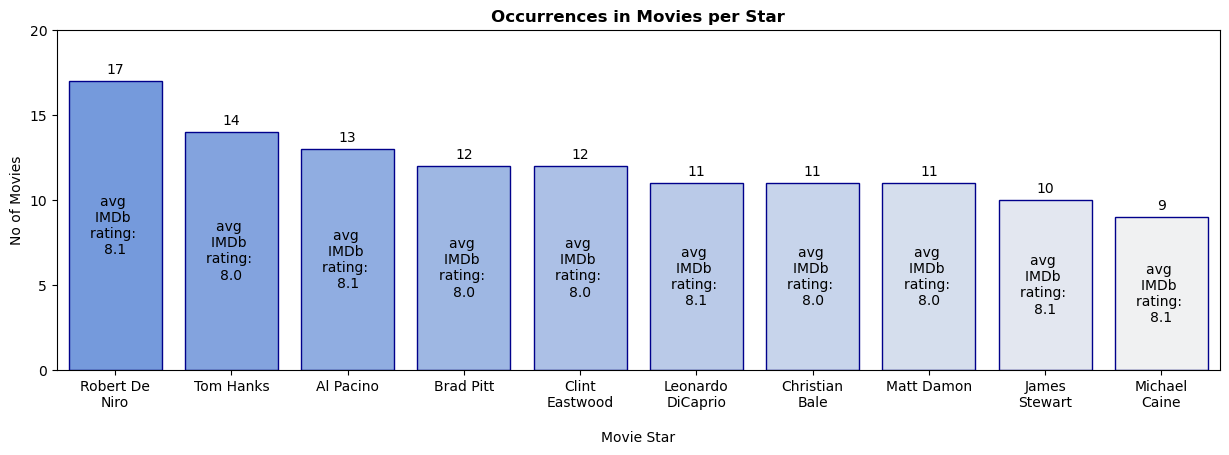

In [87]:
# Used in the 'Which directors and stars occur most in the dataset?' slide

# Creating a bar chart on movies per movie star based on the table above
def stars_moviecount_bar_chart(df_stars):
    max_movies = df_stars['No of Movies'].max() + 3
    plt.figure(figsize = (15, 5))
    
    g = sns.barplot(
        x = df_stars['Movie Star'],
        y = df_stars['No of Movies'],
        color = 'cornflowerblue',
        palette = sns.light_palette('cornflowerblue', n_colors = 10, reverse = True),
        data = df_stars['No of Movies'],
        edgecolor = 'darkblue'
    )
    
    g.set_ylim(0, max_movies)
    g.set_title('Occurrences in Movies per Star', weight = 'bold')
    g.set_xlabel('Movie Star', labelpad = 15)
    plt.yticks(np.arange(0, max_movies + 2, step = 5))
    
    def wrap_labels(g, width, break_long_words = False):
        labels = []
        for label in g.get_xticklabels():
            text = label.get_text()
            labels.append(textwrap.fill(text, width = width, break_long_words = break_long_words))
        g.set_xticklabels(labels, rotation = 0)
    
    wrap_labels(g, 10)
    
    for i in g.containers:
        g.bar_label(i, label_type = 'edge', padding = 3)
    
    for bar, rating in zip(g.patches, df_stars['AVG IMDb Rating']):
        height = bar.get_height()
        g.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'avg \nIMDb \nrating: \n{round((rating), 1)}',
            ha ='center',
            va ='center'
        )
    
    plt.subplots_adjust(bottom = 0.2)
    fig = plt.gcf()
    return fig   

stars_moviecount_bar_chart_pic = pn.pane.Matplotlib(stars_moviecount_bar_chart(df_stars), dpi = 144, width = 1280, align = 'center')

In [88]:
closing_thoughts = pn.pane.Markdown("""
    We have now reached the end of this explorative data analysis on the top 1000 IMDb movies dataset. Among other things, together, we have navigated the intricacies of rating distribution, genre pairings and the most occuring names in our dataset. We have traversed a trip through time, filled with names which will forever be part of cinematic history. As we wrap up this report, it’s clear that the world of cinema is as diverse and dynamic as the audience it serves. As we have seen, it is ever evolving. Whether you’re a casual viewer or a dedicated cinephile, I hope you have found this EDA to be insightful and at least somewhat entertaining. 
    
    If you have any questions or remarks with regard to this EDA (or anything else), please don't hesitate to contact me through the contact form on this website.
""")

closing_thoughts

Markdown(str)

In [89]:
# Used in the Introduction slide


# Retrieving various values used in the markdown below
summary_markdown_df = cleaned_df.copy()
overall_min_imdb_rating = summary_markdown_df['IMDB_Rating'].min()
overall_max_imdb_rating = summary_markdown_df['IMDB_Rating'].max()
summary_markdown_genre_adv_ani = merge_genre_outliers_table_original.iloc[0, 1]
summary_markdown_genre_bio_his = merge_genre_outliers_table_original.iloc[1, 1]
summary_markdown_genre_act_adv = merge_genre_outliers_table_original.iloc[2, 1]
summary_markdown_genre_ani_dra = merge_genre_outliers_table_original.iloc[3, 1]
summary_markdown_genre_act_dra = merge_genre_outliers_table_original.iloc[4, 1]
summary_markdown_genre_adv_dra = merge_genre_outliers_table_original.iloc[5, 1]


summary_markdown = pn.pane.Markdown("""
## Summary

### Key metrics
- The dataset contains {} movies, with every row being a movie.
- The data has been cleaned and two columns have been added to ensure usability and improve readability.
- The most important metric in the dataset is the *IMDb rating*, which is a number ranging from 1 to 10, with 1 being worst and 10 being best. Since it is mostly based on user ratings, it reflects how much people like that particular movie. In large part, IMDb rating is what the movie order of this list is based on.
    - 50% of the movies in this dataset have an IMDb rating between {} and {}, with a median of {}.
    - 100% of the movies have an IMDb rating between {} and {}.
    - There are {} outliers based on their IMDb rating, all of which are positive.
    - The overall average IMDb rating is {}.
    - The average IMDb rating per release year is {}.
- Certain columns have shown correlation, which is the statistical relationship between them.
    - Two column pairings have shown a moderate positive correlation, which tells us that when the valuess in one column go up or down, the values in the other column tend to go up or down as well: *{} - {}* (r = {}) and *{} - {}* (r = {}). The former indicates that movies with higher IMDb ratings tend to have more votes; the latter suggests that higher grossing movies often receive more votes.
    - One pairing has shown a moderate negative correlation, which tells us that when the value in one column go up or down, the values in the other column tend to move in the opposite direction: *{} - {}* (r = {}). This suggests that more recent films tend to have lower Metascores, or vice versa.
- In our IMDb movies dataset, movies are categorized by one or more genre(s). There are {} different genres in our dataset.
    - The movie genre *{}* is the most occurring genre in the entire dataset by a large margin.
    - There doesn't seem to be an obvious financial incentive to create movies categorized as {}. With an average gross revenue of USD {} million per movie, it ranks {}th (out of {}) in genres with the highest average gross revenue. 
    - The popularity of the genre {} can, in large part, be explained by the fact that movies can be categorized as belonging to multiple genres at the same time. Seeing as movies often contain a dramatic element, many of the movies in our dataset have been categorized as such.
- Three movie genres pairings have shown moderate positive correlation, which suggests they are likely to be paired: *{}* (r = {}), *{}* (r = {}) and *{}* (r = {}). Even on a purely intuitive level, these genre pairings seem make sense.
- Three movie genres pairings have shown moderate negative correlation, which suggests they are unlikely to be paired: *{}* (r = {}), *{}* (r = {}) and *{}* (r = {}). Intuitively, this makes sense; these pairings seem almost contrasting.
- The 10 highest rated movies based on their IMDb rating range from an IMDb rating of {} (*{}*) to {} (*{}*).
- The 10 highest rated movies based on their Metascore all have a perfect 100 score. The IMDb ratings of these movies range from {} (*{}*) to {} (*{}*), with the former movie being the only movie which is also part of the top 10 based on IMDb ratings.
- The top 10 most occurring directors is lead by *{}* with {} movies. The last place in this top 10 is shared by *{}* and *{}*, both having a respectable movie count of {} movies each.
- Out of the 10 most occurring movie stars in the dataset, first place is taken by *{}* with {} movies and last place belongs to *{}* with {} movies.

"""
.format(cleaned_df['Series_Title'].count(),
        ratings_Q1,
        ratings_Q3,
        boxplot_median,
        overall_min_imdb_rating,
        overall_max_imdb_rating,
        outlier_count_distinct,
        
        outlier_count_mean,
        df_ratings_year_mean,
        
        imdb_column_name,
        votes_column_name,
        imdb_votes_value,
        gross_column_name,
        votes_column_name,
        gross_votes_value,
        meta_score_column_name,
        release_year_column_name,
        corr_year_meta,
        
        genre_count,
        df_genre_table_drama,
        df_genre_table_drama,
        corrected_genre_drama_gross,
        corrected_genre_drama_ranking,
        genre_count,
        df_genre_table_drama,
        
        adventure_animation_original,
        summary_markdown_genre_adv_ani,
        biography_history_original,
        summary_markdown_genre_bio_his,
        action_adventure_original,
        summary_markdown_genre_act_adv,
        adventure_drama_original,
        summary_markdown_genre_ani_dra,
        drama_action_original,
        summary_markdown_genre_act_dra,
        drama_animation_original,
        summary_markdown_genre_adv_dra,
        
        highest_rated_shawshank_imdb_rating,
        highest_rated_shawshank_name,
        highest_rated_fightclub_imdb_rating,
        highest_rated_fightclub_name,
        
        highest_rated_metascore_godfather_imdb,
        highest_rated_metascore_godfather_name,
        highest_rated_metascore_boyhood_imdb,
        highest_rated_metascore_boyhood_name,
        
        director_top_occurrences_hitchcock,
        director_top_occurrences_hitchcock_movies,
        director_top_occurrences_nolan,
        director_top_occurrences_tarantino,
        director_top_occurrences_nolan_movies,
        
        star_top_occurrences_de_niro_name,
        star_top_occurrences_de_niro_movies,
        star_top_occurrences_caine_name,
        star_top_occurrences_caine_movies,

           
       )
)                                   


summary_markdown

Markdown(str)

## Creating a Dashboard

In [90]:
# Creating buttons
button1 = pn.widgets.Button(name = 'Introduction', button_type = 'light', icon = 'file-info', styles = {'width':'100%'})
button2 = pn.widgets.Button(name = 'Understanding the Data', button_type = 'light', icon = 'clipboard-data', styles = {'width':'100%'})
button3 = pn.widgets.Button(name = 'Cleaning the Data', button_type = 'light', icon = 'wash-machine', styles = {'width':'100%'})
button4 = pn.widgets.Button(name = 'Distribution of Ratings', button_type = 'light', icon = 'file-analytics', styles = {'width':'100%'})
button5 = pn.widgets.Button(name = 'IMDb Ratings over Time', button_type = 'light', icon = 'timeline', styles = {'width':'100%'})
button6 = pn.widgets.Button(name = 'Correlation', button_type = 'light', icon = 'chart-scatter', styles = {'width':'100%'})
button7 = pn.widgets.Button(name = 'Breakdown per Genre', button_type = 'light', icon = 'table', styles = {'width':'100%'})
button8 = pn.widgets.Button(name = 'Highest Rated Movies', button_type = 'light', icon = 'medal-2', styles = {'width':'100%'})
button9 = pn.widgets.Button(name = 'Movies per director/star', button_type = 'light', icon = 'chart-bar', styles = {'width':'100%'})
button10 = pn.widgets.Button(name = 'Closing Thoughts', button_type = 'light', icon = 'omega', styles = {'width':'100%'})

In [91]:
# Clearing page with every button-click
def show_page(page_key):
    main_area.clear()
    main_area.append(mapping[page_key])

In [92]:
button1.on_click(lambda event: show_page('Page1'))
button2.on_click(lambda event: show_page('Page2'))
button3.on_click(lambda event: show_page('Page3'))
button4.on_click(lambda event: show_page('Page4'))
button5.on_click(lambda event: show_page('Page5'))
button6.on_click(lambda event: show_page('Page6'))
button7.on_click(lambda event: show_page('Page7'))
button8.on_click(lambda event: show_page('Page8'))
button9.on_click(lambda event: show_page('Page9'))
button10.on_click(lambda event: show_page('Page10'))

Watcher(inst=Button(button_type='light', icon='omega', name='Closing Thoughts', styles={'width': '100%'}), cls=<class 'panel.widgets.button.Button'>, fn=<function <lambda> at 0x000001FF6A908670>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

## Dashboard layout

In [93]:
def CreatePage1():
    return pn.Column(
        pn.pane.PNG('introduction.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Introduction', margin = (20, 0, 0, 0))),
        pn.Column(objective_markdown, margin = (20, 0, 0, 0)),
        pn.Column(dataset_markdown, margin = (20, 0, 0, 0)),
        pn.Column(structure_markdown, margin = (20, 0, 0, 0)),
        pn.Column(other_markdown, margin = (20, 0, 0, 0)),
        pn.Column(summary_markdown, margin = (20, 0, 0, 0)),
        align = 'center',
        width = 1080
    )


def CreatePage2():
    return pn.Column(
        pn.pane.PNG('understanding.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Understanding the Data', margin = (40, 0, 0, 0))),
        pn.Column(understanding_data_intro, margin = (0, 0, 0, 0)),
        pn.Column(df_shape_markdown, margin = (20, 0, 0, 0)),
        pn.pane.DataFrame(df_columns_table, margin = (0, 0, 0, 0)),
        pn.Column(df_shape_markdown_cont, margin = (40, 0, 0, 0)),
        pn.Column(dataset_preview, margin = (20, 0, 0, 0)),
        pn.pane.DataFrame(df_head, height = 450, width = 1080, margin = (20, 0, 0, 0)), 
        align = 'center',
    )


def CreatePage3():
    return pn.Column(
        pn.pane.PNG('cleaning.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Cleaning the Data', margin = (20, 0, 0, 0))),
        pn.Column(data_cleaning_intro, width = 1080, margin = (0, 0, 20, 0)),
        pn.Row(
            pn.Column(pn.pane.Markdown('## Before Cleaning'), data_types, margin = (0, 25, 0, 0)),
            pn.pane.PNG('Arrow.png', height = 50, align = 'center'),
            pn.Column(pn.pane.Markdown('## After Cleaning'), data_types_cleaned_df, margin = (0, 0, 0, 25)),
            margin = (0, 0, 20, 0)),
        pn.Column(data_cleaning1_markdown, width = 1080),
        align = 'center',
    )


def CreatePage4():
    return pn.Column(
        pn.pane.PNG('distribution.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Distribution of IMDb Ratings', margin = (20, 0, 0, 0))),
        pn.Column(distribution_markdown_intro, width = 1080),
        pn.Column(boxplot_markdown, width = 1080, margin = (20, 0, 0, 0)),
        pn.Column(boxplot_int, height = 500, width = 1080),
        pn.Column(boxplot_markdown2, width = 1080),
        pn.Column(imdb_rating_bar_chart_outliers, height = 500, width = 1080),
        pn.Column(outlier_bar_chart_movies, width = 1080),
        align = 'center',
    )


def CreatePage5():
    return pn.Column(
        pn.pane.PNG('time.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# IMDb Ratings over Time', margin = (20, 0, 0, 0))),
        pn.Column(ratings_over_time_intro, width = 1080, margin = (0, 0, 20, 0)),
        pn.Column(line_chart_imdb_int, width = 1080, margin = (0, 0, 20, 0)),
        pn.Column(ratings_year_markdown, width = 1080),
        pn.Row(boxplot_imdb_int, pn.Column(outliers_imdb_rating_table, margin = (40, 0, 0, 0)), width = 1080, align = 'start'),
        pn.Column(ratings_year_markdown2, width = 1080),
        pn.Column(ratings_deepdive_markdown, width = 1080, margin = (40, 0, 0, 0)),
        pn.Column(imdb_rating_bar_chart_1954, width = 1080, margin = (0, 0, 20, 0)),
        pn.Column(ratings_year_markdown_1954, width = 1080),
        pn.Column(imdb_rating_bar_chart_1957, width = 1080, margin = (0, 0, 20, 0)),
        pn.Column(ratings_year_markdown_1957, width = 1080),
        pn.Column(imdb_rating_bar_chart_1994, width = 1080, margin = (0, 0, 20, 0)),
        pn.Column(ratings_year_markdown_1994, width = 1080, margin = (0, 0, 20, 0)),
        align = 'center',
    )



def CreatePage6():
    return pn.Column(
        pn.pane.PNG('correlation.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Correlation', margin = (20, 0, 0, 0))),
        pn.Column(correlation_markdown_intro, width = 1080, margin = (0, 0, 0, 0)),
        pn.Column(corr_table_heatmap, margin = (20, 0, 0, 0)),
        pn.Column(correlation_markdown_1, margin = (40, 0, 0, 0)),
        pn.Column(rating_vs_votes_plot, margin = (20, 0, 0, 0)),
        pn.Column(correlation_markdown_2, margin = (20, 0, 0, 0)),
        pn.Column(votes_vs_gross_plot, margin = (20, 0, 0, 0)),
        pn.Column(correlation_markdown_3, margin = (20, 0, 0, 0)),
        pn.Column(metascore_vs_release_year_plot, margin = (20, 0, 0, 0)),
        pn.Column(correlation_markdown_4, margin = (20, 0, 0, 0)),
        align = 'center',
        width = 1080
    )


def CreatePage7():
    return pn.Column(
        pn.pane.PNG('genre.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Breakdown per Genre', margin = (20, 0, 0, 0))),
        pn.Column(genre_markdown_intro, margin = (0, 0, 20, 0)),
        pn.Row(df_genre_int, pn.Column(genre_print2, margin = (90, 0, 60, 0)), margin = (0, 0, 60, 0)),
        pn.Row(genre_print3),
        pn.Column(genre_matrix_corr),
        pn.Column(genre_print4, margin = (20, 0, 0, 0)),
        pn.Column(genre_matrix_table_cleaned, margin = (20, 0, 0, 0)),
        pn.Column(merge_genre_outliers_table_original),
        pn.Column(genre_print5, margin = (20, 0, 0, 0)),
        pn.Column(genre_matrix_table_cleaned_corrected, margin = (20, 0, 0, 0)),
        pn.Column(merge_genre_outliers_table),
        pn.Column(genre_print6, margin = (20, 0, 0, 0)),
        align = 'center',
        width = 1080
    )


def CreatePage8():
    return pn.Column(
        pn.pane.PNG('rating.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# What are the highest rated movies?', margin = (20, 0, 0, 0))),
        pn.Column(highest_rated_intro_1, margin = (0, 0, 0, 0)),
        pn.Column(highest_rated_movies_bar_chart_pic, margin = (0, 0, 0, 0)),
        pn.Column(df_imdb_rating),
        pn.Column(highest_rated_top10_imdb_markdown, margin = (20, 0, 0, 0)),
        pn.Column(highest_metascore_movies_bar_chart_pic, margin = (20, 0, 0, 0)),
        pn.Column(df_metascore_rating, margin = (0, 0, 0, 0)),
        pn.Column(highest_rated_top10_metascore_markdown, margin = (20, 0, 0, 0)),
        pn.Column(highest_rated_movies_imdb_metascore, margin = (20, 0, 0, 0)),
        pn.Column(metascore_scorecard_table, margin = (20, 0, 0, 0)),
        pn.Column(metascore_scorecard_markdown),
        align = 'center',
        width = 1080
    )


def CreatePage9():
    return pn.Column(
        pn.pane.PNG('director.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Which directors and movie stars occur most in the dataset?', margin = (20, 0, 0, 0))),
        pn.Column(directors_actors_intro, margin = (0, 0, 0, 0)),
        pn.Column(directors_moviecount_bar_chart_pic, margin = (20, 0, 0, 0)),
        pn.Column(directors_df, margin = (0, 0, 0, 0)),
        pn.Column(movies_per_director_markdown, margin = (20, 0, 0, 0)),
        pn.Column(stars_moviecount_bar_chart_pic, margin = (20, 0, 0, 0)),
        pn.Column(df_stars, margin = (0, 0, 0, 0)),
        pn.Column(movies_per_movie_star_markdown, margin = (20, 0, 0, 0)),
        align = 'center',
        width = 1081
    )

def CreatePage10():
    return pn.Column(
        pn.pane.PNG('end.png', width = 1080, align = 'center'),
        pn.Column(pn.pane.Markdown('# Closing Thoughts', margin = (20, 0, 0, 0))),
        pn.Column(closing_thoughts),
        align = 'center',
        width = 1081
    )

mapping = {
    'Page1': CreatePage1(),
    'Page2': CreatePage2(),
    'Page3': CreatePage3(),
    'Page4': CreatePage4(),
    'Page5': CreatePage5(),
    'Page6': CreatePage6(),
    'Page7': CreatePage7(),
    'Page8': CreatePage8(),
    'Page9': CreatePage9(),
    'Page10': CreatePage10(),
}

In [94]:
# Sidebar layout
sidebar = pn.Column(pn.pane.Markdown("## Slides"), button1, button2, button3, button4, button5, button6, button7, button8, button9, button10,
                    styles = {"width": "100%", "padding": "15px"})

# Main area layout
main_area = pn.Column(mapping["Page1"], styles = {"width":"100%"})

# Content
template = pn.template.BootstrapTemplate(
    title = 'IMDb Movies Dataset - Exploratory Data Analysis (EDA)',
    sidebar = [sidebar],
    main = [main_area],
    header_background = '#759adc', 
    #site = 'Data-gedreven.com', logo = "cc.png", theme = 'dark',
    sidebar_width = 250, # Default is 330
    busy_indicator = None,
)

template.show()

Launching server at http://localhost:10102
